In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')
df

OPC   RHA   GWP   CWP   Sand     CG   WC   Age  Compressive
0    100.0   0.0   0.0   0.0  100.0  100.0  0.5   7.0         17.2
1    100.0   0.0   0.0   0.0  100.0  100.0  0.5   7.0         18.1
2    100.0   0.0   0.0   0.0  100.0  100.0  0.5   7.0         19.8
3     95.0   5.0   0.0   0.0  100.0  100.0  0.6   7.0         13.2
4     90.0  10.0   0.0   0.0  100.0  100.0  0.6   7.0         12.6
..     ...   ...   ...   ...    ...    ...  ...   ...          ...
493   70.0  10.0   5.0  15.0  100.0  100.0  0.7  90.0         11.8
494   70.0  10.0   5.0  15.0  100.0  100.0  0.7  90.0         11.6
495   70.0  15.0  10.0   5.0  100.0  100.0  0.7  90.0         13.8
496   70.0  15.0  10.0   5.0  100.0  100.0  0.7  90.0         13.6
497   70.0   5.0  20.0   5.0  100.0  100.0  0.7  90.0         10.1

[498 rows x 9 columns]

#### OPC-GWP

In [4]:
df_opc_gwp = df.drop(columns=['RHA', 'CWP'], axis=1)
df_opc_gwp

OPC   GWP   Sand     CG   WC   Age  Compressive
0    100.0   0.0  100.0  100.0  0.5   7.0         17.2
1    100.0   0.0  100.0  100.0  0.5   7.0         18.1
2    100.0   0.0  100.0  100.0  0.5   7.0         19.8
3     95.0   0.0  100.0  100.0  0.6   7.0         13.2
4     90.0   0.0  100.0  100.0  0.6   7.0         12.6
..     ...   ...    ...    ...  ...   ...          ...
493   70.0   5.0  100.0  100.0  0.7  90.0         11.8
494   70.0   5.0  100.0  100.0  0.7  90.0         11.6
495   70.0  10.0  100.0  100.0  0.7  90.0         13.8
496   70.0  10.0  100.0  100.0  0.7  90.0         13.6
497   70.0  20.0  100.0  100.0  0.7  90.0         10.1

[498 rows x 7 columns]

In [5]:
df_opc_gwp.to_excel('opc-gwp.xlsx', index=False)

<ipython-input-5-10c58e913477>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.2.9' currently installed).
  df_opc_gwp.to_excel('opc-gwp.xlsx', index=False)


In [50]:
# statistical description
df_opc_gwp.describe()

OPC         GWP   Sand     CG          WC         Age  \
count  498.000000  498.000000  498.0  498.0  498.000000  498.000000   
mean    80.923695    5.893574  100.0  100.0    0.628112   46.110442   
std     11.341161    7.856530    0.0    0.0    0.073521   31.326891   
min     70.000000    0.000000  100.0  100.0    0.500000    7.000000   
25%     70.000000    0.000000  100.0  100.0    0.600000   28.000000   
50%     80.000000    0.000000  100.0  100.0    0.600000   56.000000   
75%     90.000000   10.000000  100.0  100.0    0.700000   90.000000   
max    100.000000   30.000000  100.0  100.0    0.700000   90.000000   

       Compressive  
count   498.000000  
mean     13.953153  
std       4.138713  
min       4.000000  
25%      10.700000  
50%      13.675000  
75%      17.500000  
max      24.000000

In [51]:
# features correlation
df_opc_gwp.corr()

OPC       GWP  Sand  CG        WC       Age  Compressive
OPC          1.000000 -0.450188   NaN NaN -0.948187 -0.011218     0.740693
GWP         -0.450188  1.000000   NaN NaN  0.431907  0.031563    -0.262131
Sand              NaN       NaN   NaN NaN       NaN       NaN          NaN
CG                NaN       NaN   NaN NaN       NaN       NaN          NaN
WC          -0.948187  0.431907   NaN NaN  1.000000  0.011142    -0.724089
Age         -0.011218  0.031563   NaN NaN  0.011142  1.000000     0.446843
Compressive  0.740693 -0.262131   NaN NaN -0.724089  0.446843     1.000000

###### visualization

In [11]:
plt.style.use('fivethirtyeight')

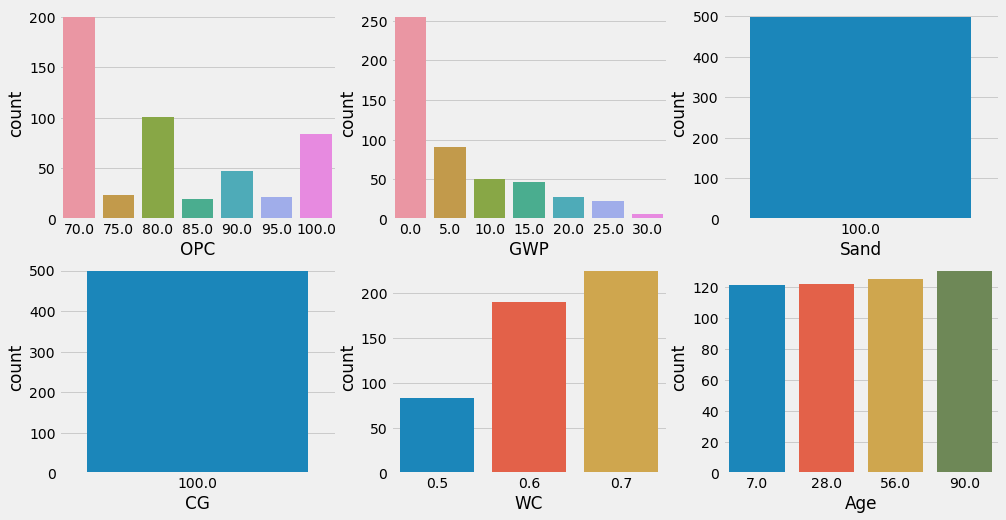

<Figure size 432x288 with 0 Axes>

In [36]:
# plot for categorical features
cat_columns = df_opc_gwp.columns[:-1]
nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols   # The number of corresponding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(15,8))
for ind,col in enumerate(cat_columns):
    sns.countplot(x=col,data=df_opc_gwp,ax=axes.flatten()[ind])
plt.show()
plt.savefig('categorical_plot_opc_gwp.jpg');

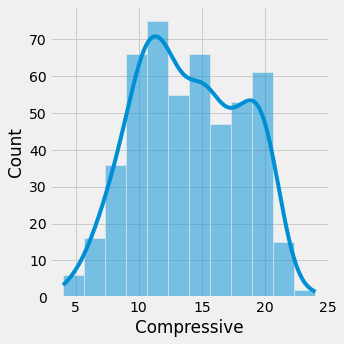

In [37]:
# continuous plot
sns.displot(df_opc_gwp, x='Compressive', kde=True)
plt.savefig('continuous_opc_gwp.jpg');

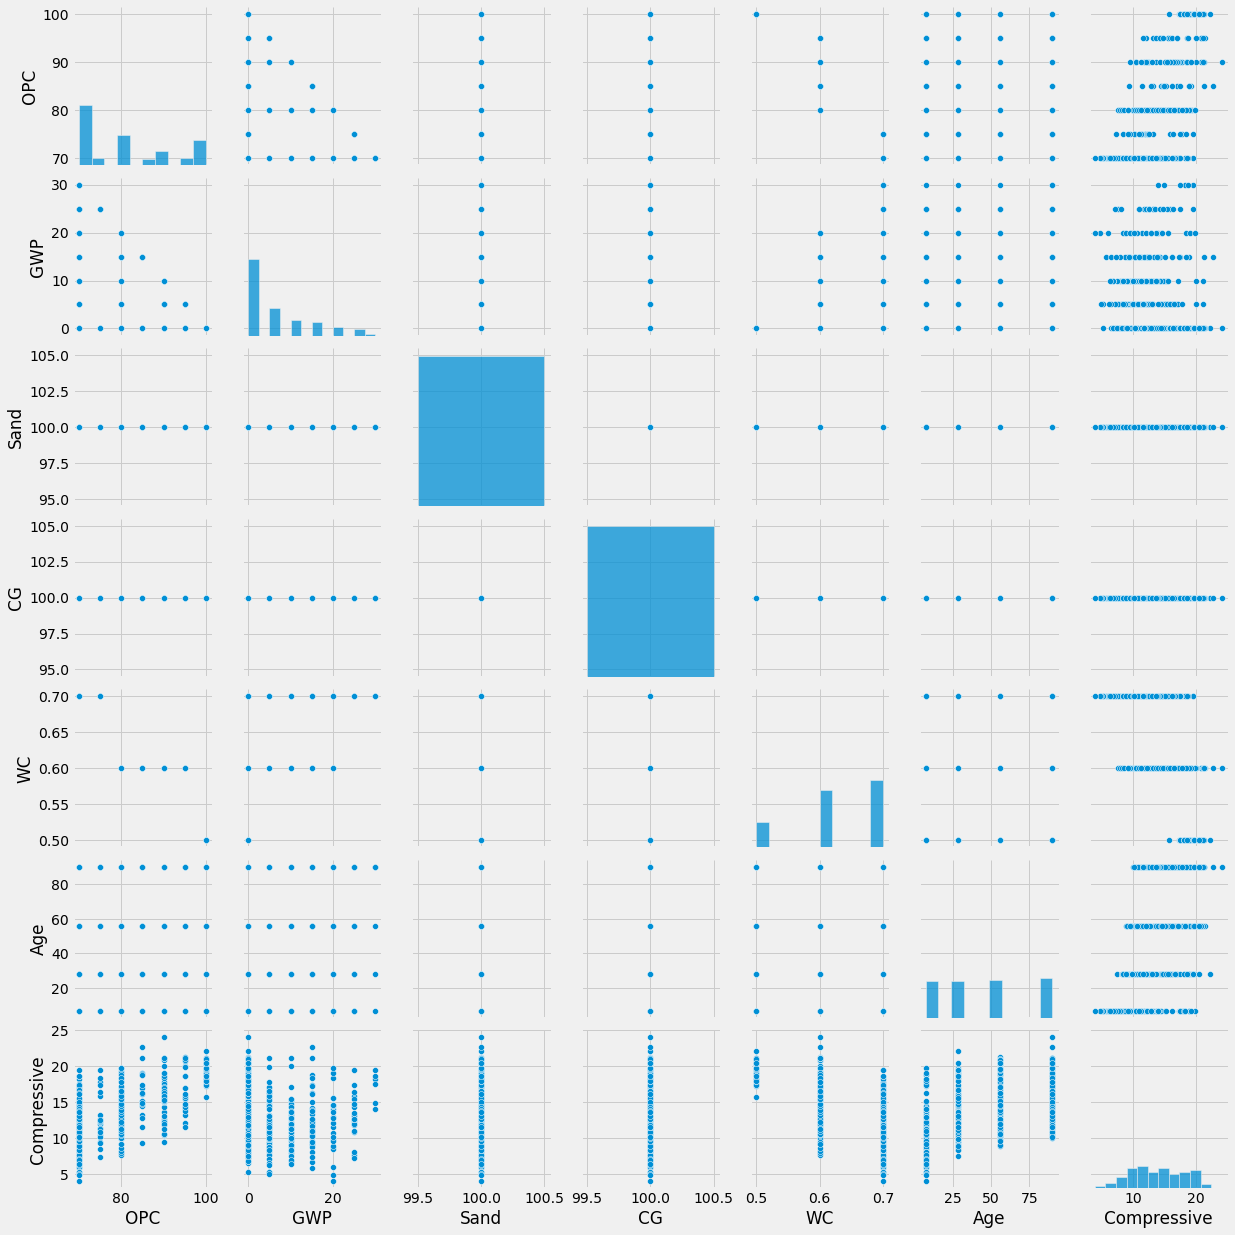

In [38]:
# pair plot of all the features
sns.pairplot(df_opc_gwp)
plt.savefig('pairplot_opc_gwp.jpg')

###### Feature Selection

In [14]:
from sklearn.model_selection import train_test_split
X_opc_gwp = df_opc_gwp.drop('Compressive', axis=1)
y_opc_gwp = df_opc_gwp['Compressive']
X_train, X_test, y_train, y_test = train_test_split(X_opc_gwp, y_opc_gwp, test_size=0.3, random_state=42)

In [15]:
constant_columns = ['Sand', 'CG'] # already gotten from OPC-RHA feature selection
# dropping the constant columns since they have no effect on the training data
X_train.drop(constant_columns, axis=1, inplace=True)
X_test.drop(constant_columns, axis=1, inplace=True)

In [16]:
from sklearn.feature_selection import mutual_info_regression
MI_reg_clf = mutual_info_regression(X_train, y_train)
MI_reg_clf_series = pd.Series(MI_reg_clf, index=X_train.columns)
MI_reg_clf_series.sort_values(ascending=False, inplace=True)

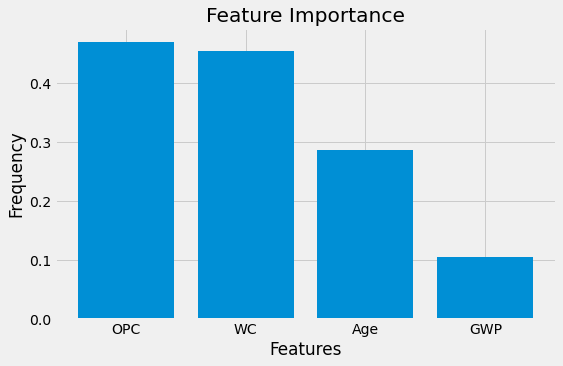

In [43]:
# The order in which the features are relevant for the prediction of the compressive strength
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.bar(x=MI_reg_clf_series.index, height = MI_reg_clf_series.values)
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Feature Importance')
plt.savefig('featureimportance_opc_gwp.jpg');

###### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

###### parameter optimization

In [45]:
import optuna
def objective(trial):
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10, step=1)
    max_depth = trial.suggest_int('max_depth',3, 10, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10, step=1)
    max_features = trial.suggest_categorical('max_features', ["auto", "sqrt", "log2"])
    model = DecisionTreeRegressor(random_state=42, min_samples_split=min_samples_split, max_depth=max_depth, min_samples_leaf=
                                 min_samples_leaf, max_features=max_features)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    test_accuracy = r2_score(y_test, pred)
    error = mean_squared_error(y_test, pred)
    train_accuracy = model.score(X_train, y_train)
    return test_accuracy, train_accuracy, error
study = optuna.create_study(directions=['maximize', 'maximize', 'minimize'])
study.optimize(objective, n_trials=10000)

KeyboardInterrupt: 

In [18]:
dtree = DecisionTreeRegressor(min_samples_split= 2, max_depth = 10, min_samples_leaf = 1, max_features = 'sqrt',
                             random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', random_state=42)

In [19]:
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
accuracy = r2_score(y_test, dtree_pred)
MSE = mean_squared_error(y_test, dtree_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, dtree_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE, 2)))
print('Test score {}%'.format(np.round(dtree.score(X_test, y_test)*100, 2)))
print('Train score {}%'.format(np.round(dtree.score(X_train, y_train)*100, 2)))

R^2 score: 85.16%
MSE: 2.57
RMSE: 1.6
MAE: 1.26
Test score 85.16%
Train score 87.71%


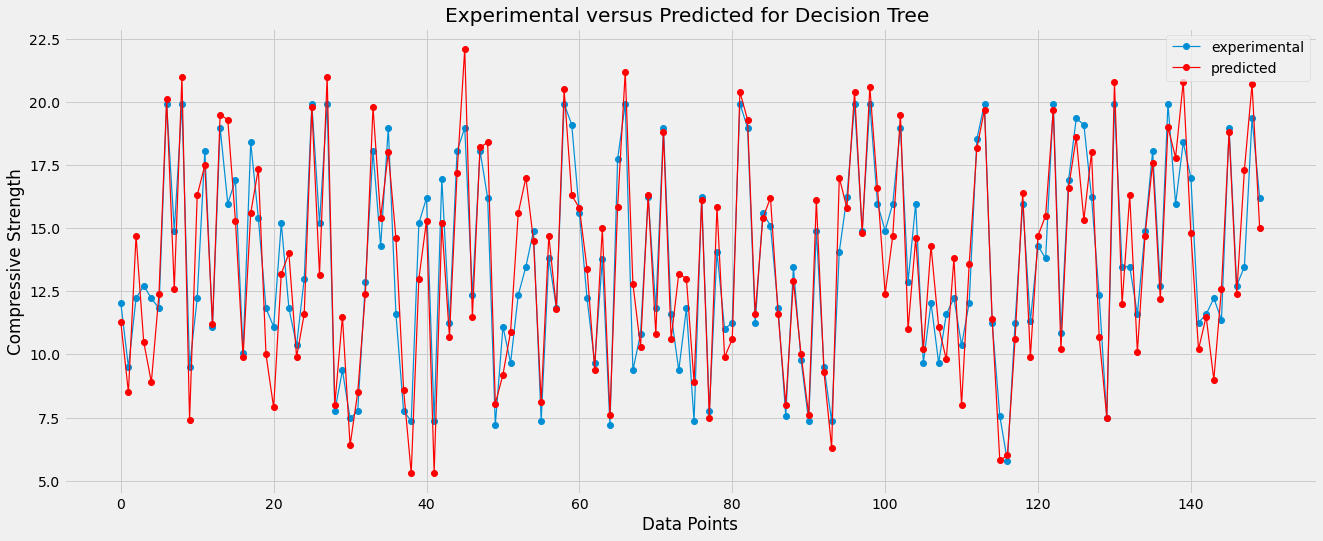

In [21]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(dtree_pred)), dtree_pred, marker='o', linewidth=1.2)
plt.plot(np.arange(len(y_test)), y_test, marker='o', linewidth=1.2, color='red')
plt.title('Experimental versus Predicted for Decision Tree ')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength')
plt.legend(['experimental', 'predicted'])
plt.savefig('opc_gwp_dtree_experimental_predicted.jpg');

In [22]:
# the residual between the actual value and the predicted value
dtree_residual = dtree_pred-y_test

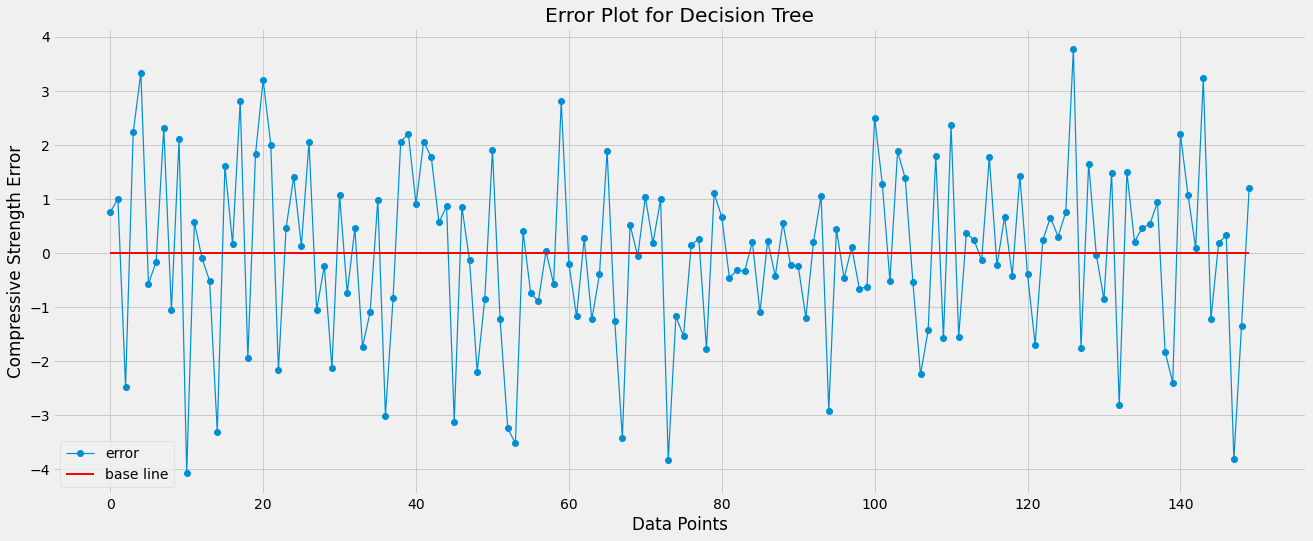

In [23]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(dtree_residual)), dtree_residual, marker='o', linewidth=1.2)
plt.plot(np.zeros(len(dtree_residual)), color='red', linewidth=2)
plt.title('Error Plot for Decision Tree')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength Error')
plt.legend(['error', 'base line'])
plt.savefig('opc_gwp_dtree_error_analysis.jpg');

###### SVR

In [22]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
import optuna
def objective(trial):
    epsilon = trial.suggest_float('epsilon', 0.1, 10, step=0.1)
    C = trial.suggest_int('C',1, 201, step=2)
    degree = trial.suggest_int('degree', 1, 20, step=1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['auto', 'scale'])
    svr_model = SVR(kernel=kernel, degree=degree, gamma=gamma, C=C, epsilon=epsilon)
    svr_model.fit(X_train_scaled, y_train)
    svr_pred = svr_model.predict(X_test_scaled)
    test_accuracy = r2_score(y_test, svr_pred)
    error = mean_squared_error(y_test, svr_pred)
    training_accuracy = svr_model.score(X_train_scaled, y_train)
    return test_accuracy, training_accuracy, error
study = optuna.create_study(directions=['maximize', 'maximize', 'minimize'])
study.optimize(objective, n_trials=10000)

[I 2023-01-07 22:52:05,980] A new study created in memory with name: no-name-bfac188b-75c4-4df8-9c4e-49013560e1a9
[I 2023-01-07 22:52:06,152] Trial 0 finished with values: [0.7670059938188057, 0.7483285480891915, 4.0371515808883744] and parameters: {'epsilon': 0.30000000000000004, 'C': 87, 'degree': 18, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:06,160] Trial 1 finished with values: [0.059524877715982916, 0.06217577244666239, 16.2958725374351] and parameters: {'epsilon': 9.700000000000001, 'C': 79, 'degree': 20, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:06,179] Trial 2 finished with values: [-308.2267122850495, 0.4028407912075671, 5358.056762128262] and parameters: {'epsilon': 5.7, 'C': 43, 'degree': 15, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:06,190] Trial 3 finished with values: [0.36376519815284003, 0.35534039526639016, 11.024216365874834] and parameters: {'epsilon': 8.2, 'C': 131, 'degree': 3, 'kernel': 'sigmoid', 'gamma': 'scale'}

[I 2023-01-07 22:52:07,969] Trial 35 finished with values: [-6.264437573180366, 0.23016374411706642, 125.8729188510651] and parameters: {'epsilon': 6.5, 'C': 55, 'degree': 13, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:07,986] Trial 36 finished with values: [0.6862737082892825, 0.6894247320293487, 5.436022219220499] and parameters: {'epsilon': 4.3999999999999995, 'C': 115, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:07,992] Trial 37 finished with values: [0.3849658339846155, 0.3884476830663631, 10.656867085664038] and parameters: {'epsilon': 7.1, 'C': 139, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:08,083] Trial 38 finished with values: [0.8336895740951413, 0.8585211397863757, 2.8817067437257164] and parameters: {'epsilon': 0.2, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:08,091] Trial 39 finished with values: [0.3059029827488352, 0.30857423094715153, 12.02681097429715] and paramete

[I 2023-01-07 22:52:10,289] Trial 71 finished with values: [0.4861147443694721, 0.4889453812055454, 8.904231942132522] and parameters: {'epsilon': 6.1, 'C': 77, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:10,307] Trial 72 finished with values: [0.6694986923242905, 0.6567664862507097, 5.726687560069776] and parameters: {'epsilon': 4.0, 'C': 23, 'degree': 3, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:10,316] Trial 73 finished with values: [0.025989744402659887, 0.004535931426699724, 16.87694506668247] and parameters: {'epsilon': 9.8, 'C': 73, 'degree': 11, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:10,366] Trial 74 finished with values: [0.7463575783075784, 0.7450846690454933, 4.394932386885435] and parameters: {'epsilon': 3.0000000000000004, 'C': 161, 'degree': 20, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:10,374] Trial 75 finished with values: [0.4082522353393835, 0.4118026008255161, 10.25337716940631] and parame

[I 2023-01-07 22:52:12,281] Trial 107 finished with values: [0.7669946146791896, 0.7483213152751366, 4.037348750387467] and parameters: {'epsilon': 0.30000000000000004, 'C': 55, 'degree': 2, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:12,317] Trial 108 finished with values: [0.8285720739300225, 0.8530422257762647, 2.970379084359833] and parameters: {'epsilon': 1.6, 'C': 139, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:12,386] Trial 109 finished with values: [0.7770662081573521, 0.7558736299615406, 3.8628354648362166] and parameters: {'epsilon': 1.3000000000000003, 'C': 35, 'degree': 8, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:12,400] Trial 110 finished with values: [0.8128897341792338, 0.8209206121543539, 3.242111322259931] and parameters: {'epsilon': 2.4000000000000004, 'C': 9, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:12,454] Trial 111 finished with values: [0.8422111716906467, 0.8607590435289254,

[I 2023-01-07 22:52:14,054] Trial 142 finished with values: [0.841102306784282, 0.8592800370326485, 2.7532642743885702] and parameters: {'epsilon': 1.1, 'C': 143, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:14,101] Trial 143 finished with values: [0.8367245012220221, 0.8569525904374954, 2.8291197220722974] and parameters: {'epsilon': 1.4000000000000001, 'C': 185, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:14,153] Trial 144 finished with values: [-103989.17076257823, 0.4966073969694088, 1801866.447862641] and parameters: {'epsilon': 4.1, 'C': 113, 'degree': 18, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:14,182] Trial 145 finished with values: [-9229.728887510926, -9350.168569967147, 159943.39224325755] and parameters: {'epsilon': 2.4000000000000004, 'C': 53, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:14,195] Trial 146 finished with values: [0.11447445712011539, 0.12025345892279049, 15.3437

[I 2023-01-07 22:52:15,790] Trial 178 finished with values: [0.8156397896462517, 0.837474380798011, 3.1944603506397935] and parameters: {'epsilon': 2.1, 'C': 123, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:15,814] Trial 179 finished with values: [0.7989246968751177, 0.8001969706275042, 3.484087385737001] and parameters: {'epsilon': 3.0000000000000004, 'C': 131, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:15,838] Trial 180 finished with values: [0.8128897341792338, 0.8209206121543539, 3.242111322259931] and parameters: {'epsilon': 2.4000000000000004, 'C': 9, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:22,529] Trial 181 finished with values: [-163039.86180680268, 0.663379994017818, 2825054.102382586] and parameters: {'epsilon': 0.9, 'C': 55, 'degree': 20, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:22,585] Trial 182 finished with values: [0.8412175828406759, 0.8533555664200302, 2.7512668542791996

[I 2023-01-07 22:52:24,565] Trial 214 finished with values: [0.25520019570187624, 0.5543370737360481, 12.905352187597249] and parameters: {'epsilon': 0.6, 'C': 55, 'degree': 4, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:24,589] Trial 215 finished with values: [0.17303642217712578, 0.17901642007468255, 14.329026614308635] and parameters: {'epsilon': 8.6, 'C': 133, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:24,656] Trial 216 finished with values: [0.8414167055394697, 0.8621604305432189, 2.7478166002087114] and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:24,698] Trial 217 finished with values: [0.8391919337153888, 0.857022860823264, 2.7863658368775686] and parameters: {'epsilon': 0.9, 'C': 81, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:24,735] Trial 218 finished with values: [0.8371601128872588, 0.8500836664019622, 2.8215717582779143] and parameters: {'epsilo

[I 2023-01-07 22:52:26,480] Trial 250 finished with values: [0.8408305772266118, 0.8579412517371643, 2.75797260758264] and parameters: {'epsilon': 0.9, 'C': 91, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:26,536] Trial 251 finished with values: [0.8400967522031377, 0.8605322897876861, 2.770687796707763] and parameters: {'epsilon': 0.6, 'C': 143, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:26,585] Trial 252 finished with values: [0.8400929809366517, 0.8615204749735523, 2.770753142485131] and parameters: {'epsilon': 0.9, 'C': 185, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:26,634] Trial 253 finished with values: [0.8422067206063799, 0.8549913436260757, 2.7341277906613026] and parameters: {'epsilon': 0.6, 'C': 67, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:26,676] Trial 254 finished with values: [0.8370708183278365, 0.8559485888693954, 2.823118989803932] and parameters: {'epsilon': 0.9,

[I 2023-01-07 22:52:28,767] Trial 286 finished with values: [0.7305660049974869, 0.7360772754311415, 4.66855734487672] and parameters: {'epsilon': 1.1, 'C': 143, 'degree': 3, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:28,815] Trial 287 finished with values: [0.8391919337153888, 0.857022860823264, 2.7863658368775686] and parameters: {'epsilon': 0.9, 'C': 81, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:28,877] Trial 288 finished with values: [0.8414721362908204, 0.8617989364296224, 2.746856136250375] and parameters: {'epsilon': 0.6, 'C': 185, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:28,926] Trial 289 finished with values: [0.8422067206063799, 0.8549913436260757, 2.7341277906613026] and parameters: {'epsilon': 0.6, 'C': 67, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:28,971] Trial 290 finished with values: [0.8367245012220221, 0.8569525904374954, 2.8291197220722974] and parameters: {'epsilon': 

[I 2023-01-07 22:52:31,366] Trial 322 finished with values: [0.8422111716906467, 0.8607590435289254, 2.7340506654932386] and parameters: {'epsilon': 0.9, 'C': 133, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:31,414] Trial 323 finished with values: [0.8408305772266118, 0.8579412517371643, 2.75797260758264] and parameters: {'epsilon': 0.9, 'C': 91, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:31,462] Trial 324 finished with values: [0.37328941718202324, 0.5487143416677907, 10.85918758878049] and parameters: {'epsilon': 0.9, 'C': 23, 'degree': 4, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:31,462] Trial 325 finished with values: [0.23019936676231467, 0.23411720357124532, 13.338548464751169] and parameters: {'epsilon': 8.2, 'C': 133, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:31,530] Trial 326 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon

[I 2023-01-07 22:52:33,803] Trial 359 finished with values: [0.8394834742146449, 0.861512737146776, 2.781314234019813] and parameters: {'epsilon': 0.9, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:33,850] Trial 360 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:33,912] Trial 361 finished with values: [0.8400929809366517, 0.8615204749735523, 2.770753142485131] and parameters: {'epsilon': 0.9, 'C': 185, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:33,912] Trial 362 finished with values: [0.26131973450615464, 0.2634572417694314, 12.799317246343064] and parameters: {'epsilon': 8.0, 'C': 185, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:33,959] Trial 363 finished with values: [0.8422111716906467, 0.8607590435289254, 2.7340506654932386] and parameters: {'epsilon':

[I 2023-01-07 22:52:35,913] Trial 396 finished with values: [0.6731394034737934, 0.6766269118389752, 5.663603951123446] and parameters: {'epsilon': 4.5, 'C': 185, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:35,976] Trial 397 finished with values: [0.8395786858830496, 0.8601169917297363, 2.7796644751100477] and parameters: {'epsilon': 0.6, 'C': 133, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:36,039] Trial 398 finished with values: [0.8422111716906467, 0.8607590435289254, 2.7340506654932386] and parameters: {'epsilon': 0.9, 'C': 133, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:36,039] Trial 399 finished with values: [0.5748306932667685, 0.5809556095491797, 7.367026160700533] and parameters: {'epsilon': 5.3, 'C': 177, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:36,269] Trial 400 finished with values: [0.8414721362908204, 0.8617989364296224, 2.746856136250375] and parameters: {'epsilon': 

[I 2023-01-07 22:52:39,950] Trial 433 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:39,950] Trial 434 finished with values: [0.31998771624627054, 0.32285507494361787, 11.782760901775791] and parameters: {'epsilon': 7.6, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:39,997] Trial 435 finished with values: [0.842007231081161, 0.8609944460017249, 2.737584400834705] and parameters: {'epsilon': 0.9, 'C': 143, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:40,013] Trial 436 finished with values: [0.7530732123225281, 0.7570030650446387, 4.2785687390625045] and parameters: {'epsilon': 3.7, 'C': 143, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:40,075] Trial 437 finished with values: [0.8414721362908204, 0.8617989364296224, 2.746856136250375] and parameters: {'epsilon'

[I 2023-01-07 22:52:41,896] Trial 469 finished with values: [0.8419677751950211, 0.8544892135194551, 2.7382680638855965] and parameters: {'epsilon': 0.6, 'C': 63, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:41,959] Trial 470 finished with values: [0.8361270269536399, 0.8497393975454572, 2.839472323955383] and parameters: {'epsilon': 0.6, 'C': 33, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:42,006] Trial 471 finished with values: [0.8314195562709498, 0.8456975519285623, 2.9210399703515253] and parameters: {'epsilon': 0.6, 'C': 19, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:42,068] Trial 472 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:42,131] Trial 473 finished with values: [0.8416119662676755, 0.8595205789483383, 2.7444332635706497] and parameters: {'epsilon': 0

[I 2023-01-07 22:52:45,428] Trial 506 finished with values: [0.8414167055394697, 0.8621604305432189, 2.7478166002087114] and parameters: {'epsilon': 0.6, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:45,491] Trial 507 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:45,584] Trial 508 finished with values: [0.8414721362908204, 0.8617989364296224, 2.746856136250375] and parameters: {'epsilon': 0.6, 'C': 185, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:45,647] Trial 509 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:45,725] Trial 510 finished with values: [0.8431227948962955, 0.8613296430712933, 2.7182547180945] and parameters: {'epsilon': 0.

[I 2023-01-07 22:52:47,772] Trial 543 finished with values: [-113051.5784376058, -114481.30452700618, 1958893.2919070332] and parameters: {'epsilon': 0.6, 'C': 185, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:47,851] Trial 544 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:47,944] Trial 545 finished with values: [0.8414721362908204, 0.8617989364296224, 2.746856136250375] and parameters: {'epsilon': 0.6, 'C': 185, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:48,007] Trial 546 finished with values: [0.8406108953471996, 0.85281629702378, 2.761779096261461] and parameters: {'epsilon': 0.6, 'C': 51, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:48,085] Trial 547 finished with values: [0.8414167055394697, 0.8621604305432189, 2.7478166002087114] and parameters: {'epsil

[I 2023-01-07 22:52:50,788] Trial 579 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:50,835] Trial 580 finished with values: [0.8397300872503151, 0.8580604180428051, 2.777041101748551] and parameters: {'epsilon': 0.8, 'C': 87, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:51,038] Trial 581 finished with values: [0.772105242238748, 0.7526314462463364, 3.9487954932905556] and parameters: {'epsilon': 0.8, 'C': 143, 'degree': 20, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:51,100] Trial 582 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:51,116] Trial 583 finished with values: [0.7410176279727181, 0.7437338804506255, 4.487459183130491] and parameters: {'epsilon'

[I 2023-01-07 22:52:53,167] Trial 615 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:53,199] Trial 616 finished with values: [-113052.34958588859, -114486.98834302023, 1958906.6538065942] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:53,246] Trial 617 finished with values: [0.8349418863615068, 0.8471735719981254, 2.8600075827524902] and parameters: {'epsilon': 0.8, 'C': 19, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:52:53,292] Trial 618 finished with values: [0.8222536653273155, 0.8432212908949696, 3.0798598976099396] and parameters: {'epsilon': 2.0, 'C': 191, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:52:53,355] Trial 619 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'e

[I 2023-01-07 22:53:04,085] Trial 651 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:04,180] Trial 652 finished with values: [0.8431590615328288, 0.8612810010495047, 2.717626316053548] and parameters: {'epsilon': 0.8, 'C': 141, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:04,260] Trial 653 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:04,325] Trial 654 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:04,565] Trial 655 finished with values: [-7309.092245230749, 0.7339566496369423, 126663.98997973527] and parameters: {'epsilon':

[I 2023-01-07 22:53:06,662] Trial 687 finished with values: [0.8376157648102511, 0.8498151763545274, 2.813676551395155] and parameters: {'epsilon': 0.8, 'C': 25, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:06,711] Trial 688 finished with values: [0.840109156957209, 0.8540151081977521, 2.7704728561033662] and parameters: {'epsilon': 0.8, 'C': 45, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:06,725] Trial 689 finished with values: [0.658872377557149, 0.6628068778382185, 5.9108126548064215] and parameters: {'epsilon': 4.6, 'C': 185, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:06,831] Trial 690 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:06,891] Trial 691 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8

[I 2023-01-07 22:53:20,260] Trial 724 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:20,370] Trial 725 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:20,430] Trial 726 finished with values: [0.8431590615328288, 0.8612810010495047, 2.717626316053548] and parameters: {'epsilon': 0.8, 'C': 141, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:20,500] Trial 727 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:20,577] Trial 728 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 

[I 2023-01-07 22:53:22,482] Trial 760 finished with values: [0.8430398714822696, 0.86148194288137, 2.719691555022258] and parameters: {'epsilon': 0.8, 'C': 149, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:22,571] Trial 761 finished with values: [0.8429376734641889, 0.861820815876216, 2.7214623683449712] and parameters: {'epsilon': 0.8, 'C': 157, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:22,637] Trial 762 finished with values: [0.8431227948962955, 0.8613296430712933, 2.7182547180945] and parameters: {'epsilon': 0.8, 'C': 143, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:22,680] Trial 763 finished with values: [-92112.4802630287, -93280.10729995469, 1596075.747012207] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 5, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:22,737] Trial 764 finished with values: [0.8432133449676218, 0.8605404858320986, 2.716685731966503] and parameters: {'epsilon': 0.

[I 2023-01-07 22:53:33,958] Trial 797 finished with values: [0.8367808357387101, 0.8597260847371545, 2.8281435983220216] and parameters: {'epsilon': 0.4, 'C': 157, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:33,993] Trial 798 finished with values: [-113052.34958588859, -114486.98834302023, 1958906.6538065942] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:34,078] Trial 799 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:34,203] Trial 800 finished with values: [-113052.34958588859, -114486.98834302023, 1958906.6538065942] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:34,253] Trial 801 finished with values: [0.8400314696574185, 0.8555671666843034, 2.7718189654316916] and parame

[I 2023-01-07 22:53:36,013] Trial 834 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:36,018] Trial 835 finished with values: [0.3849658339846155, 0.3884476830663631, 10.656867085664038] and parameters: {'epsilon': 7.1, 'C': 185, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:36,058] Trial 836 finished with values: [0.3223803635751321, 0.31622460735908176, 11.741302839808695] and parameters: {'epsilon': 8.2, 'C': 185, 'degree': 20, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:36,115] Trial 837 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:36,168] Trial 838 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'ep

[I 2023-01-07 22:53:37,867] Trial 870 finished with values: [0.8430090161767335, 0.8615228242490216, 2.720226193434487] and parameters: {'epsilon': 0.8, 'C': 151, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:37,877] Trial 871 finished with values: [0.658872377557149, 0.6628068778382185, 5.9108126548064215] and parameters: {'epsilon': 4.6, 'C': 129, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:37,934] Trial 872 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:37,984] Trial 873 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:38,009] Trial 874 finished with values: [0.8257471688776398, 0.8403270744924658, 3.0193269954456547] and parameters: {'epsilon'

[I 2023-01-07 22:53:40,080] Trial 906 finished with values: [-113052.34958588859, -114486.98834302023, 1958906.6538065942] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:40,133] Trial 907 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:40,183] Trial 908 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:40,235] Trial 909 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:40,245] Trial 910 finished with values: [0.7480484108417207, 0.7510445183785186, 4.36563486395722] and parameters: {'epsi

[I 2023-01-07 22:53:49,400] Trial 942 finished with values: [0.8139470867074903, 0.8109985013979417, 3.2237902825861147] and parameters: {'epsilon': 0.8, 'C': 1, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:49,447] Trial 943 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:49,496] Trial 944 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:49,572] Trial 945 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:49,597] Trial 946 finished with values: [-1.1160126690087244, 0.017445789709967796, 36.664736710973415] and parameters: {'epsi

[I 2023-01-07 22:53:52,480] Trial 978 finished with values: [0.8429094887609672, 0.8620342476567933, 2.7219507324923304] and parameters: {'epsilon': 0.8, 'C': 161, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:52,485] Trial 979 finished with values: [0.44029127365008847, 0.44376460106500226, 9.698227892022684] and parameters: {'epsilon': 6.6, 'C': 197, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:52,495] Trial 980 finished with values: [0.360096084887669, 0.3634093697351415, 11.087792106134108] and parameters: {'epsilon': 7.3, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:52,580] Trial 981 finished with values: [0.84167091896225, 0.8622829114530612, 2.743411773928062] and parameters: {'epsilon': 0.7000000000000001, 'C': 185, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:52,632] Trial 982 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and paramete

[I 2023-01-07 22:53:55,212] Trial 1014 finished with values: [0.6862737082892825, 0.6894247320293487, 5.436022219220499] and parameters: {'epsilon': 4.3999999999999995, 'C': 191, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:55,262] Trial 1015 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:55,350] Trial 1016 finished with values: [0.8429376734641889, 0.861820815876216, 2.7214623683449712] and parameters: {'epsilon': 0.8, 'C': 157, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:55,403] Trial 1017 finished with values: [0.8416119662676755, 0.8595205789483383, 2.7444332635706497] and parameters: {'epsilon': 0.8, 'C': 105, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:55,453] Trial 1018 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parame

[I 2023-01-07 22:53:58,495] Trial 1050 finished with values: [-128202.69634675843, -129830.6046204961, 2221420.902044751] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 4, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:58,535] Trial 1051 finished with values: [-128202.69634675843, -129830.6046204961, 2221420.902044751] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 7, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:58,615] Trial 1052 finished with values: [0.8396096442343384, 0.8605730313454457, 2.7791280511955643] and parameters: {'epsilon': 1.1, 'C': 173, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:53:58,670] Trial 1053 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:53:58,710] Trial 1054 finished with values: [0.8423544223543111, 0.8598476501501275, 2.7315685216271577] and parame

[I 2023-01-07 22:54:01,212] Trial 1086 finished with values: [0.08949467581737847, 0.09511658866838568, 15.776577557418053] and parameters: {'epsilon': 9.3, 'C': 197, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:01,224] Trial 1087 finished with values: [0.10209563756017104, 0.10780157278084856, 15.558237208434711] and parameters: {'epsilon': 9.2, 'C': 99, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:01,339] Trial 1088 finished with values: [0.7721368838844347, 0.752646534511122, 3.9482472297450704] and parameters: {'epsilon': 0.8, 'C': 63, 'degree': 4, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:01,394] Trial 1089 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:01,444] Trial 1090 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'

[I 2023-01-07 22:54:03,413] Trial 1122 finished with values: [0.8429376734641889, 0.861820815876216, 2.7214623683449712] and parameters: {'epsilon': 0.8, 'C': 157, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:03,463] Trial 1123 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:03,508] Trial 1124 finished with values: [0.838918357620894, 0.8516930505763282, 2.7911061655258695] and parameters: {'epsilon': 0.8, 'C': 33, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:03,590] Trial 1125 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:03,640] Trial 1126 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon'

[I 2023-01-07 22:54:06,213] Trial 1158 finished with values: [0.8397300872503151, 0.8580604180428051, 2.777041101748551] and parameters: {'epsilon': 0.8, 'C': 87, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:06,263] Trial 1159 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:06,340] Trial 1160 finished with values: [0.8416119662676755, 0.8595205789483383, 2.7444332635706497] and parameters: {'epsilon': 0.8, 'C': 105, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:06,400] Trial 1161 finished with values: [0.8415158552006408, 0.8623084788130446, 2.7460986066092112] and parameters: {'epsilon': 0.7000000000000001, 'C': 187, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:06,415] Trial 1162 finished with values: [0.1950808054901818, 0.2775565459428956, 13.947057488146639] and par

[I 2023-01-07 22:54:08,211] Trial 1194 finished with values: [0.396757973772507, 0.40029072063246185, 10.452541418377471] and parameters: {'epsilon': 7.0, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:08,258] Trial 1195 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:08,343] Trial 1196 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:08,396] Trial 1197 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:08,447] Trial 1198 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and par

[I 2023-01-07 22:54:10,658] Trial 1230 finished with values: [-128202.69634675843, -129830.6046204961, 2221420.902044751] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 12, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:10,706] Trial 1231 finished with values: [0.8404377144199112, 0.8575029307757988, 2.7647798500827334] and parameters: {'epsilon': 0.8, 'C': 77, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:10,771] Trial 1232 finished with values: [0.8415612633936076, 0.8618809171455992, 2.7453118062917867] and parameters: {'epsilon': 0.6, 'C': 187, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:10,996] Trial 1233 finished with values: [0.04313947772549431, 0.5841835108049693, 16.57978689454369] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 4, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:11,063] Trial 1234 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters:

[I 2023-01-07 22:54:13,281] Trial 1266 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:13,357] Trial 1267 finished with values: [0.8402926953977996, 0.8576344448457685, 2.767292634784677] and parameters: {'epsilon': 0.8, 'C': 79, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:13,427] Trial 1268 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:13,482] Trial 1269 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:13,521] Trial 1270 finished with values: [-128202.69634675843, -129830.6046204961, 2221420.902044751] and parameters: {'epsi

[I 2023-01-07 22:54:15,628] Trial 1302 finished with values: [-133464.44496080244, -135159.48942705654, 2312592.6754461033] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:15,678] Trial 1303 finished with values: [0.8422762769018268, 0.8602616243314223, 2.7329225694939128] and parameters: {'epsilon': 0.7000000000000001, 'C': 115, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:15,725] Trial 1304 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:15,735] Trial 1305 finished with values: [0.5950310594967914, 0.6016475597145194, 7.017008828509422] and parameters: {'epsilon': 5.1, 'C': 201, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:15,750] Trial 1306 finished with values: [0.42999110673000995, 0.4335165005673942, 9.87670173281527] an

[I 2023-01-07 22:54:18,199] Trial 1338 finished with values: [0.843072145357807, 0.8610027746815435, 2.719132336655302] and parameters: {'epsilon': 0.8, 'C': 131, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:18,255] Trial 1339 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:18,318] Trial 1340 finished with values: [0.8401849881446486, 0.8553910003483639, 2.769158908147064] and parameters: {'epsilon': 0.8, 'C': 51, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:18,336] Trial 1341 finished with values: [0.05035893749191622, 0.05566304850787085, 16.454693318589193] and parameters: {'epsilon': 9.6, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:18,392] Trial 1342 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'e

[I 2023-01-07 22:54:20,532] Trial 1374 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:20,612] Trial 1375 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:20,672] Trial 1376 finished with values: [0.8403009530804842, 0.8625094859239365, 2.7671495516330924] and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:20,722] Trial 1377 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:20,777] Trial 1378 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and pa

[I 2023-01-07 22:54:34,445] Trial 1410 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:34,662] Trial 1411 finished with values: [0.7721352182784772, 0.7526389097561124, 3.9482760901601273] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 15, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:34,715] Trial 1412 finished with values: [0.840109156957209, 0.8540151081977521, 2.7704728561033662] and parameters: {'epsilon': 0.8, 'C': 45, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:34,725] Trial 1413 finished with values: [0.3338168500167342, 0.3368596049240782, 11.543139676411196] and parameters: {'epsilon': 7.5, 'C': 173, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:34,750] Trial 1414 finished with values: [0.8041323299051354, 0.8075817927058546, 3.393853288026038] and parameters: {'e

[I 2023-01-07 22:54:36,608] Trial 1446 finished with values: [0.658872377557149, 0.6628068778382185, 5.9108126548064215] and parameters: {'epsilon': 4.6, 'C': 167, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:36,658] Trial 1447 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:36,701] Trial 1448 finished with values: [0.8297795545383656, 0.8544643506989285, 2.949456733923602] and parameters: {'epsilon': 1.6, 'C': 195, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:36,753] Trial 1449 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:36,934] Trial 1450 finished with values: [0.8385614183709733, 0.8507640310743451, 2.797290950622778] and parameters: {'epsil

[I 2023-01-07 22:54:38,738] Trial 1482 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:38,867] Trial 1483 finished with values: [-10385123.826639546, 0.5985466496669549, 179945929.9351494] and parameters: {'epsilon': 3.0000000000000004, 'C': 169, 'degree': 20, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:39,101] Trial 1484 finished with values: [0.7721352182784772, 0.7526389097561124, 3.9482760901601273] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 3, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:39,156] Trial 1485 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:39,189] Trial 1486 finished with values: [-103478.63752422745, -104783.92296109619, 1793020.2972509337] a

[I 2023-01-07 22:54:41,662] Trial 1518 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:41,708] Trial 1519 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:41,748] Trial 1520 finished with values: [0.8297468578184725, 0.8544387646924582, 2.9500232790316496] and parameters: {'epsilon': 1.6, 'C': 193, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:41,849] Trial 1521 finished with values: [0.8403009530804842, 0.8625094859239365, 2.7671495516330924] and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:41,864] Trial 1522 finished with values: [0.6134980692799612, 0.6203883383477035, 6.697025842842288] and pa

[I 2023-01-07 22:54:43,838] Trial 1554 finished with values: [0.8402761825337896, 0.8585578377699857, 2.7675787577461035] and parameters: {'epsilon': 0.8, 'C': 93, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:43,893] Trial 1555 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:54:43,943] Trial 1556 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:43,953] Trial 1557 finished with values: [0.3059029827488352, 0.30857423094715153, 12.02681097429715] and parameters: {'epsilon': 7.7, 'C': 165, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:43,988] Trial 1558 finished with values: [-96580.60495682065, -97805.19414768893, 1673496.1792662472] and parameters: {'eps

[I 2023-01-07 22:54:46,023] Trial 1590 finished with values: [0.4689510449943627, 0.4721126157892027, 9.20163210792146] and parameters: {'epsilon': 6.3, 'C': 157, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:46,426] Trial 1591 finished with values: [0.7279569138339013, 0.7313404359832055, 4.713765789026823] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 3, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:46,628] Trial 1592 finished with values: [0.7721202504473825, 0.7526378980312246, 3.9485354419089407] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 20, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:46,688] Trial 1593 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:54:46,732] Trial 1594 finished with values: [0.837611296481466, 0.8490614503005322, 2.8137539753637557] and parameters: {'ep

[I 2023-01-07 22:55:01,646] Trial 1626 finished with values: [0.804132329905136, 0.8075817927058552, 3.3938532880260284] and parameters: {'epsilon': 2.9000000000000004, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:01,659] Trial 1627 finished with values: [0.11447445712011539, 0.12025345892279049, 15.343745978488235] and parameters: {'epsilon': 9.1, 'C': 165, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:01,715] Trial 1628 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:01,771] Trial 1629 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:01,874] Trial 1630 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and pa

[I 2023-01-07 22:55:04,381] Trial 1662 finished with values: [0.8393293509448377, 0.8522678547887372, 2.783984770539409] and parameters: {'epsilon': 0.8, 'C': 37, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:04,606] Trial 1663 finished with values: [0.8397074552744672, 0.8562718180816152, 2.7774332522530645] and parameters: {'epsilon': 0.8, 'C': 59, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:04,713] Trial 1664 finished with values: [-45189.16950729002, -45759.22797906839, 783022.564645248] and parameters: {'epsilon': 0.8, 'C': 117, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:04,922] Trial 1665 finished with values: [0.8404483725992667, 0.8606481175108203, 2.7645951728614615] and parameters: {'epsilon': 1.0, 'C': 177, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:05,107] Trial 1666 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: 

[I 2023-01-07 22:55:14,915] Trial 1698 finished with values: [0.7709046531180463, 0.752761222555256, 3.9695984330145437] and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 20, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:14,971] Trial 1699 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:15,332] Trial 1700 finished with values: [0.7709040075893566, 0.7527620767297258, 3.9696096182686755] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 18, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:15,407] Trial 1701 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:15,465] Trial 1702 finished with values: [0.8399952386901145, 0.8583658425695533, 2.772

[I 2023-01-07 22:55:17,715] Trial 1734 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:17,814] Trial 1735 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:17,870] Trial 1736 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:17,927] Trial 1737 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:17,984] Trial 1738 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'eps

[I 2023-01-07 22:55:20,163] Trial 1770 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:20,220] Trial 1771 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:20,230] Trial 1772 finished with values: [0.396757973772507, 0.40029072063246185, 10.452541418377471] and parameters: {'epsilon': 7.0, 'C': 157, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:20,319] Trial 1773 finished with values: [0.8419238435610565, 0.8596365347413926, 2.739029279456837] and parameters: {'epsilon': 0.8, 'C': 107, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:20,368] Trial 1774 finished with values: [0.840470565625774, 0.8572888331028691, 2.764210628153565] and parameters: {'epsilon

[I 2023-01-07 22:55:30,710] Trial 1806 finished with values: [0.8429094887609672, 0.8620342476567933, 2.7219507324923304] and parameters: {'epsilon': 0.8, 'C': 161, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:30,723] Trial 1807 finished with values: [0.03686940701773378, 0.04204567251332336, 16.688430143719945] and parameters: {'epsilon': 9.700000000000001, 'C': 171, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:30,774] Trial 1808 finished with values: [-96573.4825941233, -97798.45779455754, 1673372.7681180611] and parameters: {'epsilon': 0.9, 'C': 171, 'degree': 19, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:30,827] Trial 1809 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:31,055] Trial 1810 finished with values: [0.7721377864039829, 0.7526526358754434, 3.948231591539262] an

[I 2023-01-07 22:55:35,255] Trial 1842 finished with values: [0.8394786115673143, 0.856803062356623, 2.7813984904549027] and parameters: {'epsilon': 0.8, 'C': 65, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:35,303] Trial 1843 finished with values: [-92112.4802630287, -93280.10729995469, 1596075.747012207] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 9, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:35,356] Trial 1844 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:35,419] Trial 1845 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:35,478] Trial 1846 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'eps

[I 2023-01-07 22:55:37,656] Trial 1879 finished with values: [0.7921284086951527, 0.7936769905466267, 3.6018485505825084] and parameters: {'epsilon': 3.1, 'C': 183, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:37,671] Trial 1880 finished with values: [-0.004932037501899078, -0.0002050432934446178, 17.412735333333337] and parameters: {'epsilon': 10.0, 'C': 183, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:37,788] Trial 1881 finished with values: [0.35657679345026305, 0.24959818181177862, 11.14877184214964] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 2, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:37,850] Trial 1882 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:37,862] Trial 1883 finished with values: [0.29137395864520466, 0.2938207691396407, 12.278559393023091] and par

[I 2023-01-07 22:55:39,410] Trial 1915 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:39,421] Trial 1916 finished with values: [0.5748306932667685, 0.5809556095491797, 7.367026160700533] and parameters: {'epsilon': 5.3, 'C': 185, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:39,481] Trial 1917 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:39,494] Trial 1918 finished with values: [0.44029127365008847, 0.44376460106500226, 9.698227892022684] and parameters: {'epsilon': 6.6, 'C': 19, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:39,554] Trial 1919 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and para

[I 2023-01-07 22:55:42,278] Trial 1951 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:42,338] Trial 1952 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:42,403] Trial 1953 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:42,458] Trial 1954 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:42,513] Trial 1955 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon'

[I 2023-01-07 22:55:45,003] Trial 1987 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:45,067] Trial 1988 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:45,080] Trial 1989 finished with values: [0.6731394034737934, 0.6766269118389752, 5.663603951123446] and parameters: {'epsilon': 4.5, 'C': 183, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:45,097] Trial 1990 finished with values: [0.44029127365008847, 0.44376460106500226, 9.698227892022684] and parameters: {'epsilon': 6.6, 'C': 173, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:45,112] Trial 1991 finished with values: [0.4689510449943627, 0.4721126157892027, 9.20163210792146] and parameters: {'e

[I 2023-01-07 22:55:47,570] Trial 2023 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:47,636] Trial 2024 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:47,709] Trial 2025 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:47,791] Trial 2026 finished with values: [0.8413535719423593, 0.862334332747059, 2.74891053350579] and parameters: {'epsilon': 0.7000000000000001, 'C': 189, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:47,833] Trial 2027 finished with values: [-89766.94507508846, -90917.49285771848, 1555434.010139979

[I 2023-01-07 22:55:50,221] Trial 2059 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:50,269] Trial 2060 finished with values: [0.8280073909819688, 0.8526469375697094, 2.980163501966965] and parameters: {'epsilon': 1.7000000000000002, 'C': 179, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:50,333] Trial 2061 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:50,393] Trial 2062 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:50,449] Trial 2063 finished with values: [0.8416120082019314, 0.862631663300261, 2.7444325369

[I 2023-01-07 22:55:52,503] Trial 2095 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:52,559] Trial 2096 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:52,612] Trial 2097 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:52,627] Trial 2098 finished with values: [0.16176831353141885, 0.16773002378534652, 14.524272249070846] and parameters: {'epsilon': 8.7, 'C': 165, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:52,645] Trial 2099 finished with values: [0.5748306932667685, 0.5809556095491797, 7.367026160700533] and parameters: {'e

[I 2023-01-07 22:55:55,806] Trial 2131 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:55,872] Trial 2132 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:56,113] Trial 2133 finished with values: [0.7721377864039829, 0.7526526358754434, 3.948231591539262] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 12, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:56,172] Trial 2134 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:56,232] Trial 2135 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'e

[I 2023-01-07 22:55:59,329] Trial 2167 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:55:59,387] Trial 2168 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:59,449] Trial 2169 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:59,462] Trial 2170 finished with values: [0.15027806270286426, 0.15621052952548897, 14.723367002869912] and parameters: {'epsilon': 8.8, 'C': 169, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:55:59,505] Trial 2171 finished with values: [-133464.44496080244, -135159.48942705654, 2312592.6754461033] and

[I 2023-01-07 22:56:01,706] Trial 2203 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:02,007] Trial 2204 finished with values: [0.42491611974412924, 0.7085330844678315, 9.96463743583547] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 6, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:02,047] Trial 2205 finished with values: [-101001.39781427894, -102295.45641646696, 1750096.4797022517] and parameters: {'epsilon': 3.0000000000000004, 'C': 175, 'degree': 16, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:02,062] Trial 2206 finished with values: [0.6731394034737934, 0.6766269118389752, 5.663603951123446] and parameters: {'epsilon': 4.5, 'C': 179, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:02,101] Trial 2207 finished with values: [0.8273561681905346, 0.8522866146818204, 2.991447419373426] 

[I 2023-01-07 22:56:11,347] Trial 2239 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:11,361] Trial 2240 finished with values: [0.396757973772507, 0.40029072063246185, 10.452541418377471] and parameters: {'epsilon': 7.0, 'C': 183, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:11,423] Trial 2241 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:11,484] Trial 2242 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:11,545] Trial 2243 finished with values: [0.8431750737155831, 0.861258683223769, 2.7173488685347067] and parameters: {'ep

[I 2023-01-07 22:56:13,908] Trial 2275 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:13,969] Trial 2276 finished with values: [0.8409742858194167, 0.8592693629655175, 2.7554825290517018] and parameters: {'epsilon': 0.8, 'C': 101, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:14,027] Trial 2277 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:14,092] Trial 2278 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:14,158] Trial 2279 finished with values: [0.8423723607187081, 0.8621857929869707, 2.7312576986262966] and parameters: {

[I 2023-01-07 22:56:16,277] Trial 2311 finished with values: [0.8360574879012078, 0.8565283047994848, 2.8406772463482852] and parameters: {'epsilon': 1.4000000000000001, 'C': 165, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:16,337] Trial 2312 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:16,400] Trial 2313 finished with values: [0.8408406934870978, 0.862402793667463, 2.757797320339491] and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:16,440] Trial 2314 finished with values: [0.8082560253837149, 0.8302033024405916, 3.322400876037797] and parameters: {'epsilon': 2.3000000000000003, 'C': 201, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:16,521] Trial 2315 finished with values: [0.8429750845030607, 0.86209550309483

[I 2023-01-07 22:56:19,154] Trial 2347 finished with values: [0.8247515859638497, 0.8342299775236681, 3.036577735926881] and parameters: {'epsilon': 0.8, 'C': 5, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:19,169] Trial 2348 finished with values: [0.4082522353393835, 0.4118026008255161, 10.25337716940631] and parameters: {'epsilon': 6.9, 'C': 91, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:19,217] Trial 2349 finished with values: [0.8349418863615068, 0.8471735719981254, 2.8600075827524902] and parameters: {'epsilon': 0.8, 'C': 19, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:19,360] Trial 2350 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:19,413] Trial 2351 finished with values: [0.8400010767952633, 0.8557869631570687, 2.7723455909595707] and parameters: {'epsilo

[I 2023-01-07 22:56:28,887] Trial 2383 finished with values: [0.7721215151805457, 0.7526434267317711, 3.9485135275276533] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 15, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:28,947] Trial 2384 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:28,966] Trial 2385 finished with values: [0.45975558540636885, 0.46304887733130706, 9.360964379258064] and parameters: {'epsilon': 6.4, 'C': 157, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:28,982] Trial 2386 finished with values: [0.5216199119567813, 0.5250861597068366, 8.289024084195868] and parameters: {'epsilon': 5.8, 'C': 175, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:29,029] Trial 2387 finished with values: [-92112.4802630287, -93280.10729995469, 1596075.747012207] and parameters

[I 2023-01-07 22:56:31,088] Trial 2419 finished with values: [0.8401513089157266, 0.8610178258824515, 2.7697424774607717] and parameters: {'epsilon': 1.0, 'C': 189, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:31,101] Trial 2420 finished with values: [0.17303642217712578, 0.17901642007468255, 14.329026614308635] and parameters: {'epsilon': 8.6, 'C': 187, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:31,303] Trial 2421 finished with values: [0.0606123785933822, 0.5801442746226395, 16.27702910897799] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 4, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:31,363] Trial 2422 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:31,423] Trial 2423 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'

[I 2023-01-07 22:56:33,408] Trial 2455 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:33,475] Trial 2456 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:33,532] Trial 2457 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:33,594] Trial 2458 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:33,833] Trial 2459 finished with values: [-68133.98283162336, 0.7236024303463425, 1180593.690631568] and parameters: {'ep

[I 2023-01-07 22:56:36,009] Trial 2491 finished with values: [0.8361231962601968, 0.8482785740065968, 2.839538699440071] and parameters: {'epsilon': 0.8, 'C': 21, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:36,025] Trial 2492 finished with values: [0.31998771624627054, 0.32285507494361787, 11.782760901775791] and parameters: {'epsilon': 7.6, 'C': 183, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:36,093] Trial 2493 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:36,150] Trial 2494 finished with values: [0.84011971311399, 0.8577488858482067, 2.770289946655457] and parameters: {'epsilon': 0.8, 'C': 81, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:36,165] Trial 2495 finished with values: [-0.23885841409393938, -0.1687429337391404, 21.466042354182658] and parameters: {'epsi

[I 2023-01-07 22:56:45,947] Trial 2527 finished with values: [-0.8080317433719526, 0.7550586804584695, 31.32826603862908] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 8, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:46,006] Trial 2528 finished with values: [0.8402536339234237, 0.8550774468760478, 2.767969463753857] and parameters: {'epsilon': 0.8, 'C': 49, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:46,067] Trial 2529 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:46,122] Trial 2530 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:46,183] Trial 2531 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon

[I 2023-01-07 22:56:56,192] Trial 2563 finished with values: [0.8405174744988512, 0.8627681487423633, 2.7633978251368476] and parameters: {'epsilon': 0.8, 'C': 199, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:56,208] Trial 2564 finished with values: [0.6045699584958188, 0.6113291743484977, 6.851725687517762] and parameters: {'epsilon': 5.0, 'C': 85, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:56,266] Trial 2565 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:56,281] Trial 2566 finished with values: [0.42999110673000995, 0.4335165005673942, 9.87670173281527] and parameters: {'epsilon': 6.7, 'C': 201, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:56,300] Trial 2567 finished with values: [0.18408238863998505, 0.19006971839349762, 14.13763009858328] and parameters: {'e

[I 2023-01-07 22:56:58,944] Trial 2599 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:59,094] Trial 2600 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:59,151] Trial 2601 finished with values: [0.8400314696574185, 0.8555671666843034, 2.7718189654316916] and parameters: {'epsilon': 0.8, 'C': 53, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:56:59,167] Trial 2602 finished with values: [0.11447445712011539, 0.12025345892279049, 15.343745978488235] and parameters: {'epsilon': 9.1, 'C': 183, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:56:59,229] Trial 2603 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and pa

[I 2023-01-07 22:57:01,074] Trial 2635 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:01,129] Trial 2636 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:01,185] Trial 2637 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:01,240] Trial 2638 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:01,296] Trial 2639 finished with values: [0.8397197819414624, 0.860490357841569, 2.7772196646850316] and parameters: {'epsil

[I 2023-01-07 22:57:03,882] Trial 2671 finished with values: [0.804923089787492, 0.813464798685098, 3.380151572855406] and parameters: {'epsilon': 2.7, 'C': 41, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:03,944] Trial 2672 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:04,003] Trial 2673 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:04,033] Trial 2674 finished with values: [0.7989210594990092, 0.8001927064902307, 3.48415041155877] and parameters: {'epsilon': 3.0000000000000004, 'C': 187, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:04,090] Trial 2675 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameter

[I 2023-01-07 22:57:06,597] Trial 2707 finished with values: [0.8397878638676204, 0.8579433481860902, 2.7760399903220567] and parameters: {'epsilon': 0.8, 'C': 85, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:06,650] Trial 2708 finished with values: [0.8371608299897539, 0.8587359489082533, 2.8215593328446613] and parameters: {'epsilon': 1.3000000000000003, 'C': 173, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:06,707] Trial 2709 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:06,719] Trial 2710 finished with values: [0.41933108585676115, 0.4228796247309412, 10.061410862574046] and parameters: {'epsilon': 6.8, 'C': 167, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:06,778] Trial 2711 finished with values: [0.8421598288487442, 0.8582825926358654, 2.734940297114033] and 

[I 2023-01-07 22:57:09,105] Trial 2743 finished with values: [0.7111389601387224, 0.7134693173829068, 5.005175123801717] and parameters: {'epsilon': 4.2, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:09,164] Trial 2744 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:09,189] Trial 2745 finished with values: [0.7989210594990112, 0.8001927064902312, 3.4841504115587356] and parameters: {'epsilon': 3.0000000000000004, 'C': 167, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:09,252] Trial 2746 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:09,274] Trial 2747 finished with values: [0.7857021929727395, 0.7844463478802012, 3.7131973676104213] and pa

[I 2023-01-07 22:57:11,175] Trial 2779 finished with values: [0.8402413164975161, 0.8608591318116188, 2.768182891199011] and parameters: {'epsilon': 1.0, 'C': 185, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:11,236] Trial 2780 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:11,291] Trial 2781 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:11,356] Trial 2782 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:11,370] Trial 2783 finished with values: [0.5092952212105045, 0.5124729876315843, 8.502577409218302] and parameters: {'epsi

[I 2023-01-07 22:57:14,001] Trial 2815 finished with values: [0.00922391952082613, 0.01411162661266574, 17.167451151092017] and parameters: {'epsilon': 9.9, 'C': 179, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:14,058] Trial 2816 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:14,093] Trial 2817 finished with values: [0.8164491931036546, 0.8384557834386087, 3.1804355930883528] and parameters: {'epsilon': 2.1, 'C': 199, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:14,291] Trial 2818 finished with values: [-24076.25878003813, 0.724059798260646, 417193.32158139895] and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 14, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:14,473] Trial 2819 finished with values: [0.7721202504473825, 0.7526378980312246, 3.9485354419089407] a

[I 2023-01-07 22:57:23,224] Trial 2851 finished with values: [0.8405174744988512, 0.8627681487423633, 2.7633978251368476] and parameters: {'epsilon': 0.8, 'C': 199, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:23,279] Trial 2852 finished with values: [0.8431472089153133, 0.8604378054537495, 2.7178316896351475] and parameters: {'epsilon': 0.8, 'C': 121, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:23,336] Trial 2853 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:23,354] Trial 2854 finished with values: [0.360096084887669, 0.3634093697351415, 11.087792106134108] and parameters: {'epsilon': 7.3, 'C': 183, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:23,410] Trial 2855 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsil

[I 2023-01-07 22:57:25,241] Trial 2887 finished with values: [0.396757973772507, 0.40029072063246185, 10.452541418377471] and parameters: {'epsilon': 7.0, 'C': 201, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:25,258] Trial 2888 finished with values: [0.6862737082892825, 0.6894247320293487, 5.436022219220499] and parameters: {'epsilon': 4.3999999999999995, 'C': 167, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:25,273] Trial 2889 finished with values: [0.21407187349244117, 0.21885021002975036, 13.61799400078613] and parameters: {'epsilon': 8.3, 'C': 169, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:25,332] Trial 2890 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:25,349] Trial 2891 finished with values: [0.698238750306845, 0.7011219655510501, 5.228700627183352] and param

[I 2023-01-07 22:57:27,228] Trial 2923 finished with values: [0.8417131321964897, 0.8558704115407936, 2.742680333544086] and parameters: {'epsilon': 0.7000000000000001, 'C': 63, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:27,292] Trial 2924 finished with values: [0.8402145491798354, 0.8606179171903963, 2.7686466959151135] and parameters: {'epsilon': 0.6, 'C': 145, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:27,332] Trial 2925 finished with values: [-98854.34849017441, -100107.92746249924, 1712893.9622850737] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:27,343] Trial 2926 finished with values: [0.23019936676231467, 0.23411720357124532, 13.338548464751169] and parameters: {'epsilon': 8.2, 'C': 201, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:27,406] Trial 2927 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008

[I 2023-01-07 22:57:29,857] Trial 2959 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:29,876] Trial 2960 finished with values: [0.13930441457520637, 0.13935039037396368, 14.913510438801195] and parameters: {'epsilon': 9.3, 'C': 189, 'degree': 11, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:29,935] Trial 2961 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:29,995] Trial 2962 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:30,056] Trial 2963 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] a

[I 2023-01-07 22:57:32,721] Trial 2995 finished with values: [0.8405174744988512, 0.8627681487423633, 2.7633978251368476] and parameters: {'epsilon': 0.8, 'C': 199, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:32,905] Trial 2996 finished with values: [0.7721011015118724, 0.7526330328768254, 3.94886724081027] and parameters: {'epsilon': 0.8, 'C': 199, 'degree': 18, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:32,960] Trial 2997 finished with values: [0.8375648199081974, 0.8596698151026304, 2.814559287802136] and parameters: {'epsilon': 1.2000000000000002, 'C': 187, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:33,017] Trial 2998 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:33,389] Trial 2999 finished with values: [0.6740793577648847, 0.7574271729732629, 5.647317103172124] and 

[I 2023-01-07 22:57:35,586] Trial 3031 finished with values: [0.7469051657583392, 0.7453945983430282, 4.38544418768775] and parameters: {'epsilon': 3.2, 'C': 167, 'degree': 7, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:35,609] Trial 3032 finished with values: [0.732819391226381, 0.7351334884422664, 4.629512298502192] and parameters: {'epsilon': 4.0, 'C': 199, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:35,667] Trial 3033 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:35,723] Trial 3034 finished with values: [0.8401054036343878, 0.8571151432219101, 2.770537890965891] and parameters: {'epsilon': 0.8, 'C': 69, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:35,769] Trial 3035 finished with values: [-94325.66516926784, -95524.71361049773, 1634424.213951194] and parameters: {'epsil

[I 2023-01-07 22:57:37,678] Trial 3067 finished with values: [0.8403970598422457, 0.8587675890930296, 2.765484283193193] and parameters: {'epsilon': 0.8, 'C': 95, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:37,741] Trial 3068 finished with values: [0.8402926953977996, 0.8576344448457685, 2.767292634784677] and parameters: {'epsilon': 0.8, 'C': 79, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:37,797] Trial 3069 finished with values: [0.8429094887609672, 0.8620342476567933, 2.7219507324923304] and parameters: {'epsilon': 0.8, 'C': 161, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:37,862] Trial 3070 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:37,959] Trial 3071 finished with values: [0.7721356726591024, 0.7526451524380998, 3.9482682169813734] and parameters: {'epsi

[I 2023-01-07 22:57:40,152] Trial 3103 finished with values: [0.8423544223543111, 0.8598476501501275, 2.7315685216271577] and parameters: {'epsilon': 0.8, 'C': 111, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:40,166] Trial 3104 finished with values: [0.4911963730662715, 0.482720189860551, 8.816181156350432] and parameters: {'epsilon': 7.2, 'C': 165, 'degree': 9, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:40,220] Trial 3105 finished with values: [0.8403486210456712, 0.8572207072775736, 2.766323595617457] and parameters: {'epsilon': 0.8, 'C': 71, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:40,276] Trial 3106 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:40,335] Trial 3107 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'eps

[I 2023-01-07 22:57:42,093] Trial 3139 finished with values: [0.8433227430254048, 0.8620390867546813, 2.7147901615646575] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:42,148] Trial 3140 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:42,195] Trial 3141 finished with values: [-98854.34849017441, -100107.92746249924, 1712893.9622850737] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 12, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:42,258] Trial 3142 finished with values: [0.8418084094535041, 0.8622580645600215, 2.741029438162343] and parameters: {'epsilon': 0.7000000000000001, 'C': 183, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:42,314] Trial 3143 finished with values: [0.8409032110539783, 0.8627231595792162, 2.75

[I 2023-01-07 22:57:44,466] Trial 3175 finished with values: [0.7277533945171741, 0.731265715908236, 4.717292224512151] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 3, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:44,524] Trial 3176 finished with values: [0.8377028001067379, 0.8595660892206951, 2.8121684667428335] and parameters: {'epsilon': 1.2000000000000002, 'C': 175, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:44,586] Trial 3177 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:44,643] Trial 3178 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:44,660] Trial 3179 finished with values: [0.2291239872775248, 0.22617612215173732, 13.357181862486295] and par

[I 2023-01-07 22:57:47,076] Trial 3211 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:47,092] Trial 3212 finished with values: [0.18408238863998505, 0.19006971839349762, 14.13763009858328] and parameters: {'epsilon': 8.5, 'C': 175, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:47,159] Trial 3213 finished with values: [0.8405174744988512, 0.8627681487423633, 2.7633978251368476] and parameters: {'epsilon': 0.8, 'C': 199, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:47,217] Trial 3214 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:47,572] Trial 3215 finished with values: [-512.3641234278103, 0.7482611754640985, 8895.20214033403] and parameters: {'eps

[I 2023-01-07 22:57:49,655] Trial 3247 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:49,696] Trial 3248 finished with values: [0.8366443534498116, 0.8488453368076869, 2.8305084646867007] and parameters: {'epsilon': 1.2000000000000002, 'C': 23, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:49,763] Trial 3249 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:49,919] Trial 3250 finished with values: [0.8429509742729828, 0.8617065228430643, 2.7212319015525863] and parameters: {'epsilon': 0.8, 'C': 155, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:49,984] Trial 3251 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and p

[I 2023-01-07 22:57:53,067] Trial 3283 finished with values: [0.8280565792294554, 0.8507899991148546, 2.979311203599481] and parameters: {'epsilon': 1.8000000000000003, 'C': 161, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:53,128] Trial 3284 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:53,178] Trial 3285 finished with values: [0.8390525279181453, 0.8519485485904524, 2.7887813596798536] and parameters: {'epsilon': 0.8, 'C': 35, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:53,247] Trial 3286 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:53,292] Trial 3287 finished with values: [-118001.40881089614, -119498.1731407836, 2044660.371

[I 2023-01-07 22:57:55,482] Trial 3319 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:55,594] Trial 3320 finished with values: [0.7721368838844347, 0.752646534511122, 3.9482472297450704] and parameters: {'epsilon': 0.8, 'C': 63, 'degree': 7, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:55,615] Trial 3321 finished with values: [0.7480484108417202, 0.7510445183785187, 4.365634863957227] and parameters: {'epsilon': 3.8000000000000003, 'C': 191, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:55,688] Trial 3322 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:55,757] Trial 3323 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413

[I 2023-01-07 22:57:58,152] Trial 3355 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:58,214] Trial 3356 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:57:58,278] Trial 3357 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:58,295] Trial 3358 finished with values: [0.03847945479320958, 0.041810724561353374, 16.66053240064662] and parameters: {'epsilon': 9.8, 'C': 201, 'degree': 18, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:57:58,358] Trial 3359 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] a

[I 2023-01-07 22:58:12,420] Trial 3391 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:12,492] Trial 3392 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:12,549] Trial 3393 finished with values: [0.8429376734641889, 0.861820815876216, 2.7214623683449712] and parameters: {'epsilon': 0.8, 'C': 157, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:12,947] Trial 3394 finished with values: [0.6740793577648847, 0.7574271729732629, 5.647317103172124] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 5, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:13,014] Trial 3395 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsi

[I 2023-01-07 22:58:21,369] Trial 3427 finished with values: [0.8344515963799529, 0.8584030960496694, 2.868502972855291] and parameters: {'epsilon': 0.30000000000000004, 'C': 157, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:21,432] Trial 3428 finished with values: [0.8431750737155831, 0.861258683223769, 2.7173488685347067] and parameters: {'epsilon': 0.8, 'C': 139, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:21,488] Trial 3429 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:21,556] Trial 3430 finished with values: [0.8433227430254048, 0.8620390867546813, 2.7147901615646575] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:21,628] Trial 3431 finished with values: [0.8410448827740152, 0.862706261593844, 2.75425

[I 2023-01-07 22:58:23,776] Trial 3463 finished with values: [0.08949467581737847, 0.09511658866838568, 15.776577557418053] and parameters: {'epsilon': 9.3, 'C': 161, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:23,837] Trial 3464 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:23,913] Trial 3465 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:23,976] Trial 3466 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:23,991] Trial 3467 finished with values: [0.15027806270286426, 0.15621052952548897, 14.723367002869912] and parameters: {'

[I 2023-01-07 22:58:25,959] Trial 3499 finished with values: [-46751.6408066022, -47340.94111651631, 810095.9369585484] and parameters: {'epsilon': 0.7000000000000001, 'C': 119, 'degree': 7, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:26,088] Trial 3500 finished with values: [0.12663113449721264, 0.1324722470942109, 15.133103867578605] and parameters: {'epsilon': 9.0, 'C': 179, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:26,149] Trial 3501 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:26,224] Trial 3502 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:26,293] Trial 3503 finished with values: [0.8422250496132249, 0.8622034733837716, 2.7338101988907093] a

[I 2023-01-07 22:58:29,396] Trial 3535 finished with values: [0.49636340120062095, 0.49922372273453663, 8.726650630896224] and parameters: {'epsilon': 6.0, 'C': 177, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:29,467] Trial 3536 finished with values: [0.8429094887609672, 0.8620342476567933, 2.7219507324923304] and parameters: {'epsilon': 0.8, 'C': 161, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:29,543] Trial 3537 finished with values: [0.843236705584984, 0.862058873152191, 2.716280956088961] and parameters: {'epsilon': 0.7000000000000001, 'C': 163, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:29,571] Trial 3538 finished with values: [0.8085505546764917, 0.8194657243646296, 3.3172974855281407] and parameters: {'epsilon': 2.6, 'C': 151, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:29,746] Trial 3539 finished with values: [0.7721355906583555, 0.7526390823797071, 3.948269637830993] and p

[I 2023-01-07 22:58:31,831] Trial 3571 finished with values: [0.8433227430254048, 0.8620390867546813, 2.7147901615646575] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:31,892] Trial 3572 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:31,950] Trial 3573 finished with values: [-28565.35302652257, -28953.209405108697, 494977.09907418815] and parameters: {'epsilon': 0.7000000000000001, 'C': 93, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:31,963] Trial 3574 finished with values: [0.49636340120062095, 0.49922372273453663, 8.726650630896224] and parameters: {'epsilon': 6.0, 'C': 177, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:32,020] Trial 3575 finished with values: [-38094.331110620216, 0.13645298389280447,

[I 2023-01-07 22:58:34,353] Trial 3607 finished with values: [0.15027806270286426, 0.15621052952548897, 14.723367002869912] and parameters: {'epsilon': 8.8, 'C': 157, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:34,441] Trial 3608 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:34,520] Trial 3609 finished with values: [0.8433227430254048, 0.8620390867546813, 2.7147901615646575] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:34,572] Trial 3610 finished with values: [0.8041323299051365, 0.8075817927058536, 3.39385328802602] and parameters: {'epsilon': 2.9000000000000004, 'C': 167, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:34,639] Trial 3611 finished with values: [0.841885161115644, 0.862600068252771, 2.73969

[I 2023-01-07 22:58:39,059] Trial 3643 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:39,075] Trial 3644 finished with values: [0.6244637600531497, 0.6149550610558185, 6.507020286192547] and parameters: {'epsilon': 6.1, 'C': 185, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:39,147] Trial 3645 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:39,207] Trial 3646 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:39,263] Trial 3647 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsi

[I 2023-01-07 22:58:41,558] Trial 3679 finished with values: [0.00922391952082613, 0.01411162661266574, 17.167451151092017] and parameters: {'epsilon': 9.9, 'C': 167, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:41,753] Trial 3680 finished with values: [-22884.809352121396, 0.7203220271646864, 396548.7478419273] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 14, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:41,822] Trial 3681 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:42,057] Trial 3682 finished with values: [0.7720996726542152, 0.7526304857692854, 3.948891999022055] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 16, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:42,140] Trial 3683 finished with values: [0.8411381797661717, 0.8614634201661222, 2.75264269331049

[I 2023-01-07 22:58:44,490] Trial 3715 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:44,691] Trial 3716 finished with values: [0.7721351265941259, 0.7526419275511149, 3.9482776788002387] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 16, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:44,756] Trial 3717 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:44,818] Trial 3718 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:44,832] Trial 3719 finished with values: [0.47768443661906923, 0.4806936054155232, 9.050306215972196] and 

[I 2023-01-07 22:58:46,995] Trial 3751 finished with values: [-63065.07288632762, 0.7163809354626449, 1092763.2861742228] and parameters: {'epsilon': 0.7000000000000001, 'C': 139, 'degree': 15, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:47,061] Trial 3752 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:47,130] Trial 3753 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:47,203] Trial 3754 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:47,435] Trial 3755 finished with values: [0.7721330883900667, 0.7526394192077032, 3.94831299

[I 2023-01-07 22:58:49,967] Trial 3787 finished with values: [0.31998771624627054, 0.32285507494361787, 11.782760901775791] and parameters: {'epsilon': 7.6, 'C': 149, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:50,034] Trial 3788 finished with values: [0.8430398714822696, 0.86148194288137, 2.719691555022258] and parameters: {'epsilon': 0.8, 'C': 149, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:50,084] Trial 3789 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:50,104] Trial 3790 finished with values: [0.5950310594967914, 0.6016475597145194, 7.017008828509422] and parameters: {'epsilon': 5.1, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:50,164] Trial 3791 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilo

[I 2023-01-07 22:58:53,448] Trial 3823 finished with values: [0.8433227430254048, 0.8620390867546813, 2.7147901615646575] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:53,523] Trial 3824 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:53,548] Trial 3825 finished with values: [0.10209563756017104, 0.10780157278084856, 15.558237208434711] and parameters: {'epsilon': 9.2, 'C': 157, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:53,633] Trial 3826 finished with values: [0.8420900479369968, 0.8622229457445865, 2.7361494102701767] and parameters: {'epsilon': 0.7000000000000001, 'C': 179, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:53,707] Trial 3827 finished with values: [0.8404085604153069, 0.8627723254181039, 2.76

[I 2023-01-07 22:58:57,439] Trial 3859 finished with values: [0.8431659217050484, 0.8606404965977346, 2.71750744795228] and parameters: {'epsilon': 0.8, 'C': 125, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:57,629] Trial 3860 finished with values: [0.7721351265941259, 0.7526419275511149, 3.9482776788002387] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 11, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:58:57,692] Trial 3861 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:57,708] Trial 3862 finished with values: [0.29137395864520466, 0.2938207691396407, 12.278559393023091] and parameters: {'epsilon': 7.8, 'C': 169, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:58:57,726] Trial 3863 finished with values: [0.11447445712011539, 0.12025345892279049, 15.343745978488235] and parameter

[I 2023-01-07 22:59:00,115] Trial 3895 finished with values: [-103231.36608909268, -104560.46982542666, 1788735.7567100644] and parameters: {'epsilon': 4.3, 'C': 177, 'degree': 13, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:00,205] Trial 3896 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:00,223] Trial 3897 finished with values: [0.17303642217712578, 0.17901642007468255, 14.329026614308635] and parameters: {'epsilon': 8.6, 'C': 179, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:00,305] Trial 3898 finished with values: [0.8419596466703084, 0.8622425548878552, 2.738408909081281] and parameters: {'epsilon': 0.7000000000000001, 'C': 181, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:00,372] Trial 3899 finished with values: [0.8409742858194167, 0.8592693629655175

[I 2023-01-07 22:59:02,824] Trial 3930 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:02,843] Trial 3931 finished with values: [0.3727787522567023, 0.37619039807014654, 10.868036021168749] and parameters: {'epsilon': 7.2, 'C': 127, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:03,198] Trial 3932 finished with values: [-0.819161697693277, 0.7573952292405404, 31.52111783520537] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 8, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:03,277] Trial 3933 finished with values: [0.843236705584984, 0.862058873152191, 2.716280956088961] and parameters: {'epsilon': 0.7000000000000001, 'C': 163, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:03,368] Trial 3934 finished with values: [0.8425086450370121, 0.862159982928019, 2.7288962625528606] and para

[I 2023-01-07 22:59:05,619] Trial 3966 finished with values: [0.051315830610514146, 0.5782238169912246, 16.43811296688914] and parameters: {'epsilon': 0.7000000000000001, 'C': 163, 'degree': 4, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:05,640] Trial 3967 finished with values: [0.7111389601387224, 0.7134693173829068, 5.005175123801716] and parameters: {'epsilon': 4.2, 'C': 193, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:05,709] Trial 3968 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:05,775] Trial 3969 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:05,827] Trial 3970 finished with values: [-125611.50322790838, -127206.35210932486, 2176522.5822655843] a

[I 2023-01-07 22:59:15,417] Trial 4002 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:15,487] Trial 4003 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:15,547] Trial 4004 finished with values: [0.8288791996354392, 0.8424910284512912, 2.965057432324758] and parameters: {'epsilon': 0.8, 'C': 11, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:15,594] Trial 4005 finished with values: [0.5931824826814607, 0.6372077897882028, 7.049039630222845] and parameters: {'epsilon': 0.8, 'C': 1, 'degree': 7, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:15,643] Trial 4006 finished with values: [-123046.76423450638, -124608.89285955935, 2132082.6404340905] and parameters: {'epsi

[I 2023-01-07 22:59:17,843] Trial 4038 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:17,901] Trial 4039 finished with values: [0.8429665254850187, 0.8615903996900307, 2.7209624414008666] and parameters: {'epsilon': 0.8, 'C': 153, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:17,964] Trial 4040 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:18,025] Trial 4041 finished with values: [0.8401849881446486, 0.8553910003483639, 2.769158908147064] and parameters: {'epsilon': 0.8, 'C': 51, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:18,069] Trial 4042 finished with values: [-128202.69634675843, -129830.6046204961, 2221420.902044751] and parameters: {'epsi

[I 2023-01-07 22:59:20,526] Trial 4074 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:20,596] Trial 4075 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:20,655] Trial 4076 finished with values: [0.8430688643966716, 0.8613934613349088, 2.719189186776262] and parameters: {'epsilon': 0.8, 'C': 145, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:20,690] Trial 4077 finished with values: [0.8089867587270988, 0.8233063843682176, 3.3097392573086184] and parameters: {'epsilon': 2.5000000000000004, 'C': 165, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:21,157] Trial 4078 finished with values: [-482.05689453336396, 0.7455755501098265, 8370.060403647432] and par

[I 2023-01-07 22:59:23,758] Trial 4110 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:23,829] Trial 4111 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:23,892] Trial 4112 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:23,962] Trial 4113 finished with values: [0.8413535719423593, 0.862334332747059, 2.74891053350579] and parameters: {'epsilon': 0.7000000000000001, 'C': 189, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:24,029] Trial 4114 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameter

[I 2023-01-07 22:59:26,032] Trial 4146 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:26,098] Trial 4147 finished with values: [0.8410293309872494, 0.8623814606061427, 2.754528746205617] and parameters: {'epsilon': 0.7000000000000001, 'C': 193, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:26,117] Trial 4148 finished with values: [0.15027806270286426, 0.15621052952548897, 14.723367002869912] and parameters: {'epsilon': 8.8, 'C': 29, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:26,183] Trial 4149 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:26,322] Trial 4150 finished with values: [0.8400010767952633, 0.8557869631570687, 2.7723455909595707] and p

[I 2023-01-07 22:59:28,655] Trial 4182 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:28,730] Trial 4183 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:28,811] Trial 4184 finished with values: [0.8435339831908903, 0.8616990175292861, 2.7111299447976487] and parameters: {'epsilon': 0.7000000000000001, 'C': 149, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:28,890] Trial 4185 finished with values: [0.8428464679411272, 0.8621212090816812, 2.7230427116664573] and parameters: {'epsilon': 0.7000000000000001, 'C': 169, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:28,953] Trial 4186 finished with values: [0.8428532574098362, 0.862218381112

[I 2023-01-07 22:59:31,679] Trial 4218 finished with values: [0.8413880391557433, 0.8617175151769391, 2.748313310567386] and parameters: {'epsilon': 0.6, 'C': 183, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:31,944] Trial 4219 finished with values: [0.7709046531180463, 0.752761222555256, 3.9695984330145437] and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 18, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:32,038] Trial 4220 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:32,578] Trial 4221 finished with values: [-147667.24929141198, 0.6558169990996424, 2558688.5939470166] and parameters: {'epsilon': 0.8, 'C': 31, 'degree': 19, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:32,636] Trial 4222 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and

[I 2023-01-07 22:59:35,385] Trial 4254 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:35,454] Trial 4255 finished with values: [0.8420762144954381, 0.8600146058037906, 2.7363891061377807] and parameters: {'epsilon': 0.7000000000000001, 'C': 111, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:35,526] Trial 4256 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:35,588] Trial 4257 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:35,649] Trial 4258 finished with values: [0.8429094887609672, 0.8620342476567933, 2.7219507324923304] and p

[I 2023-01-07 22:59:37,790] Trial 4290 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:37,809] Trial 4291 finished with values: [0.42999110673000995, 0.4335165005673942, 9.87670173281527] and parameters: {'epsilon': 6.7, 'C': 167, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:37,883] Trial 4292 finished with values: [0.8366595318014554, 0.8607412192279501, 2.830245465190112] and parameters: {'epsilon': 0.4, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:37,948] Trial 4293 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:37,980] Trial 4294 finished with values: [0.8041323299051343, 0.8075817927058532, 3.393853288026058] and parameters: {'eps

[I 2023-01-07 22:59:40,182] Trial 4326 finished with values: [0.7898651643069448, 0.7897538172267919, 3.6410644120097952] and parameters: {'epsilon': 3.2, 'C': 183, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:40,419] Trial 4327 finished with values: [-144190.80385719804, 0.7068068600196473, 2498451.262478093] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 16, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:40,492] Trial 4328 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:40,518] Trial 4329 finished with values: [0.42999110673000995, 0.4335165005673942, 9.87670173281527] and parameters: {'epsilon': 6.7, 'C': 173, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:40,592] Trial 4330 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and

[I 2023-01-07 22:59:43,236] Trial 4362 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:43,270] Trial 4363 finished with values: [0.799988161305305, 0.8051074616718931, 3.465660443448149] and parameters: {'epsilon': 2.9000000000000004, 'C': 69, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:43,491] Trial 4364 finished with values: [0.7721424141217588, 0.7526514012884119, 3.948151405793537] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 13, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:43,546] Trial 4365 finished with values: [0.8402536339234237, 0.8550774468760478, 2.767969463753857] and parameters: {'epsilon': 0.8, 'C': 49, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:43,607] Trial 4366 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and 

[I 2023-01-07 22:59:45,742] Trial 4398 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:45,825] Trial 4399 finished with values: [0.8430398714822696, 0.86148194288137, 2.719691555022258] and parameters: {'epsilon': 0.8, 'C': 149, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:45,975] Trial 4400 finished with values: [0.7485366452632133, 0.7507930325133307, 4.357175091112076] and parameters: {'epsilon': 3.5000000000000004, 'C': 161, 'degree': 10, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:46,046] Trial 4401 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:46,120] Trial 4402 finished with values: [0.8431063044324282, 0.8620755266826432, 2.71854045292

[I 2023-01-07 22:59:48,575] Trial 4434 finished with values: [0.7721208165147612, 0.7526480824875728, 3.9485256335029226] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 14, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:48,825] Trial 4435 finished with values: [0.7709075850248814, 0.7527641653694437, 3.969547631053978] and parameters: {'epsilon': 0.7000000000000001, 'C': 163, 'degree': 19, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:48,894] Trial 4436 finished with values: [0.8412252416948719, 0.8623603039975851, 2.7511341471944473] and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:48,966] Trial 4437 finished with values: [0.8420900479369968, 0.8622229457445865, 2.7361494102701767] and parameters: {'epsilon': 0.7000000000000001, 'C': 179, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:49,043] Trial 4438 finished with values: [0.8361231962601968, 0.848278

[I 2023-01-07 22:59:51,004] Trial 4470 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:51,025] Trial 4471 finished with values: [0.4689510449943627, 0.4721126157892027, 9.20163210792146] and parameters: {'epsilon': 6.3, 'C': 165, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:51,090] Trial 4472 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:51,165] Trial 4473 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:51,237] Trial 4474 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon

[I 2023-01-07 22:59:53,651] Trial 4506 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:53,728] Trial 4507 finished with values: [0.8415158552006408, 0.8623084788130446, 2.7460986066092112] and parameters: {'epsilon': 0.7000000000000001, 'C': 187, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:53,802] Trial 4508 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:53,823] Trial 4509 finished with values: [0.5334002523488399, 0.5371284158457172, 8.084902868304088] and parameters: {'epsilon': 5.7, 'C': 137, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:53,905] Trial 4510 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and par

[I 2023-01-07 22:59:55,894] Trial 4541 finished with values: [0.698238750306845, 0.7011219655510501, 5.228700627183352] and parameters: {'epsilon': 4.3, 'C': 151, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:55,958] Trial 4542 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:56,024] Trial 4543 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 22:59:56,088] Trial 4544 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 22:59:56,160] Trial 4545 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parame

[I 2023-01-07 23:00:01,071] Trial 4577 finished with values: [-3820591.549330365, 0.69524115623055, 66200463.708342284] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 19, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:01,142] Trial 4578 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:01,213] Trial 4579 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:01,280] Trial 4580 finished with values: [0.7709139942767611, 0.7527624473167747, 3.969436576174144] and parameters: {'epsilon': 0.7000000000000001, 'C': 85, 'degree': 1, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:01,357] Trial 4581 finished with values: [0.8408406934870978, 0.862402793667463, 2.75779732033

[I 2023-01-07 23:00:07,017] Trial 4613 finished with values: [0.8435339831908903, 0.8616990175292861, 2.7111299447976487] and parameters: {'epsilon': 0.7000000000000001, 'C': 149, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:07,241] Trial 4614 finished with values: [0.7709126254820382, 0.7527626520620558, 3.9694602936588557] and parameters: {'epsilon': 0.7000000000000001, 'C': 147, 'degree': 16, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:07,312] Trial 4615 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:07,580] Trial 4616 finished with values: [0.7270553704674547, 0.7314025195887697, 4.729387080264069] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 3, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:07,645] Trial 4617 finished with values: [0.8434178595699621, 0.861976

[I 2023-01-07 23:00:10,660] Trial 4649 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:10,762] Trial 4650 finished with values: [0.2619703079761426, 0.25790651333309267, 12.788044579908874] and parameters: {'epsilon': 8.6, 'C': 187, 'degree': 6, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:10,842] Trial 4651 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:10,902] Trial 4652 finished with values: [0.842020775732043, 0.8579870576126227, 2.7373497089230243] and parameters: {'epsilon': 0.7000000000000001, 'C': 83, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:10,965] Trial 4653 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and para

[I 2023-01-07 23:00:13,006] Trial 4685 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:13,072] Trial 4686 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:13,149] Trial 4687 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:13,177] Trial 4688 finished with values: [0.5653942763040688, 0.5709497082358972, 7.530533567106766] and parameters: {'epsilon': 5.4, 'C': 197, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:13,241] Trial 4689 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsi

[I 2023-01-07 23:00:19,719] Trial 4721 finished with values: [0.8406614236201982, 0.862438787454913, 2.7609035789013374] and parameters: {'epsilon': 0.7000000000000001, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:19,810] Trial 4722 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:19,881] Trial 4723 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:19,947] Trial 4724 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:20,013] Trial 4725 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and par

[I 2023-01-07 23:00:22,519] Trial 4757 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:22,580] Trial 4758 finished with values: [0.8418447946756674, 0.8568723803123388, 2.7403989813553844] and parameters: {'epsilon': 0.7000000000000001, 'C': 71, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:22,633] Trial 4759 finished with values: [-96580.60495682065, -97805.19414768893, 1673496.1792662472] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 1, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:22,693] Trial 4760 finished with values: [0.8419238435610565, 0.8596365347413926, 2.739029279456837] and parameters: {'epsilon': 0.8, 'C': 107, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:22,763] Trial 4761 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and

[I 2023-01-07 23:00:25,528] Trial 4793 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:25,598] Trial 4794 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parameters: {'epsilon': 0.7000000000000001, 'C': 147, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:25,666] Trial 4795 finished with values: [0.8431590615328288, 0.8612810010495047, 2.717626316053548] and parameters: {'epsilon': 0.8, 'C': 141, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:25,697] Trial 4796 finished with values: [0.023157734360703675, 0.02819519854825503, 16.926016087887557] and parameters: {'epsilon': 9.8, 'C': 171, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:25,715] Trial 4797 finished with values: [0.06362632578325134, 0.06904732653189671, 16.224805612495288] a

[I 2023-01-07 23:00:29,594] Trial 4829 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:29,614] Trial 4830 finished with values: [0.08949467581737847, 0.09511658866838568, 15.776577557418053] and parameters: {'epsilon': 9.3, 'C': 185, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:29,677] Trial 4831 finished with values: [0.8419140932051867, 0.858821731074819, 2.73919822656951] and parameters: {'epsilon': 0.7000000000000001, 'C': 95, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:29,735] Trial 4832 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:29,802] Trial 4833 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and pa

[I 2023-01-07 23:00:33,923] Trial 4865 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:33,994] Trial 4866 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:34,059] Trial 4867 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:34,122] Trial 4868 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parameters: {'epsilon': 0.7000000000000001, 'C': 147, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:34,142] Trial 4869 finished with values: [0.6350641430091077, 0.6255152534707987, 6.323344519119863] and par

[I 2023-01-07 23:00:36,661] Trial 4901 finished with values: [0.8397392252313123, 0.8581937019860966, 2.7768827654246526] and parameters: {'epsilon': 0.8, 'C': 89, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:36,743] Trial 4902 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:36,814] Trial 4903 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:36,886] Trial 4904 finished with values: [0.838918357620894, 0.8516930505763282, 2.7911061655258695] and parameters: {'epsilon': 0.8, 'C': 33, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:36,962] Trial 4905 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon

[I 2023-01-07 23:00:41,324] Trial 4937 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:41,391] Trial 4938 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:41,421] Trial 4939 finished with values: [0.7608813641163137, 0.7642965034013437, 4.143274733543825] and parameters: {'epsilon': 3.6, 'C': 197, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:41,491] Trial 4940 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:41,565] Trial 4941 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999

[I 2023-01-07 23:00:44,399] Trial 4973 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:44,467] Trial 4974 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:44,537] Trial 4975 finished with values: [0.8397878638676204, 0.8579433481860902, 2.7760399903220567] and parameters: {'epsilon': 0.8, 'C': 85, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:44,605] Trial 4976 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:44,672] Trial 4977 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsil

[I 2023-01-07 23:00:47,779] Trial 5009 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:47,829] Trial 5010 finished with values: [-105834.30687479887, -107176.88927846702, 1833837.6315617308] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 5, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:47,893] Trial 5011 finished with values: [0.8369101505330764, 0.8492769494782613, 2.8259029251173113] and parameters: {'epsilon': 0.8, 'C': 23, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:47,956] Trial 5012 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:48,020] Trial 5013 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters:

[I 2023-01-07 23:00:51,020] Trial 5045 finished with values: [0.8422250496132249, 0.8622034733837716, 2.7338101988907093] and parameters: {'epsilon': 0.7000000000000001, 'C': 177, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:51,107] Trial 5046 finished with values: [0.843236705584984, 0.862058873152191, 2.716280956088961] and parameters: {'epsilon': 0.7000000000000001, 'C': 163, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:51,174] Trial 5047 finished with values: [0.8430585727576083, 0.861439497366657, 2.719367512852522] and parameters: {'epsilon': 0.8, 'C': 147, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:51,232] Trial 5048 finished with values: [0.8402536339234237, 0.8550774468760478, 2.767969463753857] and parameters: {'epsilon': 0.8, 'C': 49, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:51,306] Trial 5049 finished with values: [0.8428791308730672, 0.8621292087826709, 2.72247675201161

[I 2023-01-07 23:00:53,957] Trial 5081 finished with values: [0.396757973772507, 0.40029072063246185, 10.452541418377471] and parameters: {'epsilon': 7.0, 'C': 181, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:53,994] Trial 5082 finished with values: [0.8041446031459132, 0.8075906227756671, 3.3936406261888488] and parameters: {'epsilon': 2.9000000000000004, 'C': 151, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:54,320] Trial 5083 finished with values: [-0.35144242919520763, 0.7566334770963417, 23.416816719577177] and parameters: {'epsilon': 1.1, 'C': 181, 'degree': 8, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:54,389] Trial 5084 finished with values: [0.8426790209009962, 0.8621437255813293, 2.725944112839215] and parameters: {'epsilon': 0.7000000000000001, 'C': 171, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:54,452] Trial 5085 finished with values: [0.8416120082019314, 0.862631663300261, 2.7444325

[I 2023-01-07 23:00:56,924] Trial 5117 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:56,985] Trial 5118 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:57,052] Trial 5119 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:57,118] Trial 5120 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:57,180] Trial 5121 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and par

[I 2023-01-07 23:00:59,792] Trial 5153 finished with values: [0.7721355906583555, 0.7526390823797071, 3.948269637830993] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 11, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:59,865] Trial 5154 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:00:59,915] Trial 5155 finished with values: [0.822563842294358, 0.8284749261948998, 3.074485375520831] and parameters: {'epsilon': 0.8, 'C': 3, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:00:59,988] Trial 5156 finished with values: [0.8431659217050484, 0.8606404965977346, 2.71750744795228] and parameters: {'epsilon': 0.8, 'C': 125, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:00,070] Trial 5157 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and paramete

[I 2023-01-07 23:01:02,702] Trial 5189 finished with values: [0.8394185423812763, 0.8564445141287518, 2.782439325853849] and parameters: {'epsilon': 0.8, 'C': 61, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:02,755] Trial 5190 finished with values: [-128202.69634675843, -129830.6046204961, 2221420.902044751] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 18, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:10,253] Trial 5191 finished with values: [-10380267.411049716, 0.6860395429770996, 179861781.47915572] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 20, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:10,327] Trial 5192 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:10,398] Trial 5193 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters

[I 2023-01-07 23:01:12,739] Trial 5225 finished with values: [0.8285098016585891, 0.8511034393813668, 2.971458093228702] and parameters: {'epsilon': 1.8000000000000003, 'C': 183, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:12,807] Trial 5226 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:12,871] Trial 5227 finished with values: [0.8406352304649668, 0.8591329830569988, 2.7613574349458956] and parameters: {'epsilon': 0.8, 'C': 99, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:12,940] Trial 5228 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:13,134] Trial 5229 finished with values: [0.7721043196740411, 0.7526309465274016, 3.9488114788243713] and pa

[I 2023-01-07 23:01:25,228] Trial 5261 finished with values: [-133464.44496080244, -135159.48942705654, 2312592.6754461033] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 20, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:25,293] Trial 5262 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:25,371] Trial 5263 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:25,450] Trial 5264 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:25,530] Trial 5265 finished with values: [0.8422250496132249, 0.8622034733837716, 2.7338101988907093] and parameters:

[I 2023-01-07 23:01:29,073] Trial 5297 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:29,139] Trial 5298 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:29,205] Trial 5299 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:29,512] Trial 5300 finished with values: [0.7721202504473825, 0.7526378980312246, 3.9485354419089407] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 16, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:29,582] Trial 5301 finished with values: [0.8405174744988512, 0.8627681487423633, 2.7633978251368476] and parameter

[I 2023-01-07 23:01:32,141] Trial 5333 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:32,207] Trial 5334 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:32,254] Trial 5335 finished with values: [-4525.300516712827, 0.28829730956158384, 78428.46082663718] and parameters: {'epsilon': 5.6, 'C': 183, 'degree': 18, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:32,319] Trial 5336 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:32,390] Trial 5337 finished with values: [0.8429094887609672, 0.8620342476567933, 2.7219507324923304] and parameters: {'

[I 2023-01-07 23:01:35,416] Trial 5369 finished with values: [0.7608813641163139, 0.7642965034013438, 4.14327473354382] and parameters: {'epsilon': 3.6, 'C': 175, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:35,482] Trial 5370 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:35,548] Trial 5371 finished with values: [0.8376157648102511, 0.8498151763545274, 2.813676551395155] and parameters: {'epsilon': 0.8, 'C': 25, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:35,610] Trial 5372 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:35,671] Trial 5373 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon'

[I 2023-01-07 23:01:37,813] Trial 5405 finished with values: [0.5415911070784731, 0.5510568943378791, 7.942977663177353] and parameters: {'epsilon': 5.4, 'C': 3, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:38,034] Trial 5406 finished with values: [-171146.11148821274, 0.7041052625052369, 2965513.3324407623] and parameters: {'epsilon': 0.8, 'C': 137, 'degree': 16, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:38,104] Trial 5407 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parameters: {'epsilon': 0.7000000000000001, 'C': 147, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:38,177] Trial 5408 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:38,247] Trial 5409 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and pa

[I 2023-01-07 23:01:40,302] Trial 5441 finished with values: [0.7224149063637976, 0.7261545483772729, 4.809793685134266] and parameters: {'epsilon': 4.7, 'C': 31, 'degree': 4, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:40,372] Trial 5442 finished with values: [0.8431659217050484, 0.8606404965977346, 2.71750744795228] and parameters: {'epsilon': 0.8, 'C': 125, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:40,396] Trial 5443 finished with values: [0.26131973450615464, 0.2634572417694314, 12.799317246343064] and parameters: {'epsilon': 8.0, 'C': 169, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:40,480] Trial 5444 finished with values: [0.8397463430336046, 0.8608175095652193, 2.776759433295866] and parameters: {'epsilon': 0.5, 'C': 177, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:40,511] Trial 5445 finished with values: [0.7609944010836486, 0.7646007749297944, 4.141316110749811] and parameters: {'ep

[I 2023-01-07 23:01:43,716] Trial 5477 finished with values: [0.7721254150999554, 0.7526378970876424, 3.9484459525454985] and parameters: {'epsilon': 0.8, 'C': 121, 'degree': 20, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:43,742] Trial 5478 finished with values: [0.7410056373278737, 0.7437166122219283, 4.487666948349787] and parameters: {'epsilon': 3.9000000000000004, 'C': 171, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:43,765] Trial 5479 finished with values: [0.45975558540636885, 0.46304887733130706, 9.360964379258064] and parameters: {'epsilon': 6.4, 'C': 163, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:43,845] Trial 5480 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:43,921] Trial 5481 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and 

[I 2023-01-07 23:01:46,368] Trial 5513 finished with values: [0.34710932385381166, 0.35030034879804084, 11.312817306128666] and parameters: {'epsilon': 7.4, 'C': 195, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:46,396] Trial 5514 finished with values: [0.023157734360703675, 0.02819519854825503, 16.926016087887557] and parameters: {'epsilon': 9.8, 'C': 183, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:46,469] Trial 5515 finished with values: [0.8339250008393659, 0.846546289282998, 2.877627439419965] and parameters: {'epsilon': 0.7000000000000001, 'C': 19, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:46,556] Trial 5516 finished with values: [0.84167091896225, 0.8622829114530612, 2.743411773928062] and parameters: {'epsilon': 0.7000000000000001, 'C': 185, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:46,580] Trial 5517 finished with values: [0.03847945479320958, 0.041810724561353374, 16.6

[I 2023-01-07 23:01:49,563] Trial 5549 finished with values: [-218818.73040218113, 0.7102238310228871, 3791549.9844907015] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 16, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:49,716] Trial 5550 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:49,742] Trial 5551 finished with values: [0.43858069707912894, 0.4263056172051205, 9.727867525337155] and parameters: {'epsilon': 7.7, 'C': 53, 'degree': 2, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:49,821] Trial 5552 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:49,850] Trial 5553 finished with values: [0.45975558540636885, 0.46304887733130706, 9.360964379258064] and parameters: {'e

[I 2023-01-07 23:01:52,180] Trial 5585 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:52,239] Trial 5586 finished with values: [-944.6920111350707, -955.7319934014647, 16386.2670133169] and parameters: {'epsilon': 0.8, 'C': 17, 'degree': 3, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:52,306] Trial 5587 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:52,336] Trial 5588 finished with values: [0.08949467581737847, 0.09511658866838568, 15.776577557418053] and parameters: {'epsilon': 9.3, 'C': 163, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:52,412] Trial 5589 finished with values: [0.8435511686216719, 0.8616228315412321, 2.710832168

[I 2023-01-07 23:01:55,220] Trial 5621 finished with values: [0.8402536339234237, 0.8550774468760478, 2.767969463753857] and parameters: {'epsilon': 0.8, 'C': 49, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:55,286] Trial 5622 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:55,358] Trial 5623 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:55,431] Trial 5624 finished with values: [0.8419596466703084, 0.8622425548878552, 2.738408909081281] and parameters: {'epsilon': 0.7000000000000001, 'C': 181, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:55,498] Trial 5625 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and param

[I 2023-01-07 23:01:57,747] Trial 5657 finished with values: [0.1385656696914621, 0.14445793729511036, 14.926310875705834] and parameters: {'epsilon': 8.9, 'C': 73, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:57,834] Trial 5658 finished with values: [0.8412999265550454, 0.8602494926888391, 2.7498400619677077] and parameters: {'epsilon': 1.0, 'C': 157, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:57,915] Trial 5659 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:01:57,991] Trial 5660 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:01:58,057] Trial 5661 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsi

[I 2023-01-07 23:02:00,678] Trial 5693 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parameters: {'epsilon': 0.7000000000000001, 'C': 147, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:00,699] Trial 5694 finished with values: [0.18408238863998505, 0.19006971839349762, 14.13763009858328] and parameters: {'epsilon': 8.5, 'C': 185, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:00,770] Trial 5695 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:00,838] Trial 5696 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:00,903] Trial 5697 finished with values: [0.8423723607187081, 0.8621857929869707, 2.7312576986262966] a

[I 2023-01-07 23:02:03,927] Trial 5729 finished with values: [0.34710932385381166, 0.35030034879804084, 11.312817306128666] and parameters: {'epsilon': 7.4, 'C': 181, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:03,961] Trial 5730 finished with values: [0.42999110673000995, 0.4335165005673942, 9.87670173281527] and parameters: {'epsilon': 6.7, 'C': 157, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:04,033] Trial 5731 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:04,115] Trial 5732 finished with values: [0.8418084094535041, 0.8622580645600215, 2.741029438162343] and parameters: {'epsilon': 0.7000000000000001, 'C': 183, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:04,187] Trial 5733 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and

[I 2023-01-07 23:02:06,916] Trial 5765 finished with values: [0.27644929260162, 0.27864559126900557, 12.537163209059592] and parameters: {'epsilon': 7.9, 'C': 35, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:06,994] Trial 5766 finished with values: [0.8420900479369968, 0.8622229457445865, 2.7361494102701767] and parameters: {'epsilon': 0.7000000000000001, 'C': 179, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:07,063] Trial 5767 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:07,114] Trial 5768 finished with values: [0.8244808099280789, 0.8483416111465883, 3.041269547183298] and parameters: {'epsilon': 1.8000000000000003, 'C': 113, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:07,178] Trial 5769 finished with values: [-105834.30687479887, -107176.88927846702, 1833837.63

[I 2023-01-07 23:02:09,599] Trial 5801 finished with values: [0.8330633228033477, 0.8574310915902474, 2.8925579730518987] and parameters: {'epsilon': 0.2, 'C': 167, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:09,665] Trial 5802 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:09,897] Trial 5803 finished with values: [0.7721223066666199, 0.7526466305478446, 3.948499813229558] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 3, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:09,931] Trial 5804 finished with values: [0.7793953387073338, 0.7790048500893842, 3.82247797566269] and parameters: {'epsilon': 3.4000000000000004, 'C': 181, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:10,002] Trial 5805 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and pa

[I 2023-01-07 23:02:12,206] Trial 5837 finished with values: [0.8403009530804842, 0.8625094859239365, 2.7671495516330924] and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:12,270] Trial 5838 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:12,341] Trial 5839 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:12,378] Trial 5840 finished with values: [0.47768443661906923, 0.4806936054155232, 9.050306215972196] and parameters: {'epsilon': 6.2, 'C': 183, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:12,402] Trial 5841 finished with values: [0.3059029827488352, 0.30857423094715153, 12.02681097429715] and p

[I 2023-01-07 23:02:15,352] Trial 5873 finished with values: [0.8404377144199112, 0.8575029307757988, 2.7647798500827334] and parameters: {'epsilon': 0.8, 'C': 77, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:15,425] Trial 5874 finished with values: [0.8393543908496411, 0.8565852236959688, 2.7835508971839547] and parameters: {'epsilon': 0.8, 'C': 63, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:15,493] Trial 5875 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:15,564] Trial 5876 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:15,592] Trial 5877 finished with values: [0.5446323232069443, 0.5489818015856837, 7.890281670254117] and parameters: {'epsil

[I 2023-01-07 23:02:19,548] Trial 5909 finished with values: [0.8397300872503151, 0.8580604180428051, 2.777041101748551] and parameters: {'epsilon': 0.8, 'C': 87, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:19,613] Trial 5910 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:19,636] Trial 5911 finished with values: [0.06362632578325134, 0.06904732653189671, 16.224805612495288] and parameters: {'epsilon': 9.5, 'C': 147, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:20,887] Trial 5912 finished with values: [-1456471.2156160409, 0.6990507439136017, 25236696.87546189] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 18, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:20,955] Trial 5913 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters:

[I 2023-01-07 23:02:23,853] Trial 5945 finished with values: [0.8349956521264293, 0.8592900680403456, 2.8590759684744556] and parameters: {'epsilon': 0.30000000000000004, 'C': 191, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:23,916] Trial 5946 finished with values: [-29640.81128130217, -30031.236125460793, 513611.8616787094] and parameters: {'epsilon': 4.9, 'C': 95, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:23,970] Trial 5947 finished with values: [0.8247043627274615, 0.8340874143698647, 3.037395986003627] and parameters: {'epsilon': 0.7000000000000001, 'C': 5, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:24,042] Trial 5948 finished with values: [0.8433227430254048, 0.8620390867546813, 2.7147901615646575] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:24,266] Trial 5949 finished with values: [0.7709090264627491, 0.752759874

[I 2023-01-07 23:02:28,032] Trial 5981 finished with values: [-123046.76423450638, -124608.89285955935, 2132082.6404340905] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 9, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:28,210] Trial 5982 finished with values: [0.7721477106750338, 0.7526497143851314, 3.9480596309501483] and parameters: {'epsilon': 0.8, 'C': 157, 'degree': 5, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:28,413] Trial 5983 finished with values: [0.5495024220036466, 0.7649783098245629, 7.805896121550775] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 7, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:28,483] Trial 5984 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:28,557] Trial 5985 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters:

[I 2023-01-07 23:02:31,757] Trial 6017 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:39,417] Trial 6018 finished with values: [-10650741.045843868, 0.6865768516243469, 184548352.95022032] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 20, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:39,488] Trial 6019 finished with values: [0.8402926953977996, 0.8576344448457685, 2.767292634784677] and parameters: {'epsilon': 0.8, 'C': 79, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:39,513] Trial 6020 finished with values: [-0.004932037501899078, -0.0002050432934446178, 17.412735333333337] and parameters: {'epsilon': 10.0, 'C': 179, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:39,582] Trial 6021 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parame

[I 2023-01-07 23:02:42,070] Trial 6053 finished with values: [0.8429376734641889, 0.861820815876216, 2.7214623683449712] and parameters: {'epsilon': 0.8, 'C': 157, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:42,151] Trial 6054 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:42,219] Trial 6055 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:42,283] Trial 6056 finished with values: [-133464.44496080244, -135159.48942705654, 2312592.6754461033] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 16, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:42,350] Trial 6057 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169]

[I 2023-01-07 23:02:44,632] Trial 6089 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:44,698] Trial 6090 finished with values: [0.840109156957209, 0.8540151081977521, 2.7704728561033662] and parameters: {'epsilon': 0.8, 'C': 45, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:44,770] Trial 6091 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:44,836] Trial 6092 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:44,918] Trial 6093 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon':

[I 2023-01-07 23:02:48,404] Trial 6125 finished with values: [0.8413535719423593, 0.862334332747059, 2.74891053350579] and parameters: {'epsilon': 0.7000000000000001, 'C': 189, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:48,467] Trial 6126 finished with values: [0.8406352304649668, 0.8591329830569988, 2.7613574349458956] and parameters: {'epsilon': 0.8, 'C': 99, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:48,512] Trial 6127 finished with values: [0.5748306932667685, 0.5809556095491797, 7.367026160700533] and parameters: {'epsilon': 5.3, 'C': 167, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:48,577] Trial 6128 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:48,656] Trial 6129 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and param

[I 2023-01-07 23:02:51,317] Trial 6161 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:51,395] Trial 6162 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:51,470] Trial 6163 finished with values: [0.8309785842765949, 0.8428724250927723, 2.9286808140509675] and parameters: {'epsilon': 0.7000000000000001, 'C': 13, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:51,550] Trial 6164 finished with values: [0.8430090161767335, 0.8615228242490216, 2.720226193434487] and parameters: {'epsilon': 0.8, 'C': 151, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:51,633] Trial 6165 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and pa

[I 2023-01-07 23:02:54,696] Trial 6197 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:54,751] Trial 6198 finished with values: [-125611.50322790838, -127206.35210932486, 2176522.5822655843] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 5, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:54,833] Trial 6199 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parameters: {'epsilon': 0.7000000000000001, 'C': 147, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:54,999] Trial 6200 finished with values: [0.8431024769360124, 0.8607772013650636, 2.71860677301137] and parameters: {'epsilon': 0.8, 'C': 127, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:02:55,075] Trial 6201 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and

[I 2023-01-07 23:02:57,319] Trial 6233 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:57,383] Trial 6234 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:57,496] Trial 6235 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parameters: {'epsilon': 0.7000000000000001, 'C': 147, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:57,573] Trial 6236 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:02:57,631] Trial 6237 finished with values: [0.8233842207539803, 0.8280344236153383, 3.060270451070733] and para

[I 2023-01-07 23:03:00,036] Trial 6269 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:00,103] Trial 6270 finished with values: [-92112.4802630287, -93280.10729995469, 1596075.747012207] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:00,172] Trial 6271 finished with values: [0.8430090161767335, 0.8615228242490216, 2.720226193434487] and parameters: {'epsilon': 0.8, 'C': 151, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:00,242] Trial 6272 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:00,314] Trial 6273 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parameters: {'epsil

[I 2023-01-07 23:03:03,432] Trial 6305 finished with values: [0.8415966697602899, 0.8619641620213212, 2.744698310384454] and parameters: {'epsilon': 0.6, 'C': 189, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:03,501] Trial 6306 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:03,549] Trial 6307 finished with values: [-0.3157750612221768, 0.15919571148766531, 22.798798370699707] and parameters: {'epsilon': 6.7, 'C': 197, 'degree': 8, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:03,627] Trial 6308 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:03,695] Trial 6309 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'e

[I 2023-01-07 23:03:06,214] Trial 6341 finished with values: [-87754.27315443555, -88865.48405030776, 1520559.8871552253] and parameters: {'epsilon': 0.7000000000000001, 'C': 163, 'degree': 7, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:06,290] Trial 6342 finished with values: [0.843236705584984, 0.862058873152191, 2.716280956088961] and parameters: {'epsilon': 0.7000000000000001, 'C': 163, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:06,359] Trial 6343 finished with values: [0.8430585727576083, 0.861439497366657, 2.719367512852522] and parameters: {'epsilon': 0.8, 'C': 147, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:06,430] Trial 6344 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:06,457] Trial 6345 finished with values: [0.24589756650070804, 0.24893674254354

[I 2023-01-07 23:03:10,732] Trial 6377 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:10,797] Trial 6378 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:10,881] Trial 6379 finished with values: [0.7463685279841189, 0.7450859931106182, 4.394742658811823] and parameters: {'epsilon': 3.0000000000000004, 'C': 151, 'degree': 1, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:10,950] Trial 6380 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:11,029] Trial 6381 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and para

[I 2023-01-07 23:03:13,830] Trial 6413 finished with values: [0.8422082925818902, 0.8584980033842563, 2.734100552606896] and parameters: {'epsilon': 0.7000000000000001, 'C': 89, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:14,103] Trial 6414 finished with values: [0.6759900662835119, 0.7569671009185471, 5.614209728252816] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 5, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:14,185] Trial 6415 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:14,297] Trial 6416 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:14,375] Trial 6417 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103

[I 2023-01-07 23:03:16,712] Trial 6449 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:16,903] Trial 6450 finished with values: [0.8430090161767335, 0.8615228242490216, 2.720226193434487] and parameters: {'epsilon': 0.8, 'C': 151, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:16,973] Trial 6451 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:17,183] Trial 6452 finished with values: [0.770898667986645, 0.7527563277777745, 3.969702139041558] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 8, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:17,266] Trial 6453 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and para

[I 2023-01-07 23:03:20,255] Trial 6485 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:20,284] Trial 6486 finished with values: [0.5334002523488399, 0.5371284158457172, 8.084902868304088] and parameters: {'epsilon': 5.7, 'C': 175, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:20,354] Trial 6487 finished with values: [0.8401863667466613, 0.8545844407431923, 2.769135020728731] and parameters: {'epsilon': 0.8, 'C': 47, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:20,379] Trial 6488 finished with values: [0.626023166221365, 0.6323813942334917, 6.480000024253441] and parameters: {'epsilon': 4.8, 'C': 141, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:20,453] Trial 6489 finished with values: [0.843131796468373, 0.8611629153172116, 2.7180987453656784] and parameters: {'epsilon'

[I 2023-01-07 23:03:22,843] Trial 6521 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:22,917] Trial 6522 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:22,951] Trial 6523 finished with values: [-0.18593846387426294, 0.11786121446515108, 20.54908374142009] and parameters: {'epsilon': 7.0, 'C': 175, 'degree': 8, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:22,977] Trial 6524 finished with values: [0.45975558540636885, 0.46304887733130706, 9.360964379258064] and parameters: {'epsilon': 6.4, 'C': 147, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:23,023] Trial 6525 finished with values: [0.7989293484266564, 0.8002034861305432, 3.4840067870170772] a

[I 2023-01-07 23:03:25,612] Trial 6557 finished with values: [-75301.94773666719, -76254.5404182052, 1304795.000881779] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 17, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:25,680] Trial 6558 finished with values: [0.8386260223767569, 0.8512972248911275, 2.796171539147968] and parameters: {'epsilon': 0.8, 'C': 31, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:25,747] Trial 6559 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:25,783] Trial 6560 finished with values: [0.772728496238514, 0.7735296508829217, 3.937996198872253] and parameters: {'epsilon': 3.5000000000000004, 'C': 191, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:25,912] Trial 6561 finished with values: [0.8349174454864745, 0.8563265630694832, 2.8604310

[I 2023-01-07 23:03:28,689] Trial 6593 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:28,746] Trial 6594 finished with values: [-98854.34849017441, -100107.92746249924, 1712893.9622850737] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 18, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:28,825] Trial 6595 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:28,849] Trial 6596 finished with values: [0.29137395864520466, 0.2938207691396407, 12.278559393023091] and parameters: {'epsilon': 7.8, 'C': 177, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:28,926] Trial 6597 finished with values: [0.8429376734641889, 0.861820815876216, 2.7214623683449712

[I 2023-01-07 23:03:31,257] Trial 6629 finished with values: [0.8139470867074903, 0.8109985013979417, 3.2237902825861147] and parameters: {'epsilon': 0.8, 'C': 1, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:31,337] Trial 6630 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:31,412] Trial 6631 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:31,484] Trial 6632 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:31,522] Trial 6633 finished with values: [0.42999110673000995, 0.4335165005673942, 9.87670173281527] and para

[I 2023-01-07 23:03:33,913] Trial 6665 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:33,939] Trial 6666 finished with values: [0.05035893749191622, 0.05566304850787085, 16.454693318589193] and parameters: {'epsilon': 9.6, 'C': 167, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:34,009] Trial 6667 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:34,086] Trial 6668 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:34,156] Trial 6669 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsi

[I 2023-01-07 23:03:36,684] Trial 6701 finished with values: [0.8377222245973258, 0.8595462287403733, 2.8118318932224673] and parameters: {'epsilon': 1.2000000000000002, 'C': 173, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:36,758] Trial 6702 finished with values: [0.8425086450370121, 0.862159982928019, 2.7288962625528606] and parameters: {'epsilon': 0.7000000000000001, 'C': 173, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:36,821] Trial 6703 finished with values: [0.8187864201480682, 0.8436463821088268, 3.1399378137166734] and parameters: {'epsilon': 1.9000000000000001, 'C': 93, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:36,889] Trial 6704 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:36,969] Trial 6705 finished with values: [0.8417524445534349, 0.86261935443481

[I 2023-01-07 23:03:43,796] Trial 6737 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:43,877] Trial 6738 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:43,943] Trial 6739 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:44,021] Trial 6740 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 9, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:44,093] Trial 6741 finished with values: [0.8413535719423593, 0.862334332747059, 2.74891053350579] and parameters: {'epsilon'

[I 2023-01-07 23:03:47,018] Trial 6773 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:47,054] Trial 6774 finished with values: [0.27644929260162, 0.27864559126900557, 12.537163209059592] and parameters: {'epsilon': 7.9, 'C': 131, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:47,128] Trial 6775 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:47,200] Trial 6776 finished with values: [0.8405174744988512, 0.8627681487423633, 2.7633978251368476] and parameters: {'epsilon': 0.8, 'C': 199, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:47,273] Trial 6777 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon':

[I 2023-01-07 23:03:50,285] Trial 6809 finished with values: [0.8408406934870978, 0.862402793667463, 2.757797320339491] and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 18, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:50,357] Trial 6810 finished with values: [0.8430090161767335, 0.8615228242490216, 2.720226193434487] and parameters: {'epsilon': 0.8, 'C': 151, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:50,384] Trial 6811 finished with values: [0.5653942763040688, 0.5709497082358972, 7.530533567106766] and parameters: {'epsilon': 5.4, 'C': 105, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:50,454] Trial 6812 finished with values: [0.8414363427543967, 0.8547645777313932, 2.7474763407548894] and parameters: {'epsilon': 0.7000000000000001, 'C': 55, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:50,527] Trial 6813 finished with values: [0.8394834742146449, 0.861512737146776, 2.78131423401

[I 2023-01-07 23:03:53,751] Trial 6845 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:53,821] Trial 6846 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:53,888] Trial 6847 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:53,960] Trial 6848 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:54,037] Trial 6849 finished with values: [0.8426790209009962, 0.8621437255813293, 2.725944112839215] and parameters: {'epsilon'

[I 2023-01-07 23:03:56,519] Trial 6881 finished with values: [-61974.44743714932, -62758.097837078785, 1073865.7173977834] and parameters: {'epsilon': 0.8, 'C': 137, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:56,553] Trial 6882 finished with values: [0.08949467581737847, 0.09511658866838568, 15.776577557418053] and parameters: {'epsilon': 9.3, 'C': 177, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:56,595] Trial 6883 finished with values: [0.26131973450615464, 0.2634572417694314, 12.799317246343064] and parameters: {'epsilon': 8.0, 'C': 173, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:56,665] Trial 6884 finished with values: [0.843022646689266, 0.8603186714885168, 2.7199900137742445] and parameters: {'epsilon': 0.8, 'C': 119, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:56,696] Trial 6885 finished with values: [0.5748306932667685, 0.5809556095491797, 7.367026160700533] and parameter

[I 2023-01-07 23:03:58,855] Trial 6917 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:58,928] Trial 6918 finished with values: [0.8435632637153813, 0.8614583571466838, 2.710622593052103] and parameters: {'epsilon': 0.7000000000000001, 'C': 143, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:58,977] Trial 6919 finished with values: [0.8082599723793616, 0.8302038085663205, 3.322332485352663] and parameters: {'epsilon': 2.3000000000000003, 'C': 185, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:03:59,063] Trial 6920 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:03:59,153] Trial 6921 finished with values: [0.8409032110539783, 0.8627231595792162, 2.75671406

[I 2023-01-07 23:04:02,338] Trial 6952 finished with values: [0.7721368647629354, 0.7526491266773772, 3.948247561068575] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 10, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:02,436] Trial 6953 finished with values: [0.7721287237954793, 0.7526420707761313, 3.948388621863117] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:02,461] Trial 6954 finished with values: [0.3732312143893225, 0.3660532122742839, 10.860196084665922] and parameters: {'epsilon': 7.9, 'C': 173, 'degree': 15, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:02,532] Trial 6955 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:02,626] Trial 6956 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters:

[I 2023-01-07 23:04:05,259] Trial 6988 finished with values: [0.8422894368617819, 0.8597029766708812, 2.732694543228312] and parameters: {'epsilon': 0.7000000000000001, 'C': 107, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:05,351] Trial 6989 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:05,419] Trial 6990 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:05,491] Trial 6991 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:05,646] Trial 6992 finished with values: [0.7721240217184284, 0.7526406168304477, 3.9484700960525627] and p

[I 2023-01-07 23:04:08,592] Trial 7024 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:08,717] Trial 7025 finished with values: [-3505.9129676847197, 0.6595827058248205, 60765.25084733722] and parameters: {'epsilon': 0.8, 'C': 23, 'degree': 16, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:08,790] Trial 7026 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:08,860] Trial 7027 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:08,935] Trial 7028 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsi

[I 2023-01-07 23:04:12,157] Trial 7060 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:12,188] Trial 7061 finished with values: [-0.32732194114871493, 0.13182451134411655, 22.99887435254063] and parameters: {'epsilon': 8.3, 'C': 183, 'degree': 10, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:12,291] Trial 7062 finished with values: [0.3528625088338653, 0.2493807447779396, 11.21313027890401] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 2, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:12,328] Trial 7063 finished with values: [-0.021118226859835554, -0.009971505754337695, 17.69319791271889] and parameters: {'epsilon': 9.8, 'C': 201, 'degree': 4, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:12,400] Trial 7064 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and param

[I 2023-01-07 23:04:22,482] Trial 7096 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:22,553] Trial 7097 finished with values: [0.8426348179038919, 0.860517663340185, 2.7267100303946252] and parameters: {'epsilon': 0.7000000000000001, 'C': 121, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:22,637] Trial 7098 finished with values: [0.8408406934870978, 0.862402793667463, 2.757797320339491] and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:22,671] Trial 7099 finished with values: [0.7857021929727401, 0.7844463478802007, 3.7131973676104084] and parameters: {'epsilon': 3.3000000000000003, 'C': 163, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:22,805] Trial 7100 finished with values: [0.7111389601387222, 0.7134693173829068

[I 2023-01-07 23:04:26,522] Trial 7131 finished with values: [0.5216199119567813, 0.5250861597068366, 8.289024084195868] and parameters: {'epsilon': 5.8, 'C': 183, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:26,550] Trial 7132 finished with values: [0.42999110673000995, 0.4335165005673942, 9.87670173281527] and parameters: {'epsilon': 6.7, 'C': 201, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:26,802] Trial 7133 finished with values: [0.7709042815441056, 0.7527592343270222, 3.9696048713789773] and parameters: {'epsilon': 0.7000000000000001, 'C': 181, 'degree': 17, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:26,831] Trial 7134 finished with values: [0.19757570638699717, 0.20318643329756547, 13.903827650328816] and parameters: {'epsilon': 8.4, 'C': 35, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:26,910] Trial 7135 finished with values: [0.8408406934870978, 0.862402793667463, 2.757797320339491] and

[I 2023-01-07 23:04:29,336] Trial 7167 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:29,426] Trial 7168 finished with values: [0.8430090161767335, 0.8615228242490216, 2.720226193434487] and parameters: {'epsilon': 0.8, 'C': 151, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:29,517] Trial 7169 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:29,592] Trial 7170 finished with values: [0.8323029699124902, 0.8457606044331615, 2.9057328178716038] and parameters: {'epsilon': 0.30000000000000004, 'C': 27, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:29,754] Trial 7171 finished with values: [0.772140941274556, 0.7526476789298525, 3.9481769262243436] and parame

[I 2023-01-07 23:04:32,158] Trial 7203 finished with values: [-96580.60495682065, -97805.19414768893, 1673496.1792662472] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 17, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:32,226] Trial 7204 finished with values: [0.8401054036343878, 0.8571151432219101, 2.770537890965891] and parameters: {'epsilon': 0.8, 'C': 69, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:32,289] Trial 7205 finished with values: [0.8397074552744672, 0.8562718180816152, 2.7774332522530645] and parameters: {'epsilon': 0.8, 'C': 59, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:32,366] Trial 7206 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:32,550] Trial 7207 finished with values: [0.7721325148634122, 0.7526407021208212, 3.9483229329806044] and parameters: {

[I 2023-01-07 23:04:35,028] Trial 7239 finished with values: [-108213.86698874914, -109586.79570082607, 1875068.9277367163] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 15, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:35,058] Trial 7240 finished with values: [0.6731394034737934, 0.6766269118389752, 5.663603951123446] and parameters: {'epsilon': 4.5, 'C': 119, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:35,127] Trial 7241 finished with values: [-103481.20088624777, -104793.77611760572, 1793064.7133335718] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 14, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:35,198] Trial 7242 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:35,231] Trial 7243 finished with values: [0.658872377557149, 0.6628068778382185, 5.9108126548064215] and para

[I 2023-01-07 23:04:37,544] Trial 7275 finished with values: [0.658872377557149, 0.6628068778382185, 5.9108126548064215] and parameters: {'epsilon': 4.6, 'C': 187, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:37,616] Trial 7276 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:37,693] Trial 7277 finished with values: [0.8415158552006408, 0.8623084788130446, 2.7460986066092112] and parameters: {'epsilon': 0.7000000000000001, 'C': 187, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:37,747] Trial 7278 finished with values: [0.8223559712984398, 0.8437449063019669, 3.078087213754983] and parameters: {'epsilon': 2.0, 'C': 147, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:37,831] Trial 7279 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parame

[I 2023-01-07 23:04:41,107] Trial 7311 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:41,473] Trial 7312 finished with values: [-476.0417580966557, 0.7449874051942025, 8265.834471089189] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 11, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:41,549] Trial 7313 finished with values: [0.8431024769360124, 0.8607772013650636, 2.71860677301137] and parameters: {'epsilon': 0.8, 'C': 127, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:41,607] Trial 7314 finished with values: [-127916.17288604667, -129562.91861748364, 2216456.230801344] and parameters: {'epsilon': 4.3999999999999995, 'C': 197, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:41,686] Trial 7315 finished with values: [0.8435339831908903, 0.8616990175292861, 2.7111299447976487] a

[I 2023-01-07 23:04:44,389] Trial 7347 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:44,589] Trial 7348 finished with values: [0.7721325148634122, 0.7526407021208212, 3.9483229329806044] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 17, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:44,620] Trial 7349 finished with values: [0.741017627972718, 0.7437338804506255, 4.487459183130492] and parameters: {'epsilon': 3.9000000000000004, 'C': 93, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:44,729] Trial 7350 finished with values: [0.43858069707912894, 0.4263056172051205, 9.727867525337155] and parameters: {'epsilon': 7.7, 'C': 195, 'degree': 15, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:44,756] Trial 7351 finished with values: [0.698238750306845, 0.7011219655510501, 5.228700627183352] and

[I 2023-01-07 23:04:47,818] Trial 7383 finished with values: [0.8435339831908903, 0.8616990175292861, 2.7111299447976487] and parameters: {'epsilon': 0.7000000000000001, 'C': 149, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:47,900] Trial 7384 finished with values: [0.8430585727576083, 0.861439497366657, 2.719367512852522] and parameters: {'epsilon': 0.8, 'C': 147, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:48,157] Trial 7385 finished with values: [-529917.0814854683, 0.7064931715049458, 9182037.149688136] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 17, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:48,195] Trial 7386 finished with values: [0.658872377557149, 0.6628068778382185, 5.9108126548064215] and parameters: {'epsilon': 4.6, 'C': 143, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:48,228] Trial 7387 finished with values: [0.19757570638699717, 0.20318643329756547, 13.903827650328816] and

[I 2023-01-07 23:04:51,712] Trial 7419 finished with values: [0.6760245970034064, 0.7569833968929011, 5.61361140491954] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 5, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:51,795] Trial 7420 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:51,879] Trial 7421 finished with values: [0.8418413450920081, 0.8589361902813479, 2.7404587532454494] and parameters: {'epsilon': 0.7000000000000001, 'C': 97, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:51,946] Trial 7422 finished with values: [-112944.00108476992, -114387.48804863486, 1957029.269363331] and parameters: {'epsilon': 2.3000000000000003, 'C': 185, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:51,986] Trial 7423 finished with values: [0.7857021929727392, 0.7844463478802011, 3.713197

[I 2023-01-07 23:04:54,593] Trial 7455 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:54,672] Trial 7456 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:54,951] Trial 7457 finished with values: [0.7709080747462922, 0.7527546422666289, 3.969539145515659] and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 13, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:55,060] Trial 7458 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:55,135] Trial 7459 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172

[I 2023-01-07 23:04:57,540] Trial 7491 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:57,612] Trial 7492 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:57,673] Trial 7493 finished with values: [0.8361231962601968, 0.8482785740065968, 2.839538699440071] and parameters: {'epsilon': 0.8, 'C': 21, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:04:57,747] Trial 7494 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:04:57,831] Trial 7495 finished with values: [0.8418084094535041, 0.8622580645600215, 2.741029438162343] and param

[I 2023-01-07 23:05:00,734] Trial 7527 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:00,810] Trial 7528 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:00,877] Trial 7529 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:00,955] Trial 7530 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:00,983] Trial 7531 finished with values: [0.4689510449943627, 0.4721126157892027, 9.20163210792146] and par

[I 2023-01-07 23:05:07,056] Trial 7563 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:07,099] Trial 7564 finished with values: [0.7328193912263808, 0.7351334884422666, 4.629512298502194] and parameters: {'epsilon': 4.0, 'C': 143, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:07,162] Trial 7565 finished with values: [-110619.88122809879, -112023.49538468313, 1916758.6018585325] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:07,238] Trial 7566 finished with values: [0.8433227430254048, 0.8620390867546813, 2.7147901615646575] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:07,310] Trial 7567 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] 

[I 2023-01-07 23:05:10,550] Trial 7598 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:10,633] Trial 7599 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:10,791] Trial 7600 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:10,958] Trial 7601 finished with values: [-69.56374158765091, 0.7123340868394282, 1222.6774652839845] and parameters: {'epsilon': 2.3000000000000003, 'C': 173, 'degree': 11, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:11,058] Trial 7602 finished with values: [0.8419596466703084, 0.862242554

[I 2023-01-07 23:05:13,360] Trial 7634 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:13,432] Trial 7635 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:13,475] Trial 7636 finished with values: [0.8084199671186385, 0.8193569135026508, 3.3195602122577785] and parameters: {'epsilon': 2.6, 'C': 147, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:13,521] Trial 7637 finished with values: [0.8076546279569226, 0.813861667836581, 3.332821455571628] and parameters: {'epsilon': 2.8000000000000003, 'C': 175, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:13,593] Trial 7638 finished with values: [0.8429094887609672, 0.8620342476567933, 2.7219507324923304] and pa

[I 2023-01-07 23:05:16,597] Trial 7670 finished with values: [0.8257152266550094, 0.8375683689969118, 3.0198804671709705] and parameters: {'epsilon': 0.8, 'C': 7, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:16,637] Trial 7671 finished with values: [0.8087437238951611, 0.8145210831588012, 3.3139503890542366] and parameters: {'epsilon': 2.8000000000000003, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:16,721] Trial 7672 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:16,804] Trial 7673 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:16,889] Trial 7674 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and pa

[I 2023-01-07 23:05:19,399] Trial 7706 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:19,441] Trial 7707 finished with values: [0.42999110673000995, 0.4335165005673942, 9.87670173281527] and parameters: {'epsilon': 6.7, 'C': 21, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:19,530] Trial 7708 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:19,600] Trial 7709 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 17, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:19,690] Trial 7710 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsil

[I 2023-01-07 23:05:22,384] Trial 7742 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:22,560] Trial 7743 finished with values: [0.7721259206786051, 0.7526399726350801, 3.9484371922444153] and parameters: {'epsilon': 0.8, 'C': 127, 'degree': 15, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:22,653] Trial 7744 finished with values: [0.8405174744988512, 0.8627681487423633, 2.7633978251368476] and parameters: {'epsilon': 0.8, 'C': 199, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:22,696] Trial 7745 finished with values: [0.05035893749191622, 0.05566304850787085, 16.454693318589193] and parameters: {'epsilon': 9.6, 'C': 1, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:22,771] Trial 7746 finished with values: [0.8402536339234237, 0.8550774468760478, 2.767969463753857] a

[I 2023-01-07 23:05:25,290] Trial 7778 finished with values: [0.84167091896225, 0.8622829114530612, 2.743411773928062] and parameters: {'epsilon': 0.7000000000000001, 'C': 185, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:25,515] Trial 7779 finished with values: [0.7721344995697994, 0.7526492043342086, 3.948288543424151] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 14, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:25,540] Trial 7780 finished with values: [0.06362632578325134, 0.06904732653189671, 16.224805612495288] and parameters: {'epsilon': 9.5, 'C': 71, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:25,617] Trial 7781 finished with values: [0.8429376734641889, 0.861820815876216, 2.7214623683449712] and parameters: {'epsilon': 0.8, 'C': 157, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:25,679] Trial 7782 finished with values: [-113043.9689589174, -114482.01197334036, 1958761.4403653555] and

[I 2023-01-07 23:05:30,161] Trial 7814 finished with values: [0.8435105104911752, 0.8618459819535498, 2.7115366627571174] and parameters: {'epsilon': 0.7000000000000001, 'C': 153, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:30,234] Trial 7815 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:30,313] Trial 7816 finished with values: [0.834816637643096, 0.8473266666373831, 2.8621778019346222] and parameters: {'epsilon': 0.7000000000000001, 'C': 21, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:30,340] Trial 7817 finished with values: [0.5950310594967914, 0.6016475597145194, 7.017008828509422] and parameters: {'epsilon': 5.1, 'C': 179, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:30,427] Trial 7818 finished with values: [0.8428979742325736, 0.860826857905772, 2.7221502479102

[I 2023-01-07 23:05:32,869] Trial 7850 finished with values: [0.8399945186783904, 0.8531061305213795, 2.77245922526431] and parameters: {'epsilon': 0.8, 'C': 41, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:32,947] Trial 7851 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:33,022] Trial 7852 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:33,083] Trial 7853 finished with values: [-61974.44743714932, -62758.097837078785, 1073865.7173977834] and parameters: {'epsilon': 0.8, 'C': 137, 'degree': 19, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:33,159] Trial 7854 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters

[I 2023-01-07 23:05:36,667] Trial 7886 finished with values: [0.8376157648102511, 0.8498151763545274, 2.813676551395155] and parameters: {'epsilon': 0.8, 'C': 25, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:36,697] Trial 7887 finished with values: [0.15027806270286426, 0.15621052952548897, 14.723367002869912] and parameters: {'epsilon': 8.8, 'C': 37, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:36,761] Trial 7888 finished with values: [-85608.69915463077, -86693.42648306789, 1483382.9330901986] and parameters: {'epsilon': 0.8, 'C': 161, 'degree': 19, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:36,829] Trial 7889 finished with values: [0.8233842207539803, 0.8280344236153383, 3.060270451070733] and parameters: {'epsilon': 0.7000000000000001, 'C': 3, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:36,895] Trial 7890 finished with values: [0.8393512769385121, 0.8512153985125914, 2.7836048527832578] and

[I 2023-01-07 23:05:40,115] Trial 7922 finished with values: [-742065.1720240008, 0.6828710072972373, 12857985.785182329] and parameters: {'epsilon': 0.8, 'C': 91, 'degree': 18, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:40,142] Trial 7923 finished with values: [0.360096084887669, 0.3634093697351415, 11.087792106134108] and parameters: {'epsilon': 7.3, 'C': 177, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:40,222] Trial 7924 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:40,456] Trial 7925 finished with values: [0.7721208165147612, 0.7526480824875728, 3.9485256335029226] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 17, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:40,501] Trial 7926 finished with values: [0.7996951958995502, 0.8043856379787693, 3.470736736054874] and parameters: {'e

[I 2023-01-07 23:05:42,996] Trial 7958 finished with values: [0.7480484108417205, 0.7510445183785187, 4.365634863957222] and parameters: {'epsilon': 3.8000000000000003, 'C': 151, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:43,080] Trial 7959 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:43,163] Trial 7960 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:43,236] Trial 7961 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:43,433] Trial 7962 finished with values: [0.7721206704688222, 0.7526448145542892, 3.948528164

[I 2023-01-07 23:05:45,990] Trial 7994 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:46,089] Trial 7995 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:46,129] Trial 7996 finished with values: [0.5092952212105045, 0.5124729876315843, 8.502577409218302] and parameters: {'epsilon': 5.9, 'C': 41, 'degree': 12, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:46,201] Trial 7997 finished with values: [0.8430688643966716, 0.8613934613349088, 2.719189186776262] and parameters: {'epsilon': 0.8, 'C': 145, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:46,281] Trial 7998 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsil

[I 2023-01-07 23:05:49,846] Trial 8030 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 13, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:50,407] Trial 8031 finished with values: [0.4790525458091711, 0.7043442815863368, 9.026600609677104] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 6, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:50,487] Trial 8032 finished with values: [0.8425086450370121, 0.862159982928019, 2.7288962625528606] and parameters: {'epsilon': 0.7000000000000001, 'C': 173, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:50,702] Trial 8033 finished with values: [0.7709097476766009, 0.7527616123705975, 3.9695101581895416] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 5, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:50,781] Trial 8034 finished with values: [0.8413317532551485, 0.8626694276

[I 2023-01-07 23:05:53,554] Trial 8066 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:53,631] Trial 8067 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:05:53,709] Trial 8068 finished with values: [0.8412252416948719, 0.8623603039975851, 2.7511341471944473] and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 15, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:53,740] Trial 8069 finished with values: [0.658872377557149, 0.6628068778382185, 5.9108126548064215] and parameters: {'epsilon': 4.6, 'C': 179, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:05:53,815] Trial 8070 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and p

[I 2023-01-07 23:06:01,285] Trial 8102 finished with values: [0.7721347077194494, 0.7526469824466675, 3.948284936757599] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:01,356] Trial 8103 finished with values: [0.84240067784368, 0.8603501882141094, 2.7307670399706514] and parameters: {'epsilon': 0.7000000000000001, 'C': 117, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:01,433] Trial 8104 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:01,521] Trial 8105 finished with values: [0.8425086450370121, 0.862159982928019, 2.7288962625528606] and parameters: {'epsilon': 0.7000000000000001, 'C': 173, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:02,004] Trial 8106 finished with values: [-84.67129873322195, 0.7449706535216594, 1484.450286

[I 2023-01-07 23:06:04,505] Trial 8138 finished with values: [0.15814876008204448, 0.15757265145230548, 14.58698925269577] and parameters: {'epsilon': 9.2, 'C': 3, 'degree': 1, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:04,554] Trial 8139 finished with values: [0.8041332723200767, 0.8075811704143506, 3.3938369585417196] and parameters: {'epsilon': 2.9000000000000004, 'C': 165, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:04,591] Trial 8140 finished with values: [0.26131973450615464, 0.2634572417694314, 12.799317246343064] and parameters: {'epsilon': 8.0, 'C': 171, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:04,768] Trial 8141 finished with values: [-21980.44509316507, 0.7213512733022952, 380878.578220031] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 14, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:04,793] Trial 8142 finished with values: [0.17303642217712578, 0.17901642007468255, 14.329026614308635] 

[I 2023-01-07 23:06:07,742] Trial 8174 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 17, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:07,811] Trial 8175 finished with values: [0.8394786115673143, 0.856803062356623, 2.7813984904549027] and parameters: {'epsilon': 0.8, 'C': 65, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:07,887] Trial 8176 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:07,959] Trial 8177 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:08,033] Trial 8178 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and param

[I 2023-01-07 23:06:10,899] Trial 8210 finished with values: [0.7530732123225281, 0.7570030650446384, 4.278568739062504] and parameters: {'epsilon': 3.7, 'C': 181, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:10,972] Trial 8211 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:11,023] Trial 8212 finished with values: [0.163102084161044, 0.2032495622542937, 14.501161636509654] and parameters: {'epsilon': 5.1, 'C': 147, 'degree': 2, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:11,094] Trial 8213 finished with values: [0.8435632637153813, 0.8614583571466838, 2.710622593052103] and parameters: {'epsilon': 0.7000000000000001, 'C': 143, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:11,172] Trial 8214 finished with values: [0.8431063044324282, 0.8620755266826432, 2.718540452922

[I 2023-01-07 23:06:14,913] Trial 8246 finished with values: [0.4861147443694721, 0.4889453812055454, 8.904231942132522] and parameters: {'epsilon': 6.1, 'C': 171, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:15,004] Trial 8247 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:15,214] Trial 8248 finished with values: [0.7721384897595015, 0.7526526692969915, 3.948219404303673] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 19, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:15,291] Trial 8249 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:15,437] Trial 8250 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and p

[I 2023-01-07 23:06:18,364] Trial 8282 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:18,432] Trial 8283 finished with values: [0.8397074552744672, 0.8562718180816152, 2.7774332522530645] and parameters: {'epsilon': 0.8, 'C': 59, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:18,519] Trial 8284 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:18,554] Trial 8285 finished with values: [0.12663113449721264, 0.1324722470942109, 15.133103867578605] and parameters: {'epsilon': 9.0, 'C': 173, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:18,642] Trial 8286 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'eps

[I 2023-01-07 23:06:21,704] Trial 8318 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:21,754] Trial 8319 finished with values: [0.8090823197833656, 0.8199029710267325, 3.3080834444587426] and parameters: {'epsilon': 2.6, 'C': 169, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:21,847] Trial 8320 finished with values: [0.8412252416948719, 0.8623603039975851, 2.7511341471944473] and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:21,921] Trial 8321 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:21,994] Trial 8322 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and p

[I 2023-01-07 23:06:25,406] Trial 8354 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:25,491] Trial 8355 finished with values: [0.8410293309872494, 0.8623814606061427, 2.754528746205617] and parameters: {'epsilon': 0.7000000000000001, 'C': 193, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:25,569] Trial 8356 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:25,649] Trial 8357 finished with values: [0.8425086450370121, 0.862159982928019, 2.7288962625528606] and parameters: {'epsilon': 0.7000000000000001, 'C': 173, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:25,734] Trial 8358 finished with values: [0.8417524445534349, 0.8626193544348125, 2.7419991574632

[I 2023-01-07 23:06:28,073] Trial 8390 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:28,136] Trial 8391 finished with values: [0.833983072559069, 0.8462822124266347, 2.8766212146726122] and parameters: {'epsilon': 0.8, 'C': 17, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:28,209] Trial 8392 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:28,284] Trial 8393 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:28,359] Trial 8394 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon

[I 2023-01-07 23:06:31,162] Trial 8426 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:31,248] Trial 8427 finished with values: [0.8429376734641889, 0.861820815876216, 2.7214623683449712] and parameters: {'epsilon': 0.8, 'C': 157, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:31,463] Trial 8428 finished with values: [0.7708979979293549, 0.752760087695237, 3.96971374930953] and parameters: {'epsilon': 0.7000000000000001, 'C': 143, 'degree': 6, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:31,541] Trial 8429 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:31,614] Trial 8430 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and param

[I 2023-01-07 23:06:34,345] Trial 8462 finished with values: [0.7721330883900667, 0.7526394192077032, 3.9483129953256486] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 15, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:34,430] Trial 8463 finished with values: [0.8412252416948719, 0.8623603039975851, 2.7511341471944473] and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 7, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:34,503] Trial 8464 finished with values: [0.8428791308730672, 0.8621292087826709, 2.722476752011616] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:34,584] Trial 8465 finished with values: [0.8408406934870978, 0.862402793667463, 2.757797320339491] and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:34,667] Trial 8466 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404

[I 2023-01-07 23:06:37,747] Trial 8498 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:37,835] Trial 8499 finished with values: [0.8434178595699621, 0.8619763005923581, 2.713142050892105] and parameters: {'epsilon': 0.7000000000000001, 'C': 157, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:37,994] Trial 8500 finished with values: [0.8411103032767571, 0.8544182303422224, 2.753125716951981] and parameters: {'epsilon': 0.7000000000000001, 'C': 53, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:38,224] Trial 8501 finished with values: [0.770898667986645, 0.7527563277777745, 3.969702139041558] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 16, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:38,302] Trial 8502 finished with values: [0.8435632637153813, 0.86145835714668

[I 2023-01-07 23:06:41,177] Trial 8534 finished with values: [0.7770698295340462, 0.7558699189973399, 3.8627727162407246] and parameters: {'epsilon': 1.3000000000000003, 'C': 163, 'degree': 19, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:41,227] Trial 8535 finished with values: [0.7608813641163141, 0.7642965034013437, 4.143274733543817] and parameters: {'epsilon': 3.6, 'C': 165, 'degree': 16, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:41,310] Trial 8536 finished with values: [0.8222002541492318, 0.8431629450268473, 3.0807853678637533] and parameters: {'epsilon': 2.0, 'C': 197, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:41,382] Trial 8537 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:41,438] Trial 8538 finished with values: [-123046.76423450638, -124608.89285955935, 2132082.6404340905]

[I 2023-01-07 23:06:43,976] Trial 8570 finished with values: [-71359.10609461855, -72262.27010539865, 1236476.2933352413] and parameters: {'epsilon': 0.8, 'C': 147, 'degree': 15, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:44,042] Trial 8571 finished with values: [-103481.20088624777, -104793.77611760572, 1793064.7133335718] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 4, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:44,113] Trial 8572 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:44,185] Trial 8573 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:44,261] Trial 8574 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and paramete

[I 2023-01-07 23:06:47,467] Trial 8606 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 4, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:47,549] Trial 8607 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:47,648] Trial 8608 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 18, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:47,680] Trial 8609 finished with values: [0.19757570638699717, 0.20318643329756547, 13.903827650328816] and parameters: {'epsilon': 8.4, 'C': 185, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:47,754] Trial 8610 finished with values: [0.8431472089153133, 0.8604378054537495, 2.71783168

[I 2023-01-07 23:06:50,486] Trial 8642 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:50,576] Trial 8643 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:50,710] Trial 8644 finished with values: [0.8430688643966716, 0.8613934613349088, 2.719189186776262] and parameters: {'epsilon': 0.8, 'C': 145, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:50,799] Trial 8645 finished with values: [0.023157734360703675, 0.02819519854825503, 16.926016087887557] and parameters: {'epsilon': 9.8, 'C': 143, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:50,965] Trial 8646 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'e

[I 2023-01-07 23:06:53,491] Trial 8678 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:53,568] Trial 8679 finished with values: [0.8412252416948719, 0.8623603039975851, 2.7511341471944473] and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:53,643] Trial 8680 finished with values: [0.8435632637153813, 0.8614583571466838, 2.710622593052103] and parameters: {'epsilon': 0.7000000000000001, 'C': 143, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:53,717] Trial 8681 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:53,788] Trial 8682 finished with values: [0.8404085604153069, 0.8627723254181039, 2.7652850095

[I 2023-01-07 23:06:56,024] Trial 8714 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:56,096] Trial 8715 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:56,187] Trial 8716 finished with values: [0.8419596466703084, 0.8622425548878552, 2.738408909081281] and parameters: {'epsilon': 0.7000000000000001, 'C': 181, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:56,260] Trial 8717 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:56,343] Trial 8718 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and param

[I 2023-01-07 23:06:59,407] Trial 8750 finished with values: [0.8423723607187081, 0.8621857929869707, 2.7312576986262966] and parameters: {'epsilon': 0.7000000000000001, 'C': 175, 'degree': 16, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:59,496] Trial 8751 finished with values: [0.8413177597506273, 0.8613811622321985, 2.7495310612559902] and parameters: {'epsilon': 0.6, 'C': 171, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:59,527] Trial 8752 finished with values: [0.4861147443694721, 0.4889453812055454, 8.904231942132522] and parameters: {'epsilon': 6.1, 'C': 189, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:06:59,583] Trial 8753 finished with values: [0.6134980692799612, 0.6203883383477035, 6.697025842842288] and parameters: {'epsilon': 4.9, 'C': 143, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:06:59,652] Trial 8754 finished with values: [0.8409742858194167, 0.8592693629655175, 2.7554825290517018] and

[I 2023-01-07 23:07:02,664] Trial 8786 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:02,722] Trial 8787 finished with values: [0.8375191903524134, 0.8517484907609966, 2.815349923734313] and parameters: {'epsilon': 1.5000000000000002, 'C': 55, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:02,763] Trial 8788 finished with values: [0.360096084887669, 0.3634093697351415, 11.087792106134108] and parameters: {'epsilon': 7.3, 'C': 167, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:02,842] Trial 8789 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:02,924] Trial 8790 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and para

[I 2023-01-07 23:07:05,784] Trial 8822 finished with values: [0.35108692129868324, 0.24875375221818563, 11.243896375174705] and parameters: {'epsilon': 0.8, 'C': 163, 'degree': 2, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:05,866] Trial 8823 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:05,954] Trial 8824 finished with values: [0.8433227430254048, 0.8620390867546813, 2.7147901615646575] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:06,151] Trial 8825 finished with values: [0.7721477106750338, 0.7526497143851314, 3.9480596309501483] and parameters: {'epsilon': 0.8, 'C': 157, 'degree': 6, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:06,234] Trial 8826 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and

[I 2023-01-07 23:07:09,488] Trial 8858 finished with values: [0.8408406934870978, 0.862402793667463, 2.757797320339491] and parameters: {'epsilon': 0.7000000000000001, 'C': 195, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:09,728] Trial 8859 finished with values: [0.7708986606763574, 0.7527565303240835, 3.969702265708932] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 2, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:09,908] Trial 8860 finished with values: [0.7721254150999554, 0.7526378970876424, 3.9484459525454985] and parameters: {'epsilon': 0.8, 'C': 121, 'degree': 16, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:10,015] Trial 8861 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:10,096] Trial 8862 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702

[I 2023-01-07 23:07:12,725] Trial 8894 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:12,808] Trial 8895 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 4, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:12,895] Trial 8896 finished with values: [0.8433227430254048, 0.8620390867546813, 2.7147901615646575] and parameters: {'epsilon': 0.7000000000000001, 'C': 161, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:12,976] Trial 8897 finished with values: [0.8419140932051867, 0.858821731074819, 2.73919822656951] and parameters: {'epsilon': 0.7000000000000001, 'C': 95, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:13,099] Trial 8898 finished with values: [0.843236705584984, 0.862058873152191, 2.716280956088961] 

[I 2023-01-07 23:07:15,686] Trial 8930 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 1, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:15,761] Trial 8931 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:15,834] Trial 8932 finished with values: [0.8429376734641889, 0.861820815876216, 2.7214623683449712] and parameters: {'epsilon': 0.8, 'C': 157, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:15,905] Trial 8933 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:15,993] Trial 8934 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238] and parameters: {'epsi

[I 2023-01-07 23:07:18,982] Trial 8966 finished with values: [0.7727284962385138, 0.7735296508829219, 3.937996198872257] and parameters: {'epsilon': 3.5000000000000004, 'C': 183, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:19,188] Trial 8967 finished with values: [0.7721206704688222, 0.7526448145542892, 3.9485281640812975] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 19, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:19,263] Trial 8968 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:19,322] Trial 8969 finished with values: [-133469.50840030043, -135163.55205911765, 2312680.411062607] and parameters: {'epsilon': 0.7000000000000001, 'C': 201, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:19,551] Trial 8970 finished with values: [0.7721208165147612, 0.7526480824875728, 3.9

[I 2023-01-07 23:07:22,727] Trial 9002 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:22,793] Trial 9003 finished with values: [-92116.68241886728, -93283.47898958102, 1596148.5589285516] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 11, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:23,260] Trial 9004 finished with values: [-482.05689453336396, 0.7455755501098265, 8370.060403647432] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 11, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:23,313] Trial 9005 finished with values: [-101124.76933264486, -102412.08357389426, 1752234.1721200568] and parameters: {'epsilon': 1.3000000000000003, 'C': 175, 'degree': 5, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:23,405] Trial 9006 finished with values: [0.8422250496132249, 0.8

[I 2023-01-07 23:07:25,944] Trial 9038 finished with values: [-113052.34958588859, -114486.98834302023, 1958906.6538065942] and parameters: {'epsilon': 0.8, 'C': 185, 'degree': 5, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:26,023] Trial 9039 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:26,061] Trial 9040 finished with values: [0.12663113449721264, 0.1324722470942109, 15.133103867578605] and parameters: {'epsilon': 9.0, 'C': 197, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:26,158] Trial 9041 finished with values: [0.8419596466703084, 0.8622425548878552, 2.738408909081281] and parameters: {'epsilon': 0.7000000000000001, 'C': 181, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:26,243] Trial 9042 finished with values: [0.8414652702462645, 0.8626552312727279, 2.746975106103238]

[I 2023-01-07 23:07:29,663] Trial 9074 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:29,749] Trial 9075 finished with values: [0.8428464679411272, 0.8621212090816812, 2.7230427116664573] and parameters: {'epsilon': 0.7000000000000001, 'C': 169, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:29,834] Trial 9076 finished with values: [0.8430398714822696, 0.86148194288137, 2.719691555022258] and parameters: {'epsilon': 0.8, 'C': 149, 'degree': 3, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:29,922] Trial 9077 finished with values: [0.8420900479369968, 0.8622229457445865, 2.7361494102701767] and parameters: {'epsilon': 0.7000000000000001, 'C': 179, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:29,990] Trial 9078 finished with values: [-89918.09910259074, -91057.75376703024, 1558053.09777699

[I 2023-01-07 23:07:35,644] Trial 9110 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:35,718] Trial 9111 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:35,791] Trial 9112 finished with values: [0.8402536339234237, 0.8550774468760478, 2.767969463753857] and parameters: {'epsilon': 0.8, 'C': 49, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:35,869] Trial 9113 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:35,945] Trial 9114 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon

[I 2023-01-07 23:07:45,231] Trial 9146 finished with values: [0.7857021929727397, 0.7844463478802013, 3.7131973676104173] and parameters: {'epsilon': 3.3000000000000003, 'C': 151, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:45,507] Trial 9147 finished with values: [0.7670148943188855, 0.7483266946873102, 4.03699735946201] and parameters: {'epsilon': 0.30000000000000004, 'C': 167, 'degree': 11, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:45,581] Trial 9148 finished with values: [0.8431227948962955, 0.8613296430712933, 2.7182547180945] and parameters: {'epsilon': 0.8, 'C': 143, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:45,658] Trial 9149 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:45,813] Trial 9150 finished with values: [0.842173116592882, 0.8625201569098245, 2.73471005669

[I 2023-01-07 23:07:48,997] Trial 9182 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:49,075] Trial 9183 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:49,160] Trial 9184 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:49,255] Trial 9185 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:49,350] Trial 9186 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'e

[I 2023-01-07 23:07:52,617] Trial 9218 finished with values: [0.16176831353141885, 0.16773002378534652, 14.524272249070846] and parameters: {'epsilon': 8.7, 'C': 187, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:52,677] Trial 9219 finished with values: [-92112.4802630287, -93280.10729995469, 1596075.747012207] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 5, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:52,753] Trial 9220 finished with values: [0.7721389289190654, 0.7526437711005958, 3.948211794864457] and parameters: {'epsilon': 0.8, 'C': 21, 'degree': 1, 'kernel': 'linear', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:52,825] Trial 9221 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:52,922] Trial 9222 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: 

[I 2023-01-07 23:07:55,976] Trial 9254 finished with values: [0.7721186912002468, 0.7526422411537651, 3.9485624594152804] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 1, 'kernel': 'poly', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:56,011] Trial 9255 finished with values: [0.41009451837122335, 0.399369827553982, 10.221455421820012] and parameters: {'epsilon': 7.9, 'C': 191, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:56,084] Trial 9256 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:56,155] Trial 9257 finished with values: [0.8331181202946256, 0.8555443538474059, 2.8916084817659757] and parameters: {'epsilon': 1.5000000000000002, 'C': 175, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:56,244] Trial 9258 finished with values: [0.8383007179083922, 0.8612594575561742, 2.8018081796360805]

[I 2023-01-07 23:07:58,816] Trial 9290 finished with values: [0.8223559712984398, 0.8437449063019669, 3.078087213754983] and parameters: {'epsilon': 2.0, 'C': 147, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:58,877] Trial 9291 finished with values: [-1444.6076446026227, -1461.3984865834495, 25048.44344885492] and parameters: {'epsilon': 0.7000000000000001, 'C': 21, 'degree': 8, 'kernel': 'sigmoid', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:58,953] Trial 9292 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:07:59,045] Trial 9293 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:07:59,128] Trial 9294 finished with values: [0.840615311244576, 0.8627511333746446, 2.76170

[I 2023-01-07 23:08:02,213] Trial 9326 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:02,293] Trial 9327 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 6, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:02,366] Trial 9328 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:02,458] Trial 9329 finished with values: [0.8423245982063414, 0.8624715389179821, 2.7320852928870645] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:02,558] Trial 9330 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parame

[I 2023-01-07 23:08:06,170] Trial 9362 finished with values: [0.03686940701773378, 0.04204567251332336, 16.688430143719945] and parameters: {'epsilon': 9.700000000000001, 'C': 147, 'degree': 20, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:06,272] Trial 9363 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:06,353] Trial 9364 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:06,446] Trial 9365 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:06,526] Trial 9366 finished with values: [0.8405174744988512, 0.8627681487423633, 2.7633978251368476] and par

[I 2023-01-07 23:08:09,445] Trial 9398 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:09,939] Trial 9399 finished with values: [-524.8390023656858, 0.7492343487417835, 9111.357817687673] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 11, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:10,104] Trial 9400 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'epsilon': 0.8, 'C': 201, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:10,142] Trial 9401 finished with values: [0.5950310594967914, 0.6016475597145194, 7.017008828509422] and parameters: {'epsilon': 5.1, 'C': 151, 'degree': 9, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:10,222] Trial 9402 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parameters: {'eps

[I 2023-01-07 23:08:12,885] Trial 9434 finished with values: [0.8435632637153813, 0.8614583571466838, 2.710622593052103] and parameters: {'epsilon': 0.7000000000000001, 'C': 143, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:12,969] Trial 9435 finished with values: [0.8429750845030607, 0.8620955030948331, 2.72081413692821] and parameters: {'epsilon': 0.7000000000000001, 'C': 167, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:13,047] Trial 9436 finished with values: [0.8409742858194167, 0.8592693629655175, 2.7554825290517018] and parameters: {'epsilon': 0.8, 'C': 101, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:13,125] Trial 9437 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:13,191] Trial 9438 finished with values: [0.8331759081898465, 0.8455841921654874, 2.8906071749239

[I 2023-01-07 23:08:15,846] Trial 9470 finished with values: [0.841765569504305, 0.8571774363453084, 2.7417717378097417] and parameters: {'epsilon': 0.7000000000000001, 'C': 73, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:15,925] Trial 9471 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:15,997] Trial 9472 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:16,076] Trial 9473 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parameters: {'epsilon': 0.7000000000000001, 'C': 147, 'degree': 7, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:16,154] Trial 9474 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824

[I 2023-01-07 23:08:19,135] Trial 9506 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:19,414] Trial 9507 finished with values: [0.5452313446506263, 0.7644706740577526, 7.87990226003673] and parameters: {'epsilon': 0.8, 'C': 173, 'degree': 7, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:19,494] Trial 9508 finished with values: [0.8363134729330826, 0.8567042840085236, 2.8362417229069083] and parameters: {'epsilon': 1.4000000000000001, 'C': 175, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:19,586] Trial 9509 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'epsilon': 0.8, 'C': 177, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:19,662] Trial 9510 finished with values: [0.8402536339234237, 0.8550774468760478, 2.767969463753857] and par

[I 2023-01-07 23:08:22,300] Trial 9542 finished with values: [0.8405174744988512, 0.8627681487423633, 2.7633978251368476] and parameters: {'epsilon': 0.8, 'C': 199, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:22,380] Trial 9543 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:22,465] Trial 9544 finished with values: [0.8431063044324282, 0.8620755266826432, 2.7185404529224586] and parameters: {'epsilon': 0.7000000000000001, 'C': 165, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:22,567] Trial 9545 finished with values: [0.8404835012054378, 0.8624761246823544, 2.763986489787325] and parameters: {'epsilon': 0.7000000000000001, 'C': 199, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:22,646] Trial 9546 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397

[I 2023-01-07 23:08:25,597] Trial 9578 finished with values: [0.8401054036343878, 0.8571151432219101, 2.770537890965891] and parameters: {'epsilon': 0.8, 'C': 69, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:25,681] Trial 9579 finished with values: [0.8435105104911752, 0.8618459819535498, 2.7115366627571174] and parameters: {'epsilon': 0.7000000000000001, 'C': 153, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:25,770] Trial 9580 finished with values: [0.8435511686216719, 0.8616228315412321, 2.7108321680857697] and parameters: {'epsilon': 0.7000000000000001, 'C': 147, 'degree': 8, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:25,854] Trial 9581 finished with values: [0.8417524445534349, 0.8626193544348125, 2.741999157463246] and parameters: {'epsilon': 0.8, 'C': 181, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:25,919] Trial 9582 finished with values: [0.8082538188663051, 0.8301993433096717, 3.32243910

[I 2023-01-07 23:08:28,755] Trial 9614 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:28,836] Trial 9615 finished with values: [0.8412252416948719, 0.8623603039975851, 2.7511341471944473] and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 19, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:28,913] Trial 9616 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and parameters: {'epsilon': 0.8, 'C': 191, 'degree': 11, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:29,355] Trial 9617 finished with values: [-456.89404824292666, 0.741879617984018, 7934.0568070480895] and parameters: {'epsilon': 0.8, 'C': 147, 'degree': 11, 'kernel': 'poly', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:29,415] Trial 9618 finished with values: [-92112.4802630287, -93280.10729995469, 1596075.747012207] and p

[I 2023-01-07 23:08:33,224] Trial 9650 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:33,291] Trial 9651 finished with values: [0.8398163316576782, 0.8526957142130579, 2.7755467210508] and parameters: {'epsilon': 0.8, 'C': 39, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:33,390] Trial 9652 finished with values: [0.843236705584984, 0.862058873152191, 2.716280956088961] and parameters: {'epsilon': 0.7000000000000001, 'C': 163, 'degree': 10, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:33,468] Trial 9653 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:33,545] Trial 9654 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parame

[I 2023-01-07 23:08:36,126] Trial 9686 finished with values: [0.8424783448380619, 0.8624207933054333, 2.7294212824797572] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:36,164] Trial 9687 finished with values: [0.6432315769928549, 0.6482113488428443, 6.181825131734232] and parameters: {'epsilon': 4.7, 'C': 143, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:36,228] Trial 9688 finished with values: [0.8356679529672029, 0.8492738279475314, 2.84742682587784] and parameters: {'epsilon': 1.6, 'C': 45, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:36,319] Trial 9689 finished with values: [0.843236705584984, 0.862058873152191, 2.716280956088961] and parameters: {'epsilon': 0.7000000000000001, 'C': 163, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:36,408] Trial 9690 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and paramet

[I 2023-01-07 23:08:40,733] Trial 9722 finished with values: [0.7721368647629354, 0.7526491266773772, 3.948247561068575] and parameters: {'epsilon': 0.8, 'C': 171, 'degree': 2, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:40,816] Trial 9723 finished with values: [0.840615311244576, 0.8627511333746446, 2.761702580786378] and parameters: {'epsilon': 0.8, 'C': 197, 'degree': 20, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:40,900] Trial 9724 finished with values: [0.8427427541735677, 0.8622923136809942, 2.7248397887995788] and parameters: {'epsilon': 0.8, 'C': 167, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:40,976] Trial 9725 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] and parameters: {'epsilon': 0.8, 'C': 169, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:41,055] Trial 9726 finished with values: [0.8420332467516063, 0.8625656718687688, 2.7371336201181213] and parameters: {'

[I 2023-01-07 23:08:44,638] Trial 9758 finished with values: [0.8415801387572968, 0.855729435619668, 2.7449847476450557] and parameters: {'epsilon': 0.7000000000000001, 'C': 61, 'degree': 14, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:44,697] Trial 9759 finished with values: [0.7727284962385144, 0.7735296508829219, 3.937996198872248] and parameters: {'epsilon': 3.5000000000000004, 'C': 171, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:44,793] Trial 9760 finished with values: [0.8257152266550094, 0.8375683689969118, 3.0198804671709705] and parameters: {'epsilon': 0.8, 'C': 7, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:44,888] Trial 9761 finished with values: [0.841182594340389, 0.862686098795506, 2.7518731096999343] and parameters: {'epsilon': 0.8, 'C': 189, 'degree': 15, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:45,003] Trial 9762 finished with values: [0.84167091896225, 0.8622829114530612, 2.743411773928062

[I 2023-01-07 23:08:48,404] Trial 9794 finished with values: [0.8428532574098362, 0.8622183811126537, 2.7229250686644697] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 19, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:48,458] Trial 9795 finished with values: [0.18408238863998505, 0.19006971839349762, 14.13763009858328] and parameters: {'epsilon': 8.5, 'C': 195, 'degree': 8, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:48,502] Trial 9796 finished with values: [0.772728496238514, 0.773529650882922, 3.937996198872253] and parameters: {'epsilon': 3.5000000000000004, 'C': 143, 'degree': 13, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:48,589] Trial 9797 finished with values: [0.8413018190214674, 0.8593995795559662, 2.7498072706786427] and parameters: {'epsilon': 0.8, 'C': 103, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:48,696] Trial 9798 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and 

[I 2023-01-07 23:08:51,819] Trial 9830 finished with values: [0.5446323232069443, 0.5489818015856837, 7.890281670254117] and parameters: {'epsilon': 5.6, 'C': 175, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:51,925] Trial 9831 finished with values: [0.8413317532551485, 0.8626694276590998, 2.749288591933169] and parameters: {'epsilon': 0.8, 'C': 187, 'degree': 5, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:51,992] Trial 9832 finished with values: [0.8385614183709733, 0.8507640310743451, 2.797290950622778] and parameters: {'epsilon': 0.8, 'C': 29, 'degree': 6, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:52,071] Trial 9833 finished with values: [0.8412252416948719, 0.8623603039975851, 2.7511341471944473] and parameters: {'epsilon': 0.7000000000000001, 'C': 191, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:52,151] Trial 9834 finished with values: [0.8410448827740152, 0.862706261593844, 2.7542592760953912] and para

[I 2023-01-07 23:08:55,229] Trial 9866 finished with values: [0.8416120082019314, 0.862631663300261, 2.744432536964201] and parameters: {'epsilon': 0.8, 'C': 183, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:55,263] Trial 9867 finished with values: [0.16176831353141885, 0.16773002378534652, 14.524272249070846] and parameters: {'epsilon': 8.7, 'C': 153, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:55,342] Trial 9868 finished with values: [0.842173116592882, 0.8625201569098245, 2.7347100566965565] and parameters: {'epsilon': 0.8, 'C': 175, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:55,414] Trial 9869 finished with values: [0.8403158250453471, 0.8589802132996861, 2.766891860984991] and parameters: {'epsilon': 0.8, 'C': 97, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:55,495] Trial 9870 finished with values: [0.8404085604153069, 0.8627723254181039, 2.765285009583216] and parameters: {'eps

[I 2023-01-07 23:08:58,573] Trial 9902 finished with values: [0.8407654290947089, 0.8627300229353851, 2.7591014472812008] and parameters: {'epsilon': 0.8, 'C': 195, 'degree': 11, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:58,615] Trial 9903 finished with values: [0.7410056373278734, 0.7437166122219282, 4.487666948349793] and parameters: {'epsilon': 3.9000000000000004, 'C': 165, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:58,691] Trial 9904 finished with values: [0.841885161115644, 0.862600068252771, 2.739699540886346] and parameters: {'epsilon': 0.8, 'C': 179, 'degree': 10, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:08:58,797] Trial 9905 finished with values: [0.843236705584984, 0.862058873152191, 2.716280956088961] and parameters: {'epsilon': 0.7000000000000001, 'C': 163, 'degree': 12, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:08:58,883] Trial 9906 finished with values: [0.8430585727576083, 0.861439497366657, 2.71936751285

[I 2023-01-07 23:09:02,518] Trial 9938 finished with values: [0.8430090161767335, 0.8615228242490216, 2.720226193434487] and parameters: {'epsilon': 0.8, 'C': 151, 'degree': 14, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:09:02,730] Trial 9939 finished with values: [0.7721355906583555, 0.7526390823797071, 3.948269637830993] and parameters: {'epsilon': 0.8, 'C': 165, 'degree': 2, 'kernel': 'linear', 'gamma': 'scale'}. 
[I 2023-01-07 23:09:02,768] Trial 9940 finished with values: [0.03686940701773378, 0.04204567251332336, 16.688430143719945] and parameters: {'epsilon': 9.700000000000001, 'C': 127, 'degree': 2, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:09:02,850] Trial 9941 finished with values: [0.8349418863615068, 0.8471735719981254, 2.8600075827524902] and parameters: {'epsilon': 0.8, 'C': 19, 'degree': 1, 'kernel': 'rbf', 'gamma': 'scale'}. 
[I 2023-01-07 23:09:02,938] Trial 9942 finished with values: [0.8426091029266314, 0.862359098859308, 2.7271556009172375] an

[I 2023-01-07 23:09:05,910] Trial 9974 finished with values: [0.8409032110539783, 0.8627231595792162, 2.7567140611685734] and parameters: {'epsilon': 0.8, 'C': 193, 'degree': 3, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:09:06,003] Trial 9975 finished with values: [0.8428464679411272, 0.8621212090816812, 2.7230427116664573] and parameters: {'epsilon': 0.7000000000000001, 'C': 169, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:09:06,093] Trial 9976 finished with values: [0.8435331146380053, 0.8617729751888338, 2.71114499445369] and parameters: {'epsilon': 0.7000000000000001, 'C': 151, 'degree': 5, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:09:06,135] Trial 9977 finished with values: [0.4861147443694721, 0.4889453812055454, 8.904231942132522] and parameters: {'epsilon': 6.1, 'C': 163, 'degree': 2, 'kernel': 'rbf', 'gamma': 'auto'}. 
[I 2023-01-07 23:09:06,225] Trial 9978 finished with values: [0.8429750845030607, 0.8620955030948331, 2.7208141369282

In [23]:
svr_model = SVR(epsilon=0.7000000000000001, C = 147, degree = 5, kernel='rbf', gamma = 'auto')
svr_model.fit(X_train_scaled, y_train)

SVR(C=147, degree=5, epsilon=0.7000000000000001, gamma='auto')

In [27]:
svr_model_pred = svr_model.predict(X_test_scaled)
accuracy = r2_score(y_test, svr_model_pred)
MSE = mean_squared_error(y_test, svr_model_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, svr_model_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE, 2)))
print('Test score: {}%'.format(np.round(svr_model.score(X_test_scaled, y_test)*100, 2)))
print('Train score: {}%'.format(np.round(svr_model.score(X_train_scaled, y_train)*100, 2)))

R^2 score: 84.36%
MSE: 2.71
RMSE: 1.65
MAE: 1.25
Test score: 84.36%
Train score: 86.16%


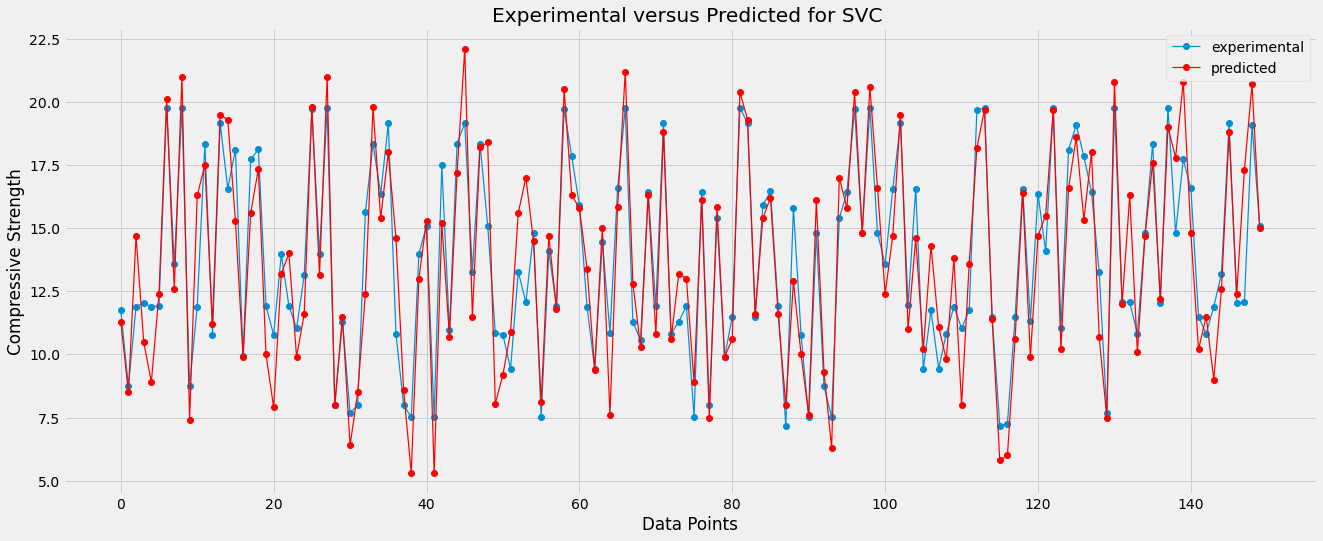

In [28]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(svr_model_pred)), svr_model_pred, marker='o', linewidth=1.2)
plt.plot(np.arange(len(y_test)), y_test, marker='o', linewidth=1.2, color='red')
plt.title('Experimental versus Predicted for SVC ')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength')
plt.legend(['experimental', 'predicted'])
plt.savefig('opc_gwp_svc_experimental_predicted.jpg');

In [29]:
# the residual between the actual value and the predicted value
svc_residual = svr_model_pred-y_test

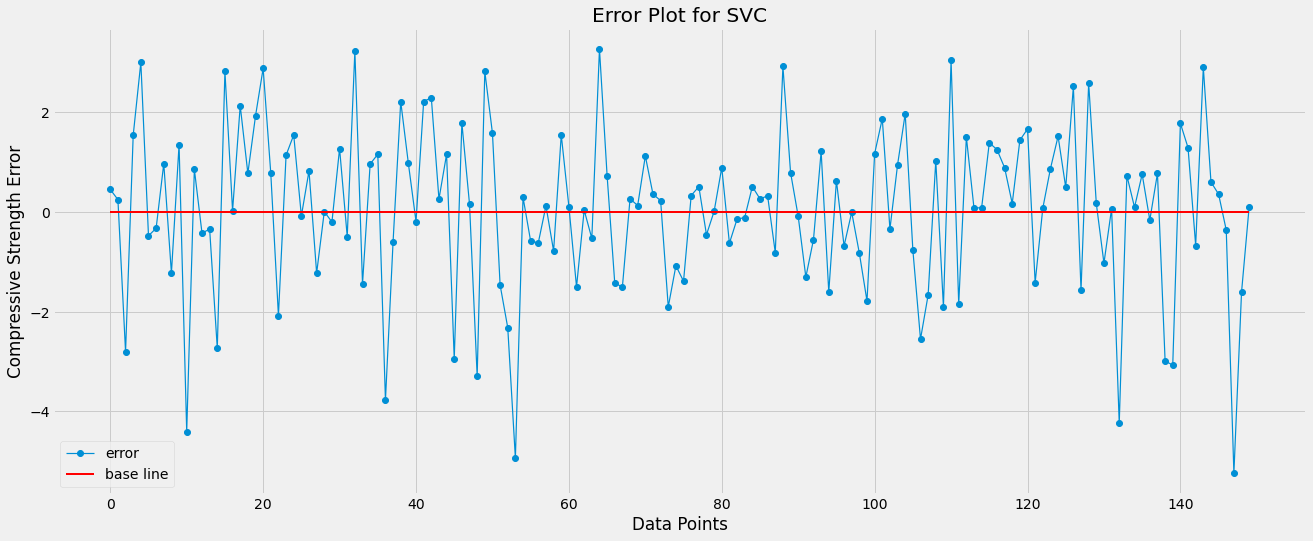

In [30]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(svc_residual)), svc_residual, marker='o', linewidth=1.2)
plt.plot(np.zeros(len(svc_residual)), color='red', linewidth=2)
plt.title('Error Plot for SVC')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength Error')
plt.legend(['error', 'base line'])
plt.savefig('opc_gwp_svc_error_analysis.jpg');

#### Encoding Technique

In [53]:
from sklearn.preprocessing import LabelEncoder

In [55]:
X = df_opc_gwp.drop('Compressive', axis=1)
y = df_opc_gwp['Compressive']

In [56]:
df_opc_gwp_encode = df_opc_gwp.copy()

In [57]:
for feature in X.columns:
    lbl_encoder = {}
    lbl_encoder[feature] = LabelEncoder()
    df_opc_gwp_encode[feature] = lbl_encoder[feature].fit_transform(df_opc_gwp_encode[feature])

In [58]:
df_opc_gwp_encode

OPC  GWP  Sand  CG  WC  Age  Compressive
0      6    0     0   0   0    0         17.2
1      6    0     0   0   0    0         18.1
2      6    0     0   0   0    0         19.8
3      5    0     0   0   1    0         13.2
4      4    0     0   0   1    0         12.6
..   ...  ...   ...  ..  ..  ...          ...
493    0    1     0   0   2    3         11.8
494    0    1     0   0   2    3         11.6
495    0    2     0   0   2    3         13.8
496    0    2     0   0   2    3         13.6
497    0    4     0   0   2    3         10.1

[498 rows x 7 columns]

In [59]:
X_encoded = df_opc_gwp_encode.drop('Compressive', axis=1)
y_encoded = df_opc_gwp_encode['Compressive']

In [60]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, 
                                                                                    test_size=0.3, random_state=42)

In [61]:
X_train_encoded.drop(constant_columns, axis=1, inplace=True)
X_test_encoded.drop(constant_columns, axis=1, inplace=True)

###### Decision Tree

In [63]:
import optuna
def objective(trial):
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10, step=1)
    max_depth = trial.suggest_int('max_depth',3, 10, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10, step=1)
    max_features = trial.suggest_categorical('max_features', ["auto", "sqrt", "log2"])
    encoded_dtree = DecisionTreeRegressor(random_state=42, min_samples_split=min_samples_split, max_depth=max_depth, 
                                          min_samples_leaf=min_samples_leaf, max_features=max_features)
    encoded_dtree.fit(X_train_encoded, y_train_encoded)
    encoded_dtree_pred = encoded_dtree.predict(X_test_encoded)
    error = mean_squared_error(y_test, encoded_dtree_pred)
    return error
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5000)

ImportError: Could not resolve module sqlalchemy.engine.url

In [ ]:
encoded_dtree = DecisionTreeRegressor(min_samples_split= 4, max_depth = 7, min_samples_leaf = 10, max_features = 'auto',
                             random_state=42)
encoded_dtree.fit(X_train_encoded, y_train_encoded)

In [ ]:
encoded_dtree_pred = encoded_dtree.predict(X_test_encoded)
accuracy = r2_score(y_test_encoded, encoded_dtree_pred)
MSE = mean_squared_error(y_test_encoded, encoded_dtree_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_encoded, encoded_dtree_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE)))
print('Test score {}%'.format(np.round(encoded_dtree.score(X_test_encoded, y_test_encoded)*100, 2)))
print('Train score {}%'.format(np.round(encoded_dtree.score(X_train_encoded, y_train_encoded)*100, 2)))

###### SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_encoded = scaler.fit_transform(X_train_encoded)
X_test_scaled_encoded = scaler.fit_transform(X_test_encoded)

In [64]:
import optuna
def objective(trial):
    epsilon = trial.suggest_float('epsilon', 0.1, 10, step=0.1)
    C = trial.suggest_int('C',1, 201, step=2)
    degree = trial.suggest_int('degree', 1, 20, step=1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['auto', 'scale'])
    encoded_svr_model = SVR(kernel=kernel, degree=degree, gamma=gamma, C=C, epsilon=epsilon)
    encoded_svr_model.fit(X_train_scaled_encoded, y_train_encoded)
    encoded_svr_pred = encoded_svr_model.predict(X_test_scaled_encoded)
    error = mean_squared_error(y_test_encoded, encoded_svr_pred)
    return error
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5000)

ImportError: Could not resolve module sqlalchemy.engine.url

In [ ]:
encoded_svr_model = SVR(epsilon=0.7000000000000001, C = 17, degree = 13, kernel='rbf', gamma = 'scale')
encoded_svr_model.fit(X_train_scaled_encoded, y_train_encoded)

In [ ]:
encoded_svr_model_pred = encoded_svr_model.predict(X_test_scaled_encoded)
accuracy = r2_score(y_test, encoded_svr_model_pred)
MSE = mean_squared_error(y_test_encoded, encoded_svr_model_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_encoded, encoded_svr_model_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE, 2)))
print('Test score: {}%'.format(np.round(encoded_svr_model.score(X_test_scaled_encoded, y_test_encoded)*100, 2)))
print('Train score: {}%'.format(np.round(encoded_svr_model.score(X_train_scaled_encoded, y_train_encoded)*100, 2)))

#### Frequency Technique

In [ ]:
df_opc_cwp_freq = df_opc_cwp.copy()

In [ ]:
for col in df_opc_cwp.columns[:-1]:
    dict_val = df_opc_cwp[col].value_counts().to_dict()
    for k, v in zip(dict_val.keys(), dict_val.values()):
        dict_val[k] = dict_val[k]/len(df_opc_cwp) 
    df_opc_cwp_freq[col] = df_opc_cwp_freq[col].map(dict_val)

In [ ]:
df_opc_cwp_freq

In [ ]:
X_freq = df_opc_cwp_freq.drop('Compressive', axis=1)
y_freq = df_opc_cwp_freq['Compressive']

In [ ]:
X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(X_freq, y_freq, test_size=0.3, random_state=42)

In [ ]:
X_train_freq.drop(constant_columns, axis=1, inplace=True)
X_test_freq.drop(constant_columns, axis=1, inplace=True)

In [ ]:
import optuna
def objective(trial):
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15, step=1)
    max_depth = trial.suggest_int('max_depth',3, 15, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5, step=1)
    max_features = trial.suggest_categorical('max_features', ["auto", "sqrt", "log2"])
    freq_dtree = DecisionTreeRegressor(random_state=42, min_samples_split=min_samples_split, max_depth=max_depth, 
                                          min_samples_leaf=min_samples_leaf, max_features=max_features)
    freq_dtree.fit(X_train_freq, y_train_freq)
    freq_dtree_pred = freq_dtree.predict(X_test_freq)
    error = mean_squared_error(y_test_freq, freq_dtree_pred)
    return error
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5000)

In [ ]:
freq_dtree = DecisionTreeRegressor(min_samples_split= 13, max_depth = 7, min_samples_leaf = 3, max_features = 'auto',
                             random_state=42)
freq_dtree.fit(X_train_freq, y_train_freq)

In [ ]:
freq_dtree_pred = freq_dtree.predict(X_test_freq)
accuracy = r2_score(y_test_freq, freq_dtree_pred)
MSE = mean_squared_error(y_test_freq, freq_dtree_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_freq, freq_dtree_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE)))
print('Test score {}%'.format(np.round(freq_dtree.score(X_test_freq, y_test_freq)*100, 2)))
print('Train score {}%'.format(np.round(freq_dtree.score(X_train_freq, y_train_freq)*100, 2)))

#### SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_freq = scaler.fit_transform(X_train_freq)
X_test_scaled_freq = scaler.fit_transform(X_test_freq)

In [ ]:
import optuna
def objective(trial):
    epsilon = trial.suggest_float('epsilon', 0.1, 10, step=0.1)
    C = trial.suggest_int('C',1, 201, step=2)
    degree = trial.suggest_int('degree', 1, 20, step=1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['auto', 'scale'])
    freq_svr_model = SVR(kernel=kernel, degree=degree, gamma=gamma, C=C, epsilon=epsilon)
    freq_svr_model.fit(X_train_scaled_freq, y_train_freq)
    freq_svr_pred = freq_svr_model.predict(X_test_scaled_freq)
    error = mean_squared_error(y_test_freq, freq_svr_pred)
    return error
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5000)

In [ ]:
freq_svr_model = SVR(epsilon=0.4, C = 75, degree = 14, kernel='rbf', gamma = 'scale')
freq_svr_model.fit(X_train_scaled_freq, y_train_freq)

In [ ]:
freq_svr_model_pred = freq_svr_model.predict(X_test_scaled_freq)
accuracy = r2_score(y_test_freq, freq_svr_model_pred)
MSE = mean_squared_error(y_test_freq, freq_svr_model_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_freq, freq_svr_model_pred)
print('R^2 score: {}%'.format(np.round(accuracy*100, 2)))
print('MSE: {}'.format(np.round(MSE, 2)))
print('RMSE: {}'.format(np.round(RMSE, 2)))
print('MAE: {}'.format(np.round(MAE, 2)))
print('Test score: {}%'.format(np.round(freq_svr_model.score(X_test_scaled_freq, y_test_freq)*100, 2)))
print('Train score: {}%'.format(np.round(freq_svr_model.score(X_train_scaled_freq, y_train_freq)*100, 2)))

#### GEP

In [ ]:
# These are constant for the three trials
# Numeric constants    
Constants per gene: 10
Data Type: Floating point
Lower Bound: -10
Upper Bound: 10
    
# Genetic Operators
Mutation rate--------0.00138
Fixed root mutation rate------0.00068
Function insertion rate-------0.00206
Inversion rate--------0.00546
IS transposition rate-------0.00546
RIS transposition rate--------0.00546
Gene composition rate---------0.00277
Gene transposition rate-------0.00277

# Dataset Partitioning
Training----- 70%
Validation------30%

In [ ]:
R-square score validation -----74.60 %
correlation------------ 86.37%
MSE: 4.57
RMSE: 2.14
MAE: 1.65
RSE: 0.27

R-square score training ------- 80.24%
correlation ------- 89.58%
MSE: 3.21
RMSE: 1.79
MAE: 1.27
RSE: 0.20
    
Generation----------31261
Linking function----Addition
Function sets--- +, -, *, /, Inv, 3Rt, Avg2, NOT

Number of chromosomes----30
Head Size: 8
Number of genes: 3
Evaluation metric for fitness function: RMSE
Used variables: 6

In [ ]:
R-square score validation -----78.44 %
correlation------------ 88.57%
MSE: 4.00
RMSE: 2.00
MAE: 1.59
RSE: 0.22

R-square score training ------- 82.90%
correlation ------- 91.05%
MSE: 2.85
RMSE: 1.69
MAE: 1.33
RSE: 0.17
    
Generation----------28097
Linking function----Addition
Function sets--- +, -, *, /, Exp, X2, 3Rt, Min2, Max2, Avg2, Atan, NOT

Number of chromosomes----50
Head Size: 10
Number of genes: 4
Evaluation metric for fitness function: RMSE
Used variables: 5

In [ ]:
R-square score validation -----82.59%
correlation------------ 90.88%
MSE: 3.37
RMSE: 1.83
MAE: 1.34
RSE: 0.18

R-square score training ------- 81.12%
correlation ------- 90.06%
MSE: 3.08
RMSE: 1.76
MAE: 1.33
RSE: 0.19
    
Generation----------30012
Linking function----Addition
Function sets--- +, -, *, /, Exp, Ln, X2, 3Rt, Min2, Avg2, Atan, Tanh, NOT

Number of chromosomes----100
Head Size: 10
Number of genes: 5
Evaluation metric for fitness function: RMSE
Used variables: 6

In [2]:
df_validation = pd.read_excel('gep_opc_gwp_validation.xlsx')
df_validation

Record ID  Target      Model  Residual
0          203    16.7  13.830990  2.869010
1           82    20.5  19.707355  0.792645
2          401    10.9  10.717569  0.182431
3          343    11.6  12.479627 -0.879627
4          428    18.0  17.736778  0.263222
..         ...     ...        ...       ...
144        480     9.7  11.914933 -2.214933
145        171    18.7  17.940639  0.759361
146        491    11.6  12.479627 -0.879627
147        141    12.4  12.267306  0.132694
148         70    13.2  11.514218  1.685782

[149 rows x 4 columns]

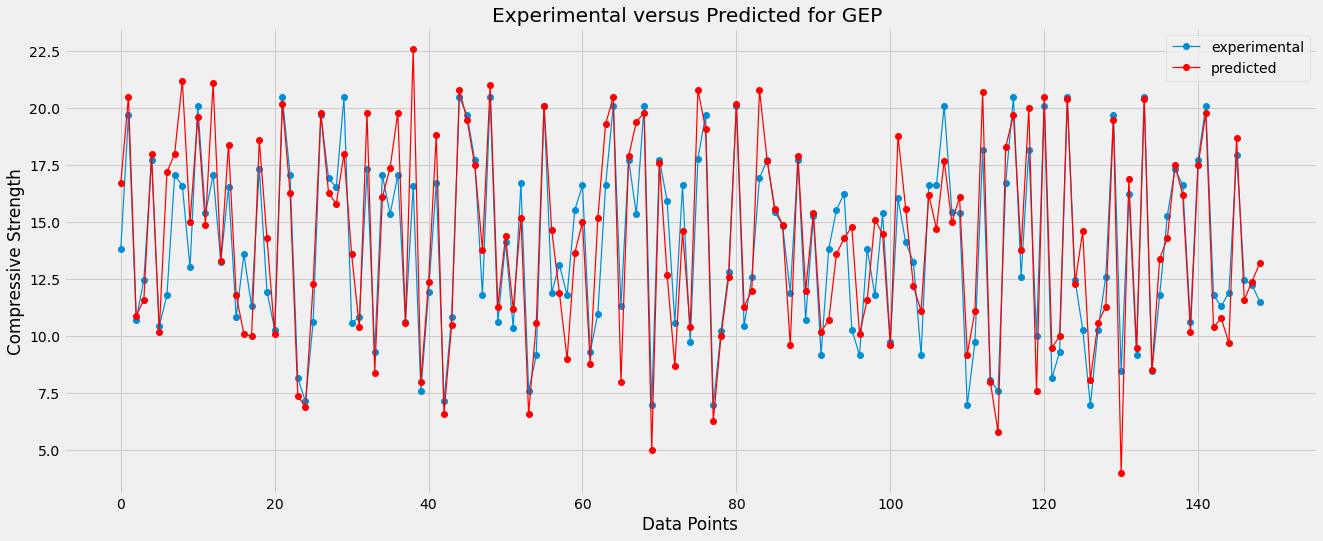

In [5]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(df_validation)), df_validation['Model'], marker='o', linewidth=1.2)
plt.plot(np.arange(len(df_validation)), df_validation['Target'], marker='o', linewidth=1.2, color='red')
plt.title('Experimental versus Predicted for GEP ')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength')
plt.legend(['experimental', 'predicted'])
plt.savefig('opc_gwp_experimental_predicted.jpg');

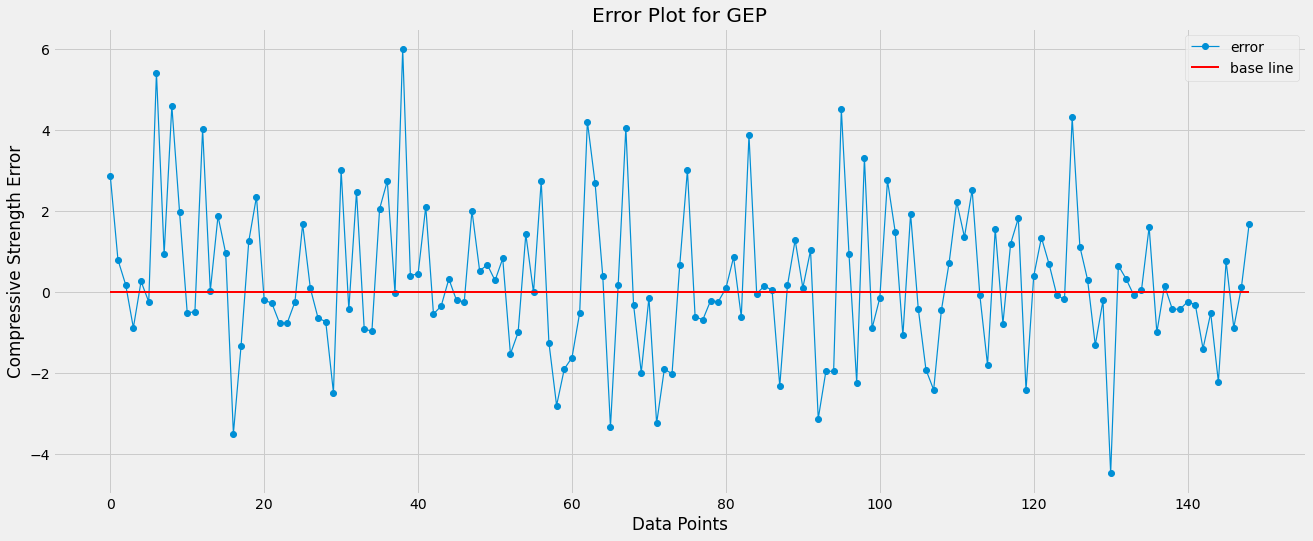

In [6]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(len(df_validation)), df_validation['Residual'], marker='o', linewidth=1.2)
plt.plot(np.zeros(len(df_validation)), color='red', linewidth=2)
plt.title('Error Plot for GEP')
plt.xlabel('Data Points')
plt.ylabel('Compressive Strength Error')
plt.legend(['error', 'base line'])
plt.savefig('opc_gwp_error_analysis.jpg');

In [ ]:
R-square score validation -----78.40%
correlation------------ 88.54%
MSE: 3.52
RMSE: 1.88
MAE: 1.45
RSE: 0.22

R-square score training ------- 83.62%
correlation ------- 91.44%
MSE: 2.89
RMSE: 1.70
MAE: 1.30
RSE: 0.16
    
Generation----------21372
Linking function----Addition
Function sets--- +, -, *, /, Exp, Ln, Inv, X2, 3Rt, Min2, Max2, Avg2, Atan, Tanh, NOT

Number of chromosomes----200
Head Size: 12
Number of genes: 5
Evaluation metric for fitness function: RMSE
Used variables: 6

In [7]:
genes = [3, 4, 5, 5]
Head = [8, 10, 10, 12]

MSE_validation = [4.57, 4.0, 3.37, 3.52]
RMSE_validation = [2.14, 2.0, 1.83, 1.88]
MAE_validation = [1.65, 1.59, 1.34, 1.45]
r_square_validation = [0.75, 0.78, 0.83, 0.78]

MSE_training = [3.21, 2.85, 3.08, 2.89]
RMSE_training = [1.79, 1.69, 1.76, 1.70]
MAE_training = [1.27, 1.33, 1.33, 1.30]
r_square_training = [0.80, 0.83, 0.81, 0.84]

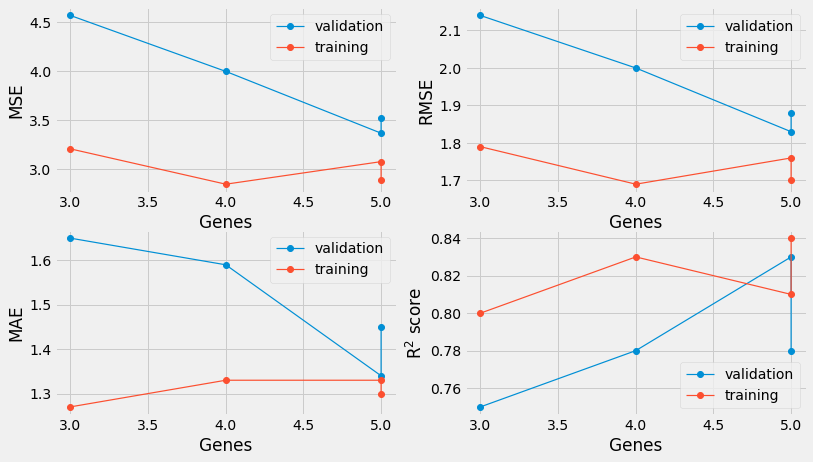

In [11]:
plt.figure(figsize=(12, 7))
plt.subplot(2, 2, 1)
plt.plot(genes, MSE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 1)
plt.plot(genes, MSE_training, marker='o', linewidth=1.2)
plt.ylabel('MSE')
plt.xlabel('Genes')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 2)
plt.plot(genes, RMSE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 2)
plt.plot(genes, RMSE_training, marker='o', linewidth=1.2)
plt.ylabel('RMSE')
plt.xlabel('Genes')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 3)
plt.plot(genes, MAE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 3)
plt.plot(genes, MAE_training, marker='o', linewidth=1.2)
plt.ylabel('MAE')
plt.xlabel('Genes')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 4)
plt.plot(genes, r_square_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 4)
plt.plot(genes, r_square_training, marker='o', linewidth=1.2)
plt.ylabel('R$^2$ score')
plt.xlabel('Genes')
plt.legend(['validation', 'training'])

plt.savefig('opc_gwp_gene_parameters_variation.jpg')

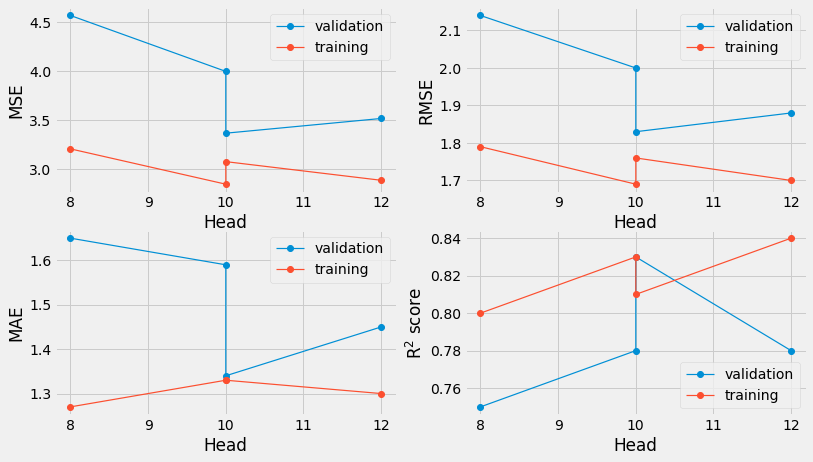

In [12]:
plt.figure(figsize=(12, 7))
plt.subplot(2, 2, 1)
plt.plot(Head, MSE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 1)
plt.plot(Head, MSE_training, marker='o', linewidth=1.2)
plt.ylabel('MSE')
plt.xlabel('Head')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 2)
plt.plot(Head, RMSE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 2)
plt.plot(Head, RMSE_training, marker='o', linewidth=1.2)
plt.ylabel('RMSE')
plt.xlabel('Head')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 3)
plt.plot(Head, MAE_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 3)
plt.plot(Head, MAE_training, marker='o', linewidth=1.2)
plt.ylabel('MAE')
plt.xlabel('Head')
plt.legend(['validation', 'training'])

plt.subplot(2, 2, 4)
plt.plot(Head, r_square_validation, marker='o', linewidth=1.2)
plt.subplot(2, 2, 4)
plt.plot(Head, r_square_training, marker='o', linewidth=1.2)
plt.ylabel('R$^2$ score')
plt.xlabel('Head')
plt.legend(['validation', 'training'])

plt.savefig('opc_gwp_head_parameters_variation.jpg')

#### Sensitivity Analysis

###### GEP

In [8]:
from math import *

def gepModel(d):

    G1C0 = -10.4081058151262
    G2C8 = 0.439603869747002
    G3C4 = 0.220698069794831
    G3C6 = 0.147947140016402
    G4C2 = -10.6973381170224

    y = 0.0

    y = (1.0-atan((((1.0-((d[3]+G1C0)/2.0))*d[0])/pow(((d[3]-d[5])+d[1]),2.0))))
    y = y + min((atan(((((G2C8+d[5])/2.0)+(d[0]-d[2]))/2.0))/d[4]),(1.0/(log(d[5]))))
    y = y + ((G3C4*exp(((atan(G3C6)+(d[1]*G3C4))/2.0)))-atan(gep3Rt((d[1]*d[1]))))
    y = y + ((min(atan(G4C2),(d[5]/d[0]))+tanh(((G4C2+d[5])/2.0)))+gep3Rt(gep3Rt(((G4C2+d[2])/2.0))))
    y = y + (((log(d[3])*(1.0/(d[4])))/d[4])-(1.0/(((((d[3]+d[0])/2.0)+(1.0-d[3]))/2.0))))

    return y
    

def gep3Rt(x):
    if (x < 0.0):
        return -pow(-x,(1.0/3.0))
    else:
        return pow(x,(1.0/3.0))

In [9]:
def sensitivity_analysis_gep(features):
    opc = [100, 90, 80, 85, 95, 70, 75, 90, 100, 70]
    gwp = [0, 5, 10, 10, 20, 15, 30, 25, 5, 15]
    CG = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
    sand = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
    wc = [0.5, 0.6, 0.5, 0.7, 0.6, 0.5, 0.7, 0.7, 0.6, 0.6]
    age = [7, 28, 28, 56, 90, 7, 90, 56, 7, 56]
    
    features_type = [opc, gwp, sand, CG, wc, age]
    features_random_values = [x for x in features_type]
    
    col_to_values_index = dict(zip(range(len(features_random_values)), features_random_values))
    sa_gep_data = np.mean(features, axis=0)
    
    preds_max_min = []
    for key, value in col_to_values_index.items():
        sa_gep_data_copy = sa_gep_data.copy()
        col_predictions = []
        for val in value:
            sa_gep_data_copy[key] = val
            pred = gepModel(sa_gep_data_copy)
            col_predictions.append(pred)
        preds_max_min.append((max(col_predictions), min(col_predictions)))
        
    ## Calculate preds differences
    diff_fn = lambda x: [x[i][0] - x[i][1] for i in range(len(x))]
    min_max_diff = diff_fn(preds_max_min)

    I_sum = sum(min_max_diff)
    col_sa_fn = lambda x, i_sum: [(diff/i_sum)*100 for diff in x]
    col_sa = col_sa_fn(min_max_diff, I_sum)
    
    #merge col_sa back with feature_names
    sa_gep_df =pd.DataFrame(data=np.array(col_sa).reshape(1, features.shape[1]), columns=features.columns.values)
    return sa_gep_df

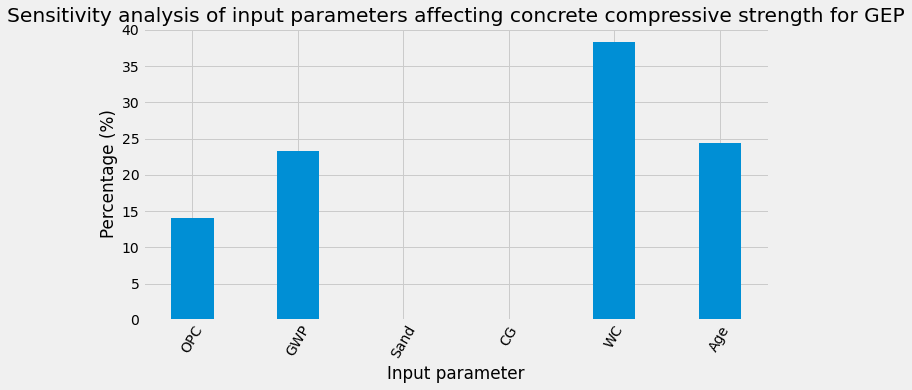

In [12]:
sa_df_gep = sensitivity_analysis_gep(df_opc_gwp.iloc[:, :-1])
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(np.array(sa_df_gep.columns), sa_df_gep.values.flatten(), width = 0.4)
plt.xlabel("Input parameter")
plt.ylabel("Percentage (%)")
plt.title("Sensitivity analysis of input parameters affecting concrete compressive strength for GEP")
plt.xticks(rotation=60)
plt.savefig('gep_sensitivity_analysis_opc_gwp.jpg');

#### DTREE

In [51]:
def sensitivity_analysis(features, model=None, scaler=False):
    opc = [100, 90, 80, 85, 95, 70, 75, 90, 100, 70]
    gwp = [0, 5, 10, 10, 20, 15, 30, 25, 5, 15]
    wc = [0.5, 0.6, 0.5, 0.7, 0.6, 0.5, 0.7, 0.7, 0.6, 0.6]
    age = [7, 28, 28, 56, 90, 7, 90, 56, 7, 56]
    
    features_type = [opc, gwp, wc, age]
    features_random_values = [x for x in features_type]
    
    col_to_values_index = dict(zip(range(len(features_random_values)), features_random_values))
    sa_data = np.median(features, axis=0)
    
    preds_max_min = []
    for key, value in col_to_values_index.items():
        sa_data_copy = sa_data.copy()
        col_predictions = []
        for val in value:
            sa_data_copy[key] = val
            if scaler == False:
                data = sa_data_copy
                pred = model.predict([data])
            else:
                data = scaler.transform(sa_data_copy.reshape(-1, features.shape[1]))
                pred = model.predict(data)
            col_predictions.append(pred)
        preds_max_min.append((max(col_predictions), min(col_predictions)))
        
    ## Calculate preds differences
    diff_fn = lambda x: [x[i][0] - x[i][1] for i in range(len(x))]
    min_max_diff = diff_fn(preds_max_min)

    I_sum = sum(min_max_diff)
    col_sa_fn = lambda x, i_sum: [(diff/i_sum)*100 for diff in x]
    col_sa = col_sa_fn(min_max_diff, I_sum)
    
    #merge col_sa back with feature_names
    sa_df =pd.DataFrame(data=np.array(col_sa).reshape(1, features.shape[1]), columns=features.columns.values)
    return sa_df

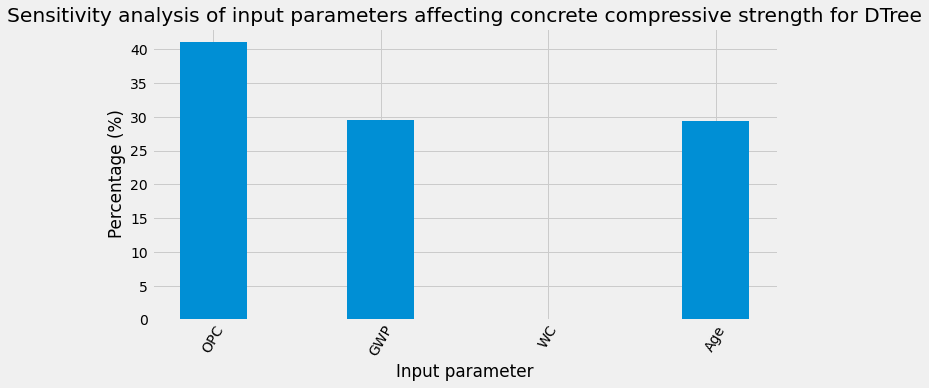

In [52]:
sa_df_dtree = sensitivity_analysis(X_train, model=dtree, scaler=False)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(np.array(sa_df_dtree.columns), sa_df_dtree.values.flatten(), width = 0.4)
plt.xlabel("Input parameter")
plt.ylabel("Percentage (%)")
plt.title("Sensitivity analysis of input parameters affecting concrete compressive strength for DTree")
plt.xticks(rotation=60)
plt.savefig('dtree_sensitivity_analysis_opc_gwp.jpg');

#### SVC

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

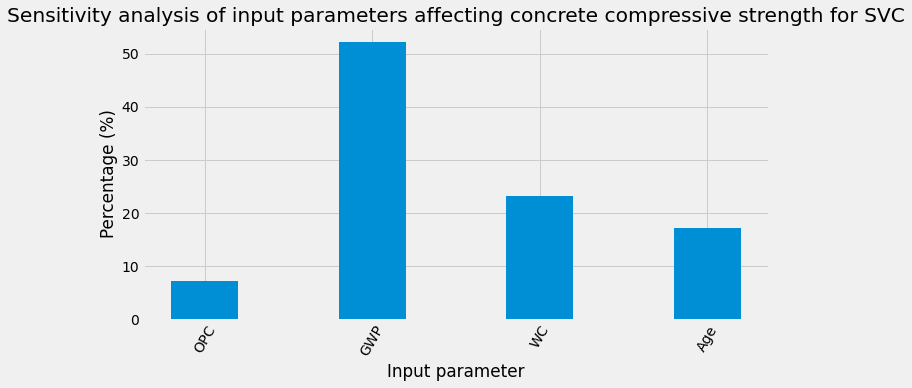

In [54]:
sa_df_svc = sensitivity_analysis(X_train, model=svr_model, scaler=scaler)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(np.array(sa_df_svc.columns), sa_df_svc.values.flatten(), width = 0.4)
plt.xlabel("Input parameter")
plt.ylabel("Percentage (%)")
plt.title("Sensitivity analysis of input parameters affecting concrete compressive strength for SVC")
plt.xticks(rotation=60)
plt.savefig('svc_sensitivity_analysis_opc_gwp.jpg');

###### Result Summary

In [ ]:
## Original Data
1. Decision Tree ---83.93%
2. SVR -------------84.6%
3. GEP--------------82.59%

## Encoded Data
1. Decision Tree ---83.93%
2. SVR -------------84.74%

## Frequency Data
1. Decision Tree ---83.91%
2. SVR -------------881.48%

The original form of the data is similar to the encoded data and better than the frequency data